# Соберём все результаты

In [1]:
import numpy as np
import os
from IPython.display import Image
from scipy import stats
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import functions

importing Jupyter notebook from functions.ipynb
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
Distance = 9.3 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [4]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
r_HI_old = np.load('./data/r_HI_old.npy')
vel_HI_old = np.load('./data/vel_HI_old.npy')
velocity_HI = np.load('./data/velocity_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc_corr.npy')
sig_R_min_err = np.load('./data/sig_R_min_err.npy')
sig_R_max_err = np.load('./data/sig_R_max_err.npy')
sigma_s_err = np.load('./data/sigma_s_err.npy')
H_alpha = np.load('./data/H_alpha.npy')
Z = np.load('./data/Z.npy')

## Посмотрим, как изменились кривая вращения, эпициклическая частота, параметр Тумре и shear

In [5]:
def epic_freq_old(vel_poly, R, dR):
    return sqrt(2.) * vel_poly(R) / R * sqrt(1 + R * vel_poly.deriv()(R) / vel_poly(R) / dR)

def epic_freq(vel_poly, R, dR):
    return sqrt(2.) * vel_poly(R) / R * sqrt(1 + R * vel_poly.deriv()(R) / vel_poly(R))

In [6]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
velocity_approx_old = poly1d(polyfit(r_HI_old, vel_HI_old, deg=4))
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

points_old = np.linspace(min(r_HI_old), max(r_HI_old), 1000)
points = np.linspace(min(r_HI), max(r_HI), 100)

kappa_old = [epic_freq_old(velocity_approx_old, r, dR) for r in points_old]
kappa = [epic_freq(velocity_approx, r, dR) for r in points]

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [7]:
G = 4.32
Qeff_max_old = np.zeros(dist_kpc.shape)
Qeff_min_old = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg_old = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = epic_freq_old(velocity_approx_old, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg_old[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg_old[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_old[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg_old[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_old[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
print('Errors:{}'.format(errors))

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [8]:
G = 4.32
Qeff_max = np.zeros(dist_kpc.shape)
Qeff_min = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
print('Errors:{}'.format(errors))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [9]:
G = 4.32
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx_old(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx_old.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 3.3 * A * sigma_g / np.pi / G
    
shear_method_old = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method_old[i][j] = Sigma_crit[i][j] / Sigma_gas     

In [10]:
G = 4.32
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 3.3 * A * sigma_g / np.pi / G
    
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas     

Text(0.5, 1.0, 'shear method (new)$\\alpha=3.3$')

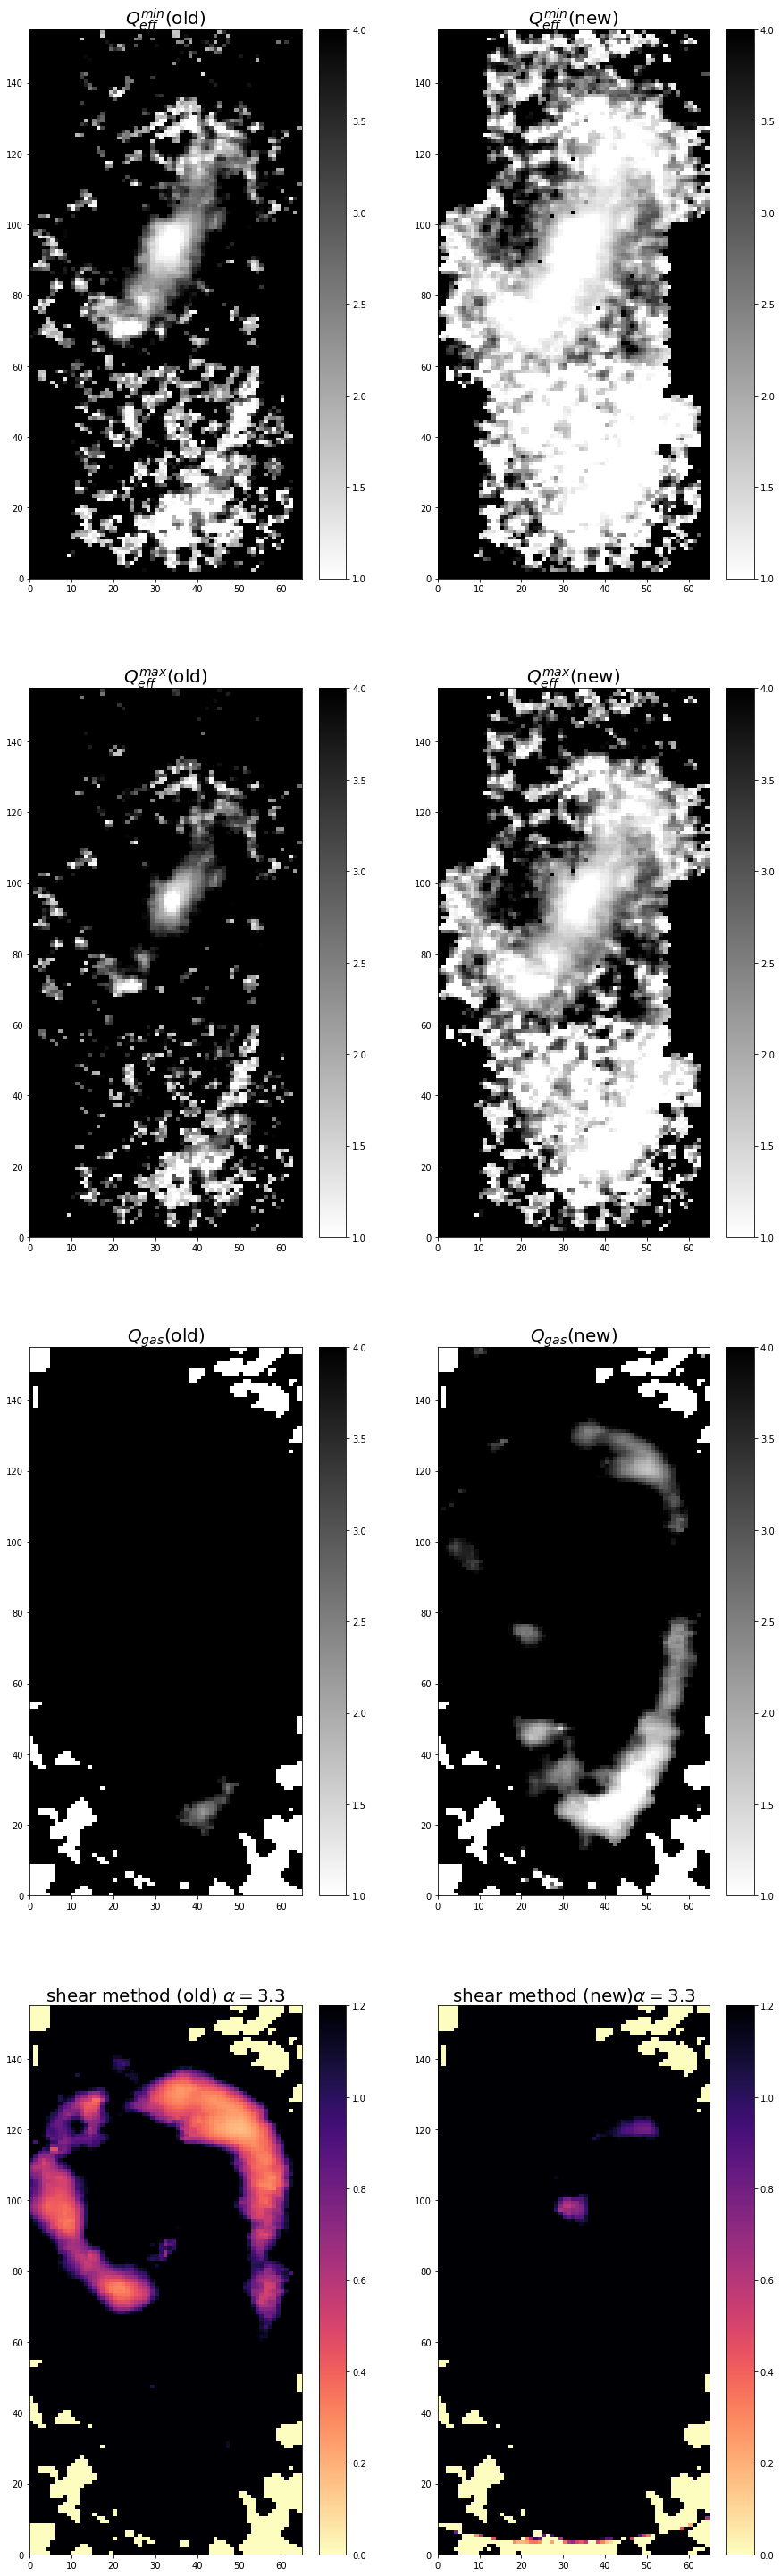

In [22]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[15, 52])

plt.subplot(4,2,1)
quadmesh = plt.pcolormesh(X, Y, Qeff_min_old, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$(old)', fontsize=20)

plt.subplot(4,2,2)
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$(new)', fontsize=20)

plt.subplot(4,2,3)
quadmesh = plt.pcolormesh(X, Y, Qeff_max_old, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$(old)', fontsize=20)

plt.subplot(4,2,4)
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$(new)', fontsize=20)

plt.subplot(4,2,5)
quadmesh = plt.pcolormesh(X, Y, Qg_old, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{gas}$(old)', fontsize=20)
          
plt.subplot(4,2,6)
quadmesh = plt.pcolormesh(X, Y, Qg, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{gas}$(new)', fontsize=20)   

plt.subplot(4,2,7)
quadmesh = plt.pcolormesh(X, Y, shear_method_old, cmap='magma_r')
quadmesh.set_clim(vmin = 0., vmax = 1.2)
plt.colorbar()
plt.title(r'shear method (old) $\alpha=3.3$', fontsize=20) 

plt.subplot(4,2,8)
quadmesh = plt.pcolormesh(X, Y, shear_method, cmap='magma_r')
quadmesh.set_clim(vmin = 0., vmax = 1.2)
plt.colorbar()
plt.title(r'shear method (new)$\alpha=3.3$', fontsize=20) 

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


(0, 1200.0)

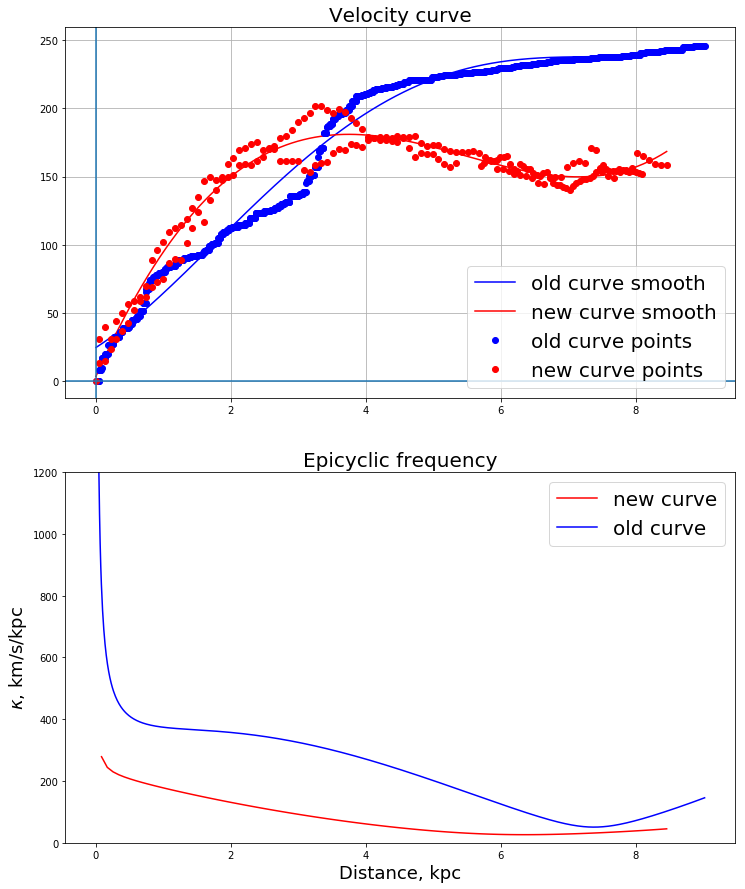

In [17]:
kappa_old = [epic_freq_old(velocity_approx_old, r, dR) for r in points_old]
kappa = [epic_freq(velocity_approx, r, dR) for r in points]

plt.figure(figsize=[12, 15])
plt.subplot(2,1,1)
line1 = plt.plot(points_old, velocity_approx_old(points_old),'blue', label='old curve smooth')
line2 = plt.plot(points, velocity_approx(points),'red', label='new curve smooth')
line3 = plt.plot(r_HI_old,vel_HI_old,'o',color='blue',label = 'old curve points')
line4 = plt.plot(r_HI,vel_HI,'o',color='red',label = 'new curve points')
plt.legend(loc='lower right',fontsize=20)
plt.grid()
plt.axhline(y =0.)
plt.axvline(x =0)
plt.title('Velocity curve', fontsize=20)

plt.subplot(2,1,2)
line1 = plt.plot(points, kappa,'red',label='new curve') 
line2 = plt.plot(points_old, kappa_old,'blue', label='old curve') 
plt.title('Epicyclic frequency',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.legend(loc='upper right',fontsize=20)
plt.ylim(0, 1200.)

# 1. Параметр Тумре

In [5]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [6]:
dR = 1
G = 4.32
Qeff_max = np.zeros(dist_kpc.shape)
Qeff_min = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
print('Errors:{}'.format(errors))

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [7]:
np.save('./data/Qg.npy', Qg)
np.save('./data/Qeff_min.npy', Qeff_min)
np.save('./data/Qeff_max.npy', Qeff_max)

Text(0.5, 1.0, '$Q_{gas}$')

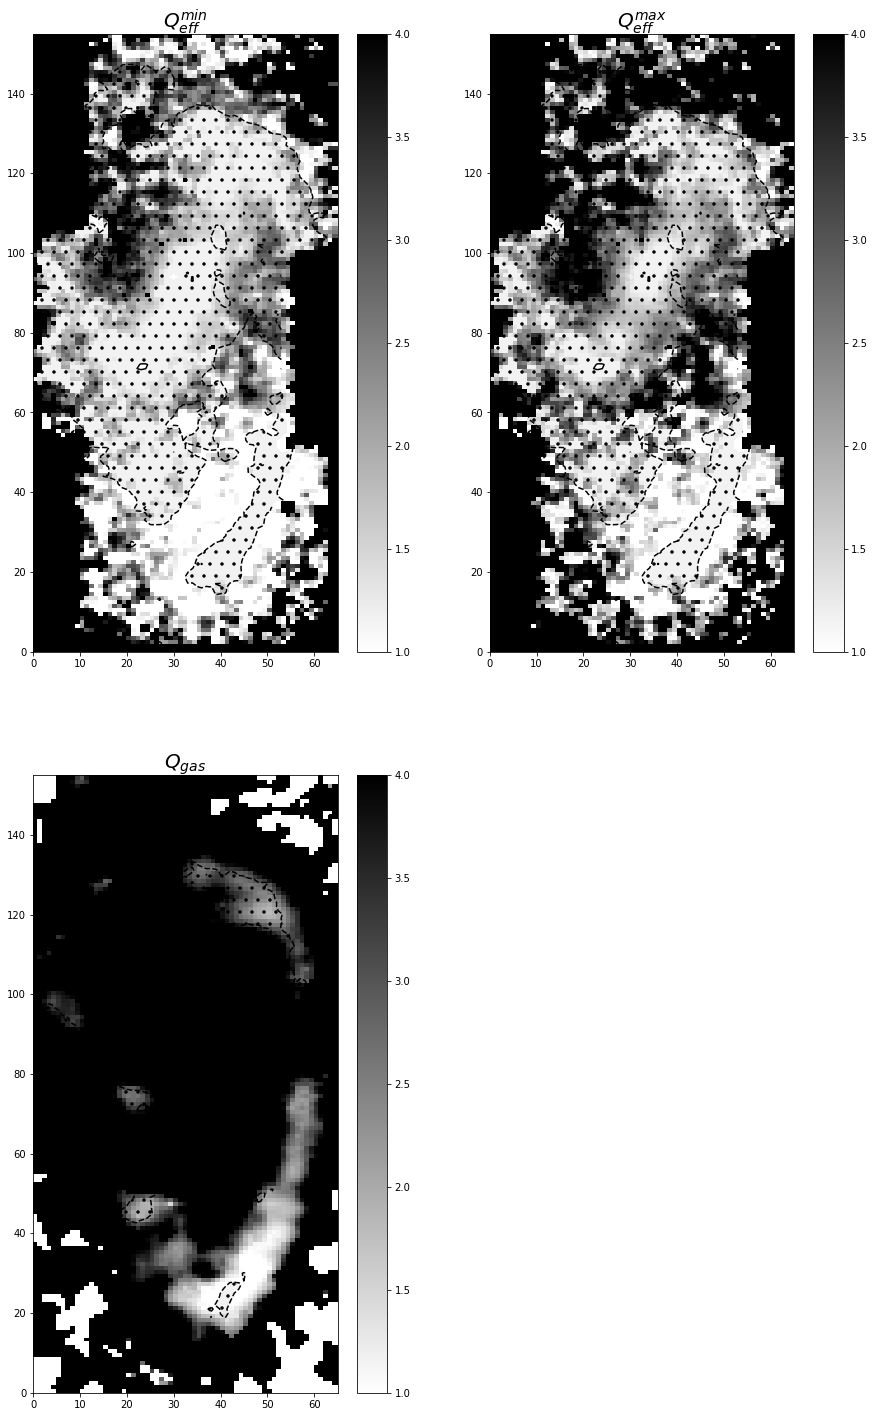

In [14]:
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[15, 25])
plt.subplot(2,2,1)
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], aspect='auto', alpha=1, colors='black')
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,2,2)
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], aspect='auto', alpha=1, colors='black')
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,2,3)
quadmesh = plt.pcolormesh(X, Y, Qg, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-0.5,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-0.5,0.5], aspect='auto', alpha=1, colors='black')
plt.title(r'$Q_{gas}$', fontsize=20)

In [15]:
Inst_field1 = np.zeros(dist_kpc.shape)
inst_count_min = 0
inst_count_max = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(Qeff_min[i][j] <= 3.):
            Inst_field1[i][j] = 2
            inst_count_min+=1
        elif(Qeff_min[i][j] == 100.):
            Inst_field1[i][j] = 0
        elif(3< Qeff_min[i][j] < 100.):
            Inst_field1[i][j] = 1
            
Inst_field3 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(Qeff_max[i][j] <= 3.):
            Inst_field3[i][j] = 2
            inst_count_max+=1
        elif(Qeff_max[i][j] == 100.):
            Inst_field3[i][j] = 0
        elif(3< Qeff_max[i][j] < 100.):
            Inst_field3[i][j] = 1           
            
print(inst_count_min)
print(inst_count_max)

6402
5206


Text(0.5, 1.0, '$Q_{eff}^{max}$')

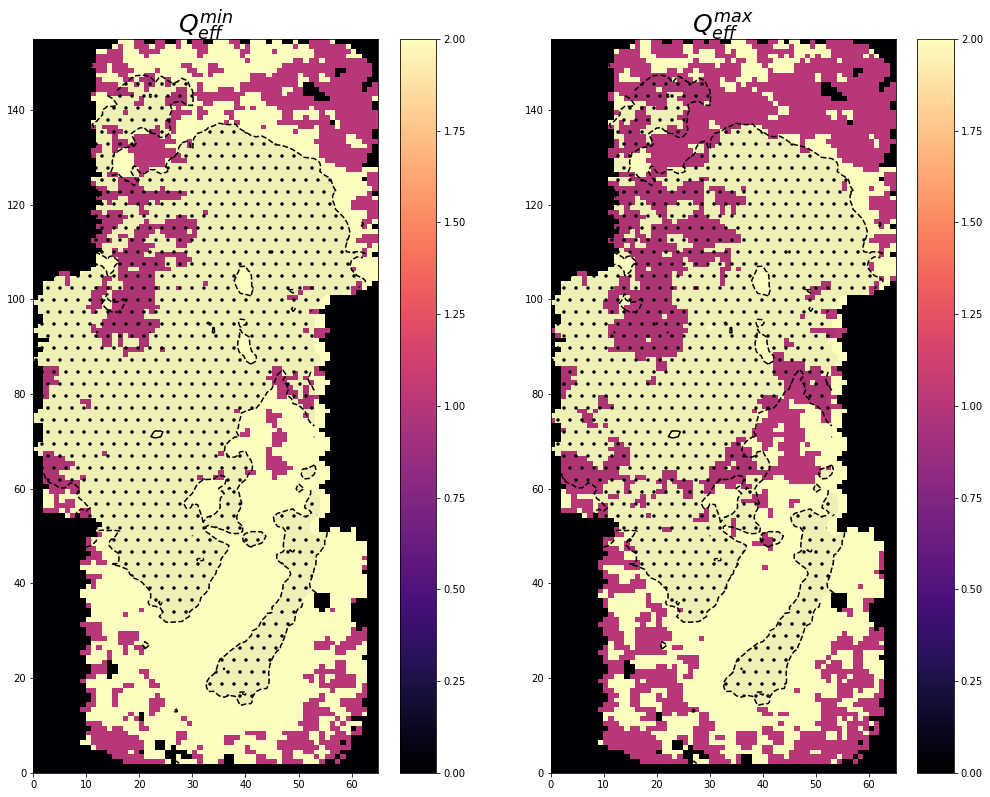

In [16]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, Inst_field1, cmap='magma')
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], aspect='auto', alpha=1, colors='black')

plt.title(r'$Q_{eff}^{min}$', fontsize=25)

plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(X, Y, Inst_field3, cmap='magma')
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], aspect='auto', alpha=1, colors='black')

plt.title(r'$Q_{eff}^{max}$', fontsize=25)


Text(0.5, 1.0, '$Q_{eff}^{max}$(cut)')

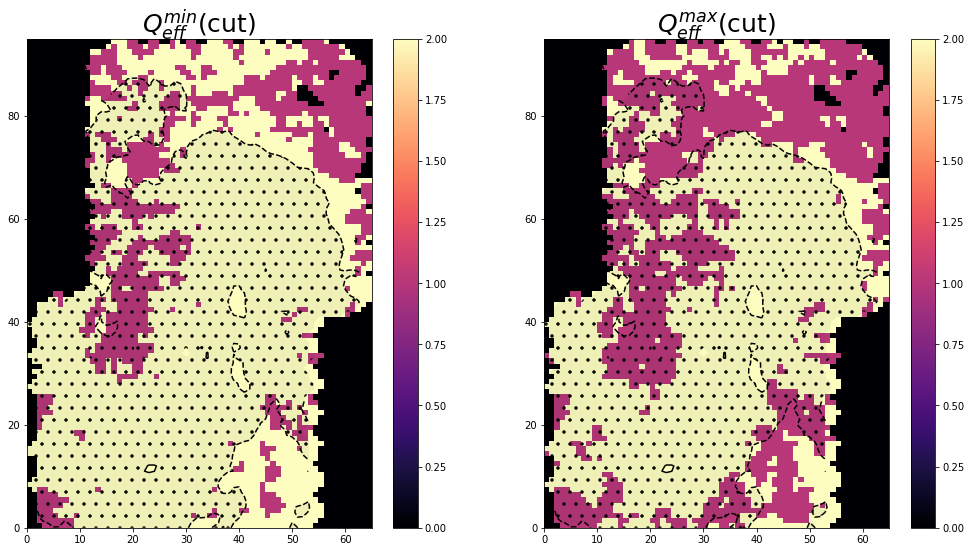

In [11]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,96,1))
plt.figure(figsize=[17, 9])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, Inst_field1[60:,:], cmap='magma')
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR[60:,:]), levels=[-1.55,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR[60:,:]), levels=[-1.55,0.5], aspect='auto', alpha=1, colors='black')

plt.title(r'$Q_{eff}^{min}$(cut)', fontsize=25)

plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(X, Y, Inst_field3[60:,:], cmap='magma')
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR[60:,:]), levels=[-1.55,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR[60:,:]), levels=[-1.55,0.5], aspect='auto', alpha=1, colors='black')

plt.title(r'$Q_{eff}^{max}$(cut)', fontsize=25)

Ошибки дисперсии скоростей звезд. Относительная ошибка.

In [12]:
relative_error_min = np.zeros(sigma_s_err.shape)
relative_error_max = np.zeros(sigma_s_err.shape)

relative_error_max = sig_R_max_err / sig_R_max
relative_error_min = sig_R_min_err / sig_R_min

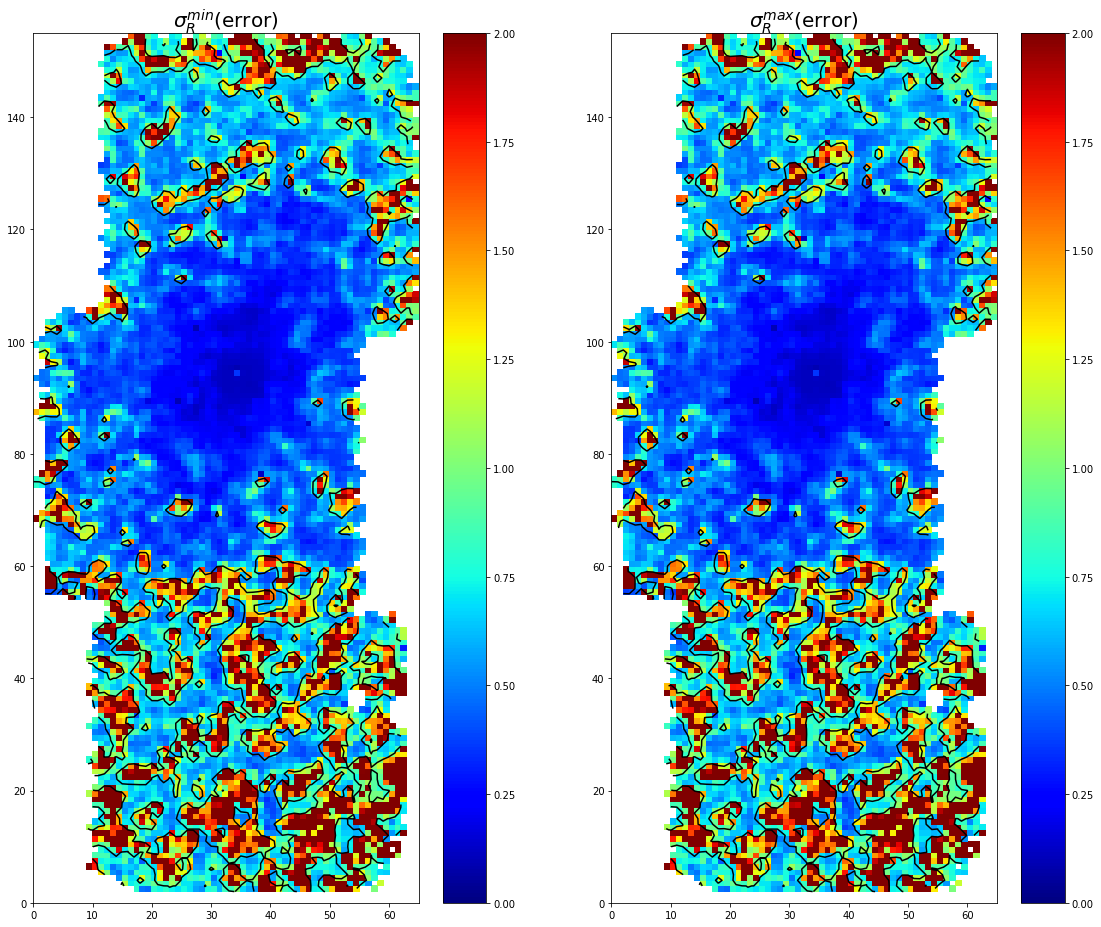

In [17]:
plt.figure(figsize=[19, 16])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, relative_error_min, levels=[1,], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, relative_error_min, cmap=cm.jet)
quadmesh.set_clim(vmin=0.0, vmax=2.)
plt.colorbar()
plt.title(r'$\sigma_R^{min}$(error)', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, relative_error_max, levels=[1,], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, relative_error_max, cmap=cm.jet)
quadmesh.set_clim(vmin=0.0, vmax=2.)
plt.colorbar()
plt.title(r'$\sigma_R^{max}$(error)',fontsize=20)
plt.show()

Text(0.5, 1.0, '$Q_{eff}^{max}$')

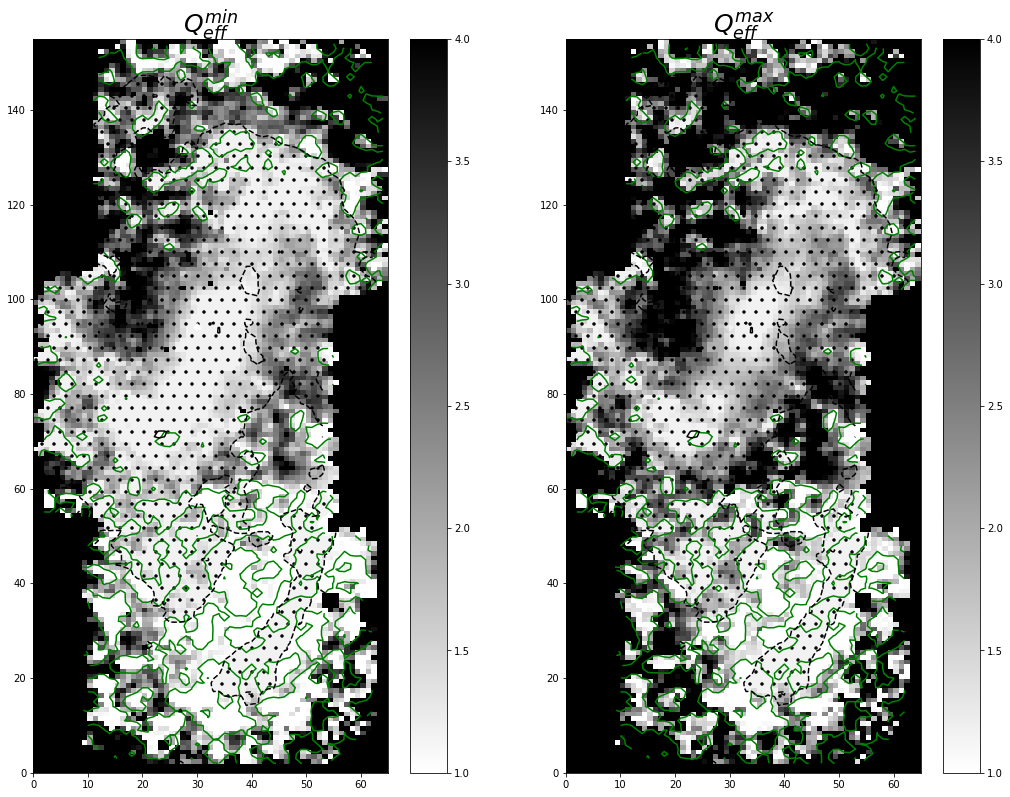

In [18]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17.5, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, relative_error_min, levels=[1,], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], aspect='auto', alpha=1, colors='black')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.title(r'$Q_{eff}^{min}$', fontsize=25)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, relative_error_max, levels=[1,], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], aspect='auto', alpha=1, colors='black')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.title(r'$Q_{eff}^{max}$', fontsize=25)

## Азимутальное усреднение. Сравнение с Leroy.

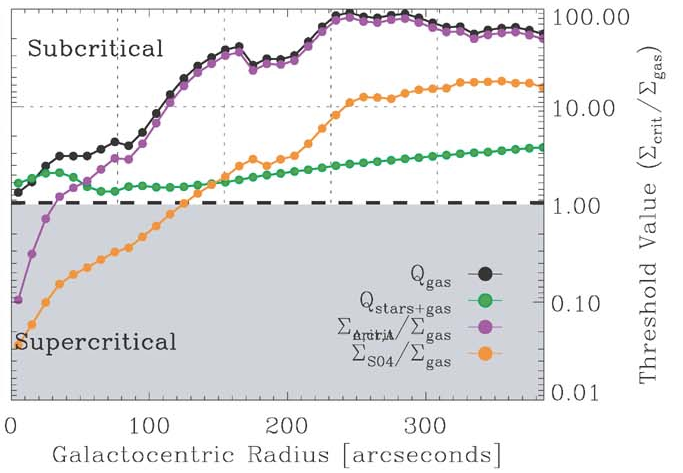

In [59]:
Image('./images/instability.png')

In [17]:
def azimuthal_average(Q, step=None, vmax=None, maxval=None, vmin=0.5):
    az_av = []
    az_dev = []
    anulli = []
    for dbin in np.arange(vmin,vmax,step):
        mask = (dist_kpc >= dbin) & (dist_kpc <= dbin + step)
        anulli = Q[mask]
        mask = (anulli < maxval) & (anulli > 0.) 
        anulli = anulli[mask]
        az_av.append(anulli.sum()/mask.sum())
        az_dev.append(np.std(anulli))
    return az_av, az_dev

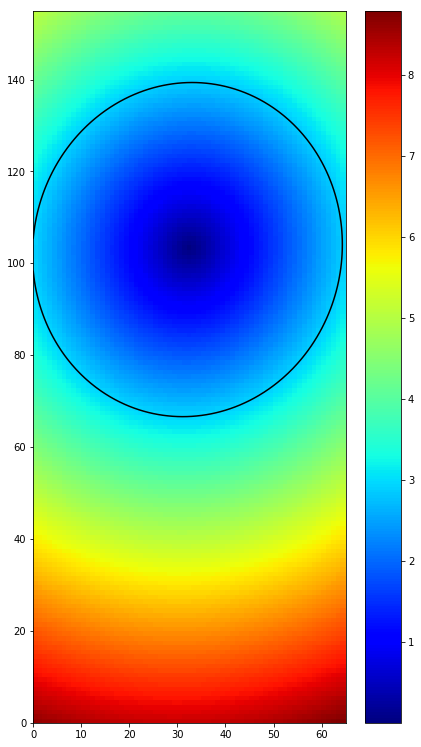

In [18]:
plt.figure(figsize=[7.,13.1])
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
CS = plt.contour(X, Y, dist_kpc, levels=[0.,2.9], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, dist_kpc, cmap='jet')
plt.colorbar()
#2.55 -масимальный радиус усреднения на кругу

In [22]:
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_H2_az = azimuthal_average(Sigma_H2, step=0.2, vmax=10., maxval = 140.)[0]
sigma_HI_az = azimuthal_average(sigma_HI/1000., step=0.2, vmax=10., maxval = 100.)[0]
Sigma_HI_az = azimuthal_average(Sigma_HI, step=0.2, vmax=10., maxval = 7.)[0]
Sigma_s_az = azimuthal_average(Sigma_s, step=0.2, vmax=10., maxval = 4000.)[0]
sig_R_max_az = azimuthal_average(sig_R_max, step=0.2, vmax=10., maxval = 300.)[0]
sig_R_min_az = azimuthal_average(sig_R_min, step=0.2, vmax=10., maxval = 300.)[0]
dist_az = np.array(np.arange(0.5,9.,0.2))

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [23]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32

Qeff_max_az = np.zeros(dist_az.shape)
Qeff_min_az = np.zeros(dist_az.shape)
Qg_az = np.zeros(dist_az.shape)
Qs_max_az = np.zeros(dist_az.shape)
Qs_min_az = np.zeros(dist_az.shape)
error = 0
step = 0
for i, ddd in enumerate(np.arange(0.5, 9., 0.2)):
    step+=1
    c = sigma_HI_az[i]
    Sigma_g = 1.36*(Sigma_HI_az[i]+ Sigma_H2_az[i])
    kappa = functions.epic_freq(velocity_approx, ddd, dR)
    Sigma_s = Sigma_s_az[i]
    s_R_max = sig_R_max_az[i]
    s_R_min = sig_R_min_az[i]
    Qg_az[i] = kappa * c / (math.pi * G * Sigma_g)
    Qs_max_az[i] = kappa * s_R_max / (3.36 * G * Sigma_s)
    Qs_min_az[i] = kappa * s_R_min / (3.36 * G * Sigma_s)
        
    try:   
        root, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min_az[i], Qg=Qg_az[i], s=c/s_R_min)
    except:
        error+=1
        qeff = 0.01
    Qeff_min_az[i] = 1./qeff
    
    try: 
        root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max_az[i], Qg=Qg_az[i], s=c/s_R_min)
    except:
        error+=1
        qeff = 0.01
    Qeff_max_az[i] = 1./qeff
print(error)  

6


(0, 20.0)

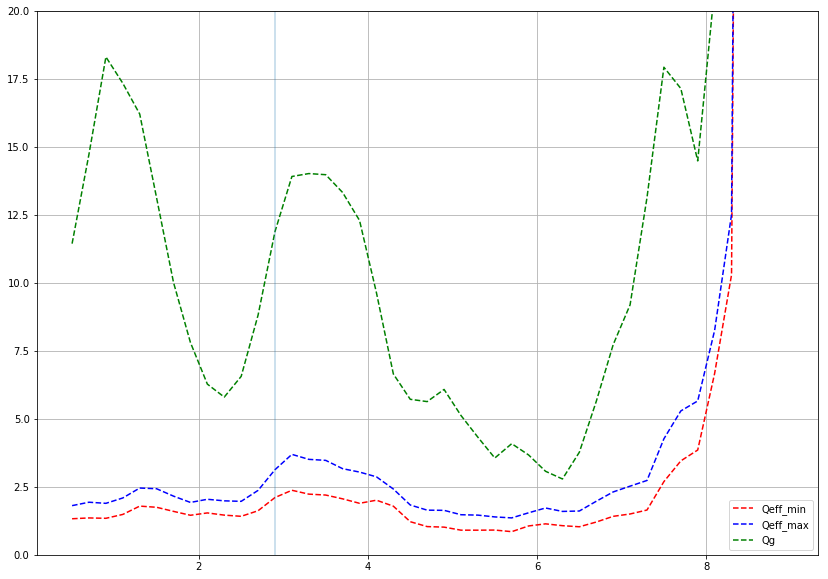

In [26]:
plt.figure(figsize=[14,10])
plt.plot(np.array(np.arange(0.5,9.,0.2)),Qeff_min_az, '--', label='Qeff_min', color='red')


plt.plot(np.array(np.arange(0.5,9.,0.2)),Qeff_max_az, '--', label='Qeff_max', color='blue')

plt.plot(np.array(np.arange(0.5,9.,0.2)),Qg_az, '--', label='Qg', color='green')
 


plt.grid()
plt.legend()
plt.axvline(x=2.9, alpha=0.3)
plt.ylim(0, 20.)

to do: нужно нормально оцифровать данные Леруа

# 2. Shear

$$ \Sigma_{gas} > \frac{2.5 A \sigma_{g}}{\pi G}$$

$A = 0.5 ( \dfrac{v(r_{gal})}{r_{gal}} - \dfrac{dv(r_{gal})}{dr_{gal}} ) $


In [19]:
G = 4.32
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 0.8 * A * sigma_g / np.pi / G

In [20]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        if(Sigma_gas > Sigma_crit[i][j]):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0

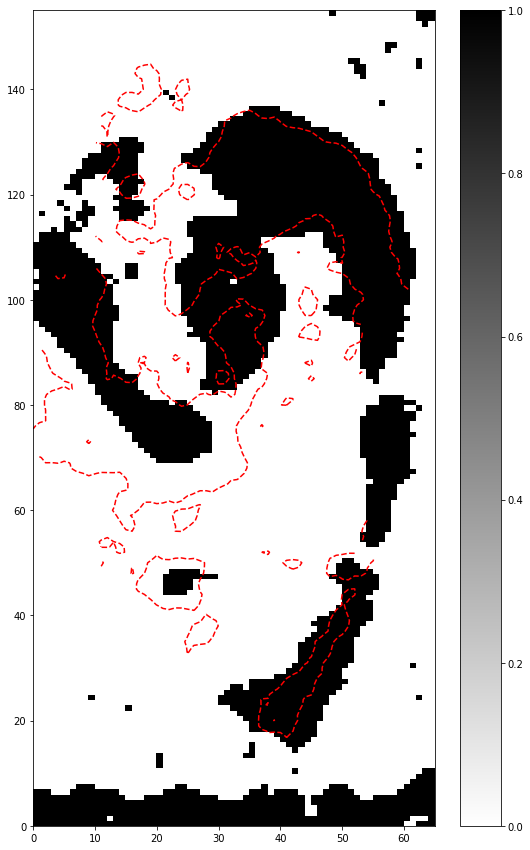

In [21]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.5,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [22]:
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 

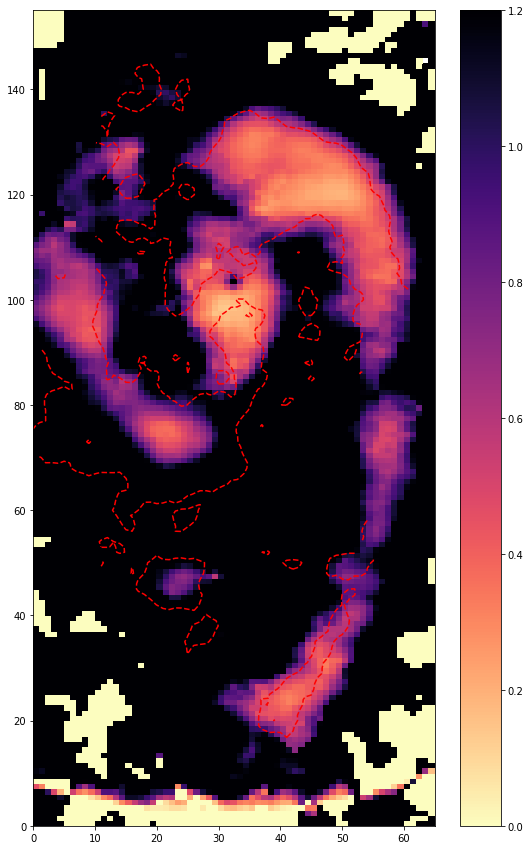

In [31]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.5,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, shear_method, cmap='magma_r')
quadmesh.set_clim(vmin = 0., vmax = 1.2)
plt.colorbar()

Построим график зависимости A(R)  

In [34]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))
A = []
R = np.array(np.linspace(0.1,9.,100))

for dist in R:
    A.append(0.5 * (velocity_approx(dist) / dist - velocity_approx.deriv()(dist)))

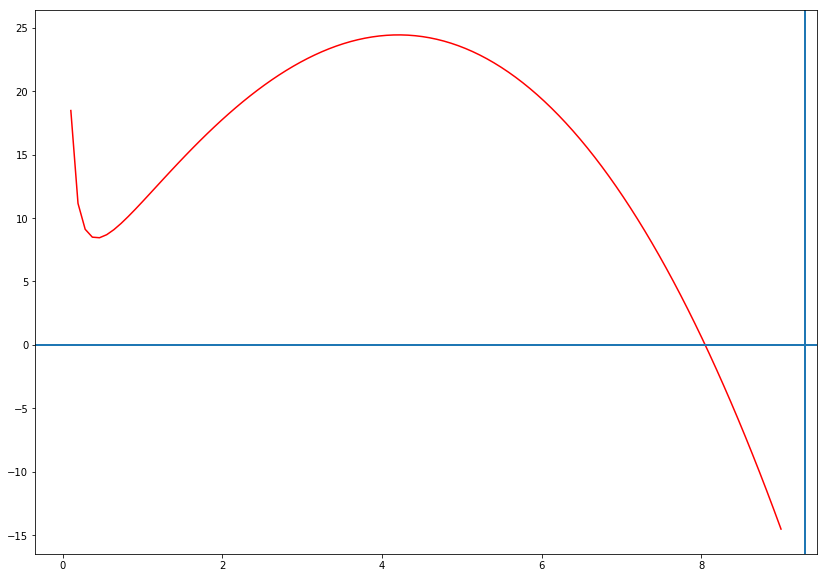

In [35]:
plt.figure(figsize=[14,10])
plt.plot(R,A, color='red')
plt.axhline(y = 0., lw = 2)
plt.axvline(x = 9.3, lw = 2)

# 3. Cold phase

$$ \Sigma_{SO_4} = \dfrac{6.1}{M_{\odot} pc^{-2}} f_g^{0.3}\left(\dfrac{Z}{0.1 Z_{\odot}}\right)^{-0.3} \left(\dfrac{I}{10^6 cm^{-2}s^{-1}}\right)^{0.23} $$

$$f_g = \dfrac{\Sigma_{gas}}{\Sigma_{gas}+\Sigma_{star}}$$

$$I = 10^6 cm^{-2}s^{-1}\left(\dfrac{\Sigma_{SFR}}{5\cdot 10^4 M_{\odot} yr^{-1} kpc^{-2}}\right) $$

Если $\Sigma_{gas} > \Sigma_{SO_4}$, то облать гравитационно нестабильна

In [23]:
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
cold_phase = np.zeros(dist_kpc.shape)
I = np.zeros(dist_kpc.shape)
I = Sigma_SFR * 5. * 10**10
Z_sun = 0.012
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase[i][j] = Sigma_SO / Sigma_gas  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float) 
        
np.save('./data/cold_phase.npy',cold_phase)        

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':


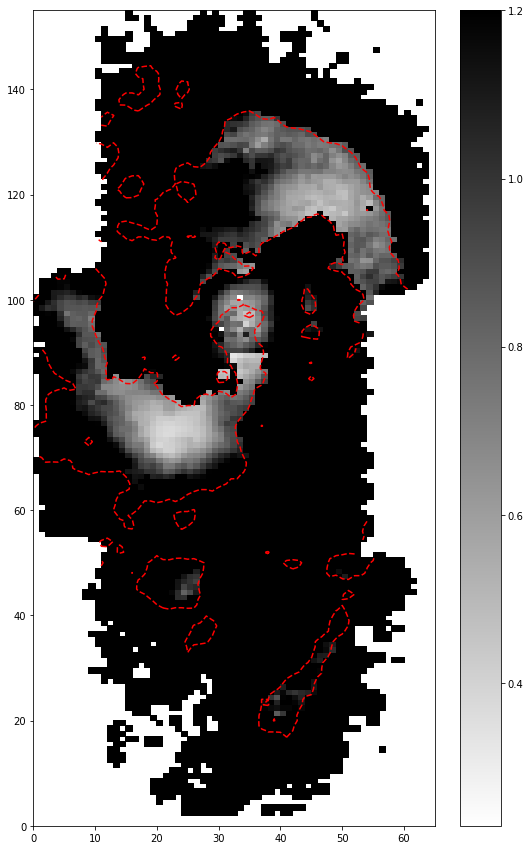

In [24]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.47,-12], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='gist_yarg')

quadmesh.set_clim( vmax = 1.2)
plt.colorbar()

In [29]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < cold_phase[i][j] <= 1.):
            Inst_field[i][j] = 1
        if(cold_phase[i][j] > 1.): 
            Inst_field[i][j] = 0
        if(Z[i][j] == NAN):
            Inst_field[i][j] = NAN

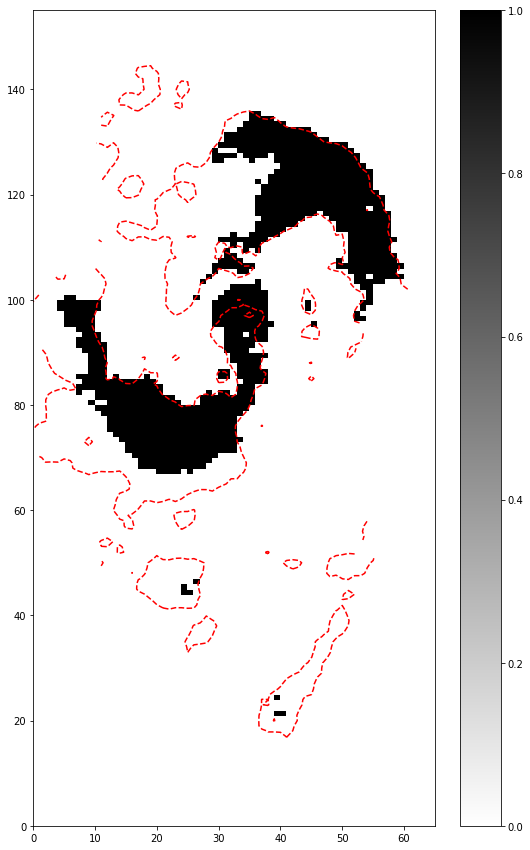

In [30]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.47,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

## Модель Romeo

In [63]:
G = 4.32
Qeff_max_rom = np.zeros(dist_kpc.shape)
Qeff_min_rom = np.zeros(dist_kpc.shape)
rom_comp_min = np.zeros(dist_kpc.shape)
rom_comp_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print (step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        try:
            rom_max, comp = functions.romeo_Qinv(r=None, epicycl=kappa, sound_vel_CO=c, sound_vel_HI=c, 
                            sigma_R=s_R_max, 
                            star_density=Sigma_s[i][j], HI_density=Sigma_HI[i][j], CO_density=Sigma_H2[i][j], 
                            alpha=0.3, thin=True, verbose=False)
        except ValueError:
            errors+=1
            rom_max = 0.01
            comp = 'error'
        Qeff_max_rom[i][j] = 1./rom_max
        if comp == 'star':
            marker = 1
        elif comp == 'HI':
            marker = 2
        elif comp == 'H2':
            marker = 3
        elif comp == 'error':
            marker = 0
        rom_comp_max[i][j] = marker
        
        try:
            rom_min, comp = functions.romeo_Qinv(r=None, epicycl=kappa, sound_vel_CO=c, sound_vel_HI=c, 
                            sigma_R=s_R_min, 
                            star_density=Sigma_s[i][j], HI_density=Sigma_HI[i][j], CO_density=Sigma_H2[i][j], 
                            alpha=0.7, thin=True, verbose=False)
        except ValueError:
            errors+=1
            rom_min = 0.01
            comp = 'error'
        Qeff_min_rom[i][j] = 1./rom_min
        if comp == 'star':
            marker = 1
        elif comp == 'HI':
            marker = 2
        elif comp == 'H2':
            marker = 3
        elif comp == 'error':
            marker = 0
        rom_comp_min[i][j] = marker

        
print ('Errors:{}'.format(errors))

functions.ipynb:39: RuntimeWarning: invalid value encountered in double_scalars
  "    X,Y=np.meshgrid(np.arange(0,width,1),np.arange(0,height,1))\n",


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:0


Text(0.5, 1.0, 'rom_comp_min')

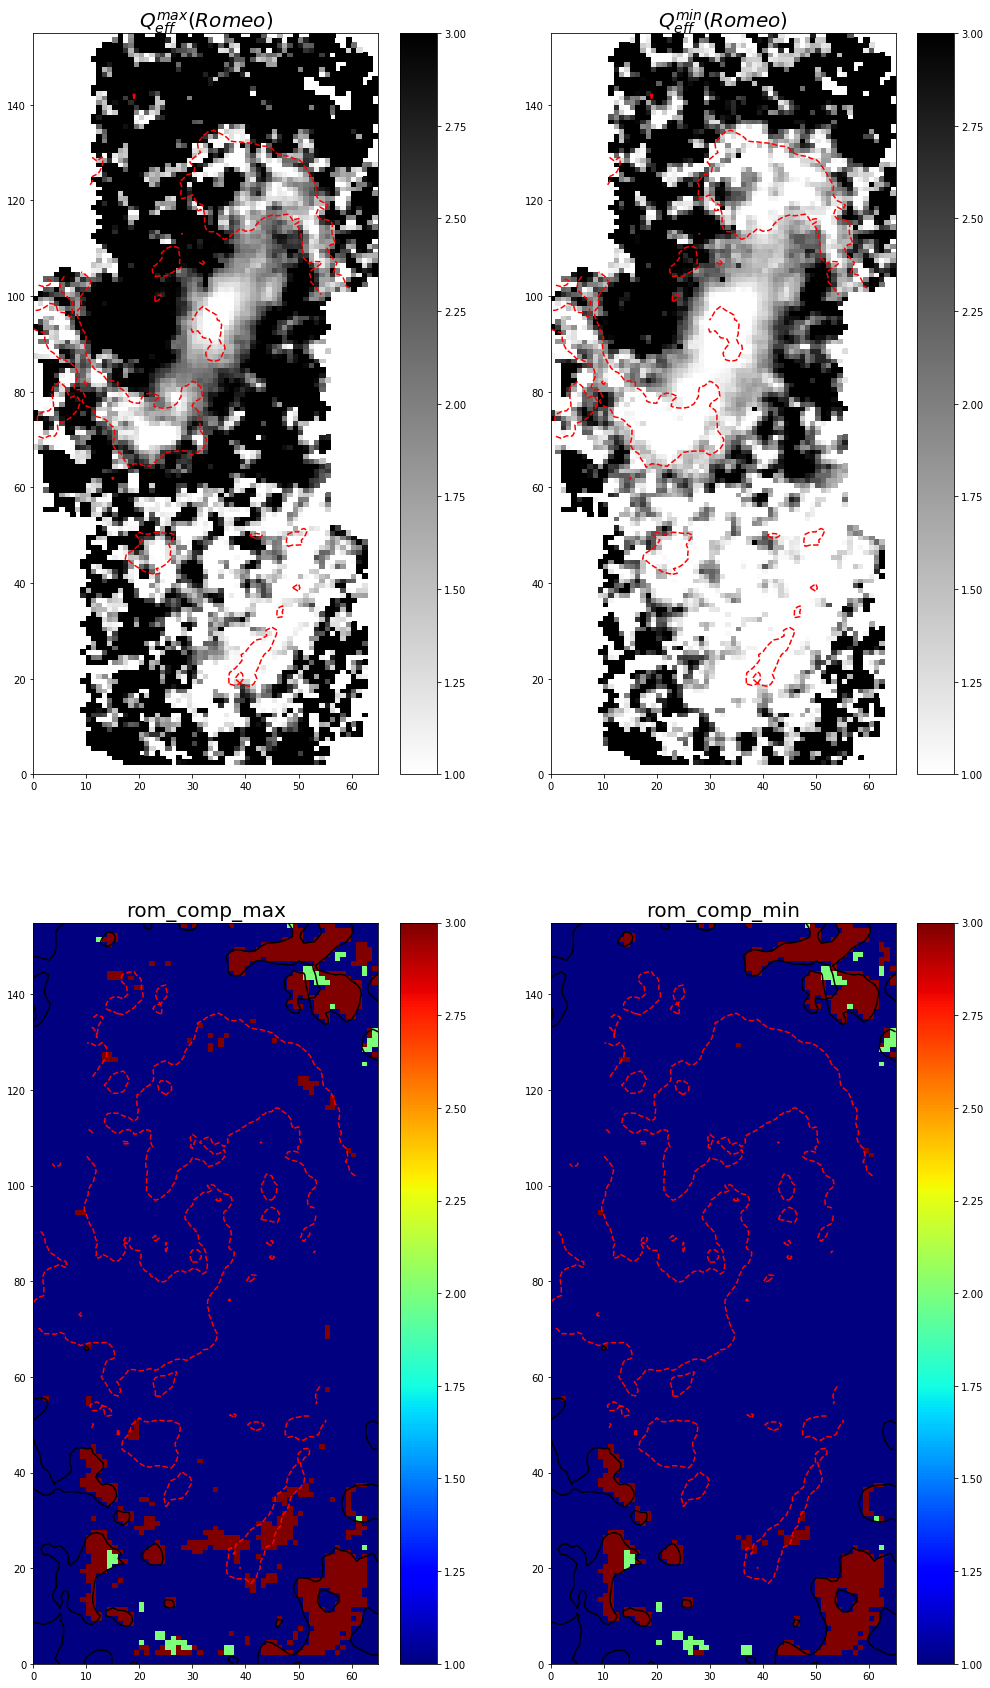

In [64]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 30])
plt.subplot(2,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_rom, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=3.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}(Romeo)$', fontsize=20)

plt.subplot(2,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y,Qeff_min_rom, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=3.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}(Romeo)$', fontsize=20)

plt.subplot(2,2,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.5,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, Sigma_H2, levels=[-10,0], aspect='auto', alpha=1, colors='black')
#CS = plt.contour(X, Y, Sigma_HI, levels=[-10,0], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, rom_comp_max, cmap='jet')
#quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title('rom_comp_max', fontsize=20)

plt.subplot(2,2,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.5,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, Sigma_H2, levels=[-10,0], aspect='auto', alpha=1, colors='black')
#CS = plt.contour(X, Y, Sigma_HI, levels=[-10,0], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y,rom_comp_min, cmap='jet')
#quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'rom_comp_min', fontsize=20)


# Статистика.

$$precision = \frac{TP}{TP+FP}$$ 

$$recall = \frac{TP}{TP+FN}$$ 

$$F1 = 2 \frac{precision \cdot recall}{precision + recall}$$

## Для Тумре

### Двухжидкостная модель

In [25]:
precision=np.zeros((30,30))
recall = np.zeros((30,30))
F1 = np.zeros((30,30))

for i, qlim in enumerate(np.linspace(0.5, 3.5, 30)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 30)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (k > 60):
                    if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qeff_min[k][l] >= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                        FN+=1 
                    if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                        FP+=1
         
        precision[i][j] = TP/(TP + FP)
        recall[i][j] = TP/(TP + FN)
        F1[i][j] = 2*precision[i][j] * recall[i][j]/(precision[i][j] + recall[i][j])

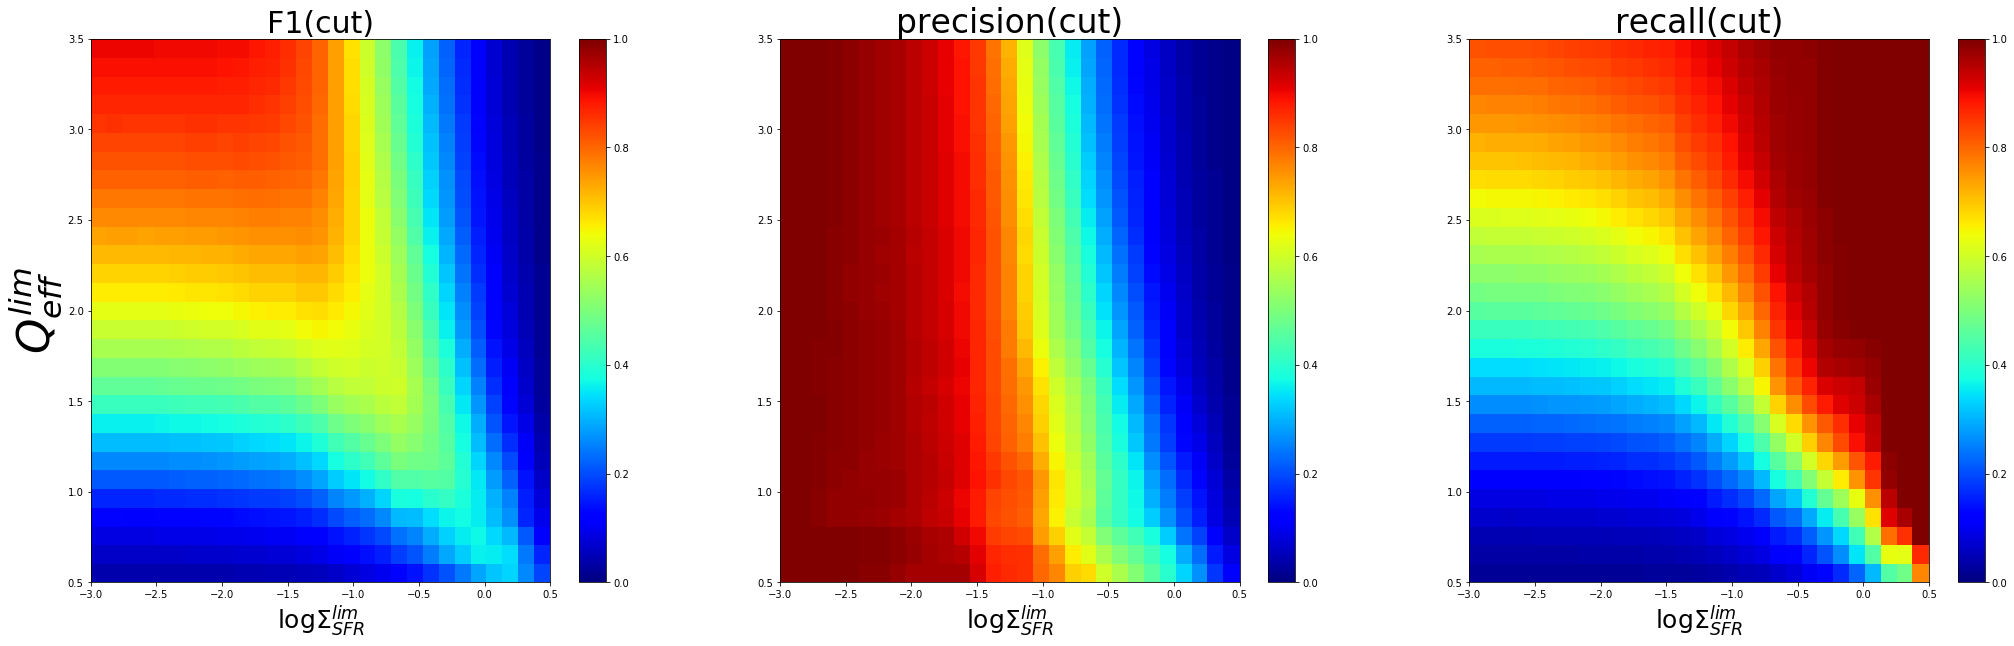

In [26]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 30), np.linspace(0.5, 3.5,30))
fig = plt.figure(figsize=[35, 10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1, cmap='jet')
plt.title('F1(cut)', fontsize=30)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$Q_{eff}^{lim}$', fontsize = 45)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('precision(cut)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('recall(cut)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()

In [27]:
precision=np.zeros((30,30))
recall = np.zeros((30,30))
F1 = np.zeros((30,30))

for i, qlim in enumerate(np.linspace(0.5, 3.5, 30)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 30)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                    if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qeff_min[k][l] >= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                        FN+=1 
                    if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                        FP+=1
         
        precision[i][j] = TP/(TP + FP)
        recall[i][j] = TP/(TP + FN)
        F1[i][j] = 2*precision[i][j] * recall[i][j]/(precision[i][j] + recall[i][j])

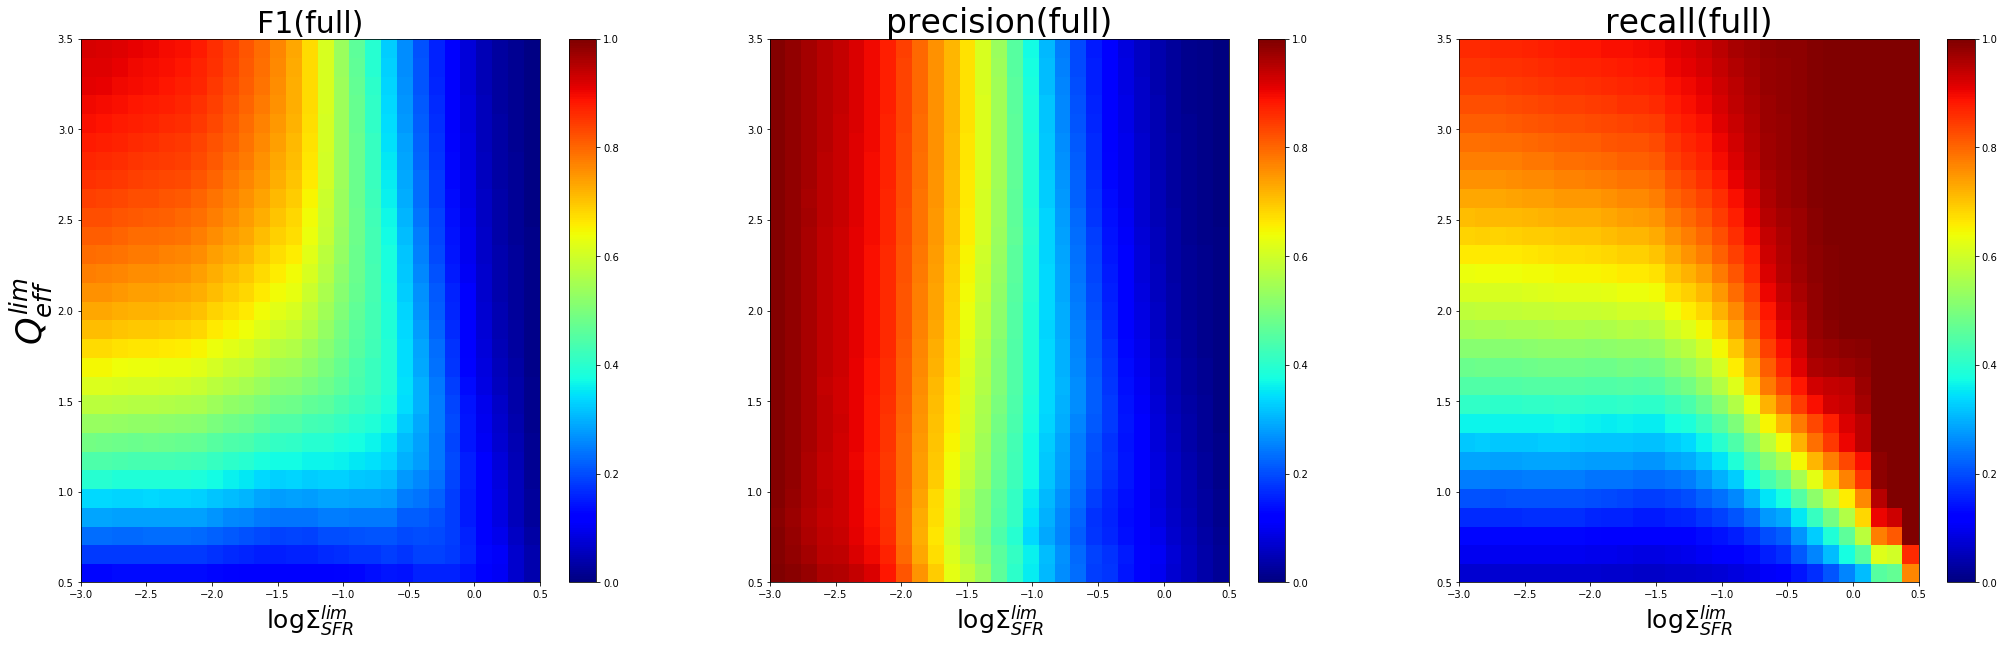

In [28]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 30), np.linspace(0.5, 3.5,30))
fig = plt.figure(figsize=[35, 10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$Q_{eff}^{lim}$', fontsize = 35)
plt.title('F1(full)', fontsize=30)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('precision(full)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('recall(full)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()

In [ ]:
precision3_cut=[]
recall3_cut = []
F13_cut = []
hlim = -14.4
for i, qlim in enumerate(np.linspace(0.5, 3.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (k > 60):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3_cut.append(TP/(TP + FP))
    recall3_cut.append(TP/(TP + FN))
    F13_cut.append(2*precision3_cut[i] * recall3_cut[i]/(precision3_cut[i] + recall3_cut[i]))

In [11]:
precision3=[]
recall3 = []
F13 = []
hlim = -14.4
for i, qlim in enumerate(np.linspace(0.5, 3.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3.append(TP/(TP + FP))
    recall3.append(TP/(TP + FN))
    F13.append(2*precision3[i] * recall3[i]/(precision3[i] + recall3[i]))

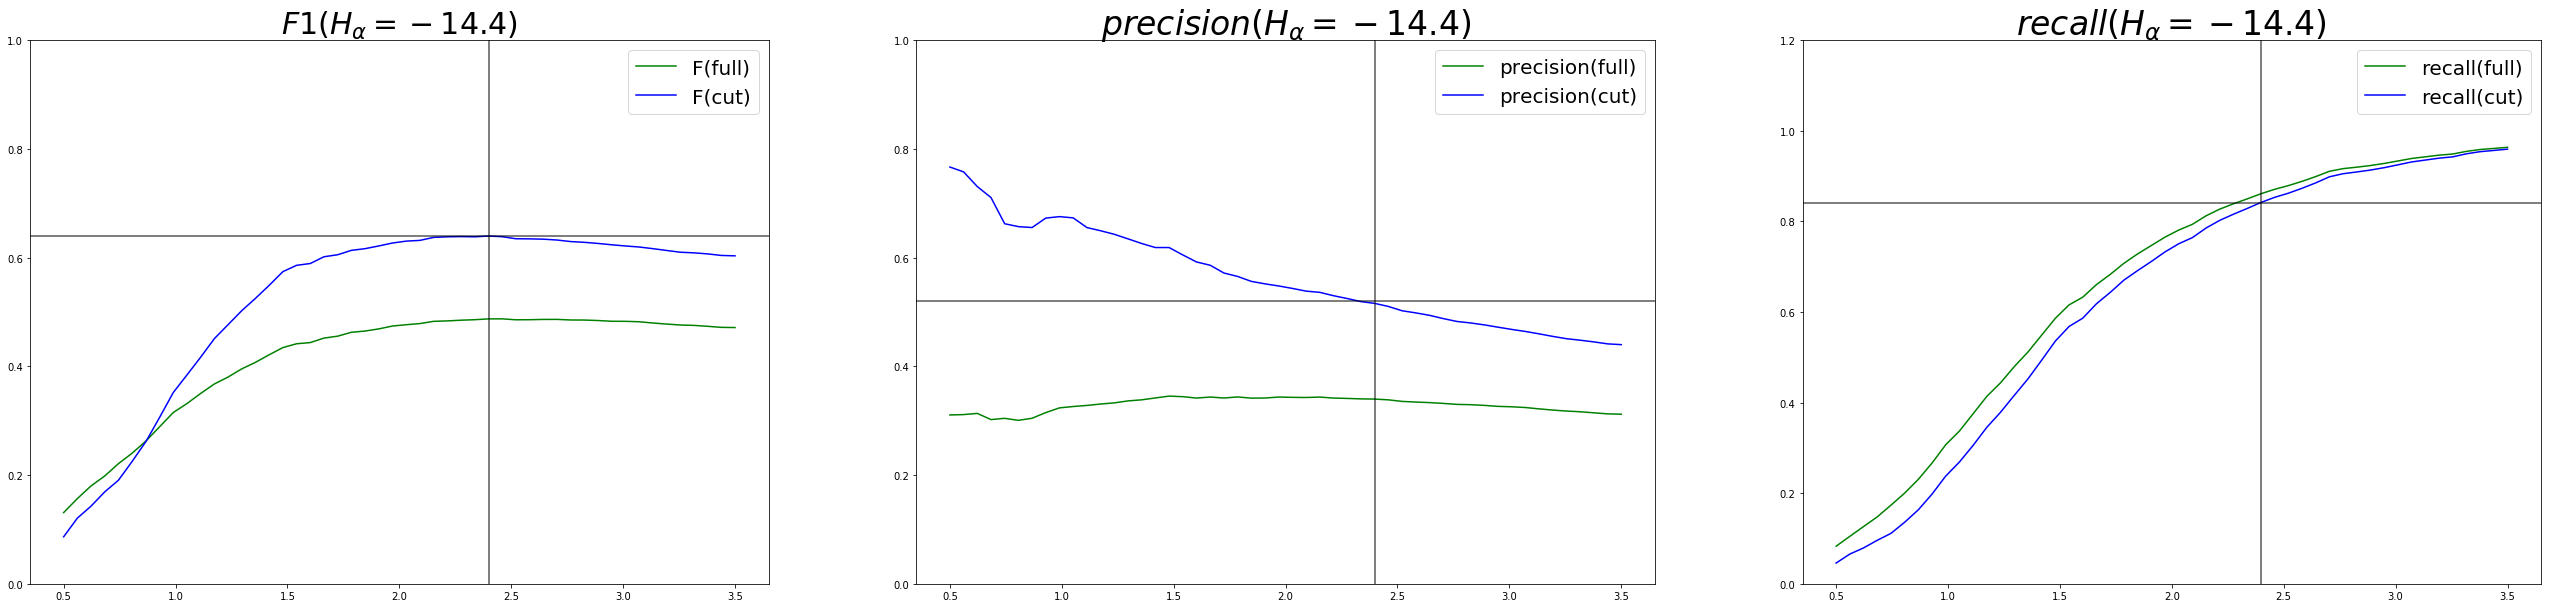

In [12]:
xx =np.array(np.linspace(0.5, 3.5, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F13,'-', label='F(full)', color='green')
plt.plot(xx,F13_cut,'-', label='F(cut)', color='blue')
plt.ylim(0.,1.)
plt.title(r'$F1(H_{\alpha} = -14.4)$', fontsize=30)
plt.axvline(x=2.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.64, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision3,'-', label='precision(full)', color='green')
plt.plot(xx,precision3_cut,'-', label='precision(cut)', color='blue')
plt.title(r'$precision(H_{\alpha} = -14.4)$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=2.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.52, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall3,'-', label='recall(full)', color='green')
plt.plot(xx,recall3_cut,'-', label='recall(cut)', color='blue')
plt.title(r'$recall(H_{\alpha} = -14.4)$', fontsize=33)
plt.ylim(0.,1.2)
plt.axvline(x=2.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.84, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)

In [13]:
precision3_cut=[]
recall3_cut = []
F13_cut = []
hlim = -14.8
for i, qlim in enumerate(np.linspace(0.5, 3.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (k > 60):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3_cut.append(TP/(TP + FP))
    recall3_cut.append(TP/(TP + FN))
    F13_cut.append(2*precision3_cut[i] * recall3_cut[i]/(precision3_cut[i] + recall3_cut[i]))

In [14]:
precision3=[]
recall3 = []
F13 = []
hlim = -14.8
for i, qlim in enumerate(np.linspace(0.5, 3.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3.append(TP/(TP + FP))
    recall3.append(TP/(TP + FN))
    F13.append(2*precision3[i] * recall3[i]/(precision3[i] + recall3[i]))

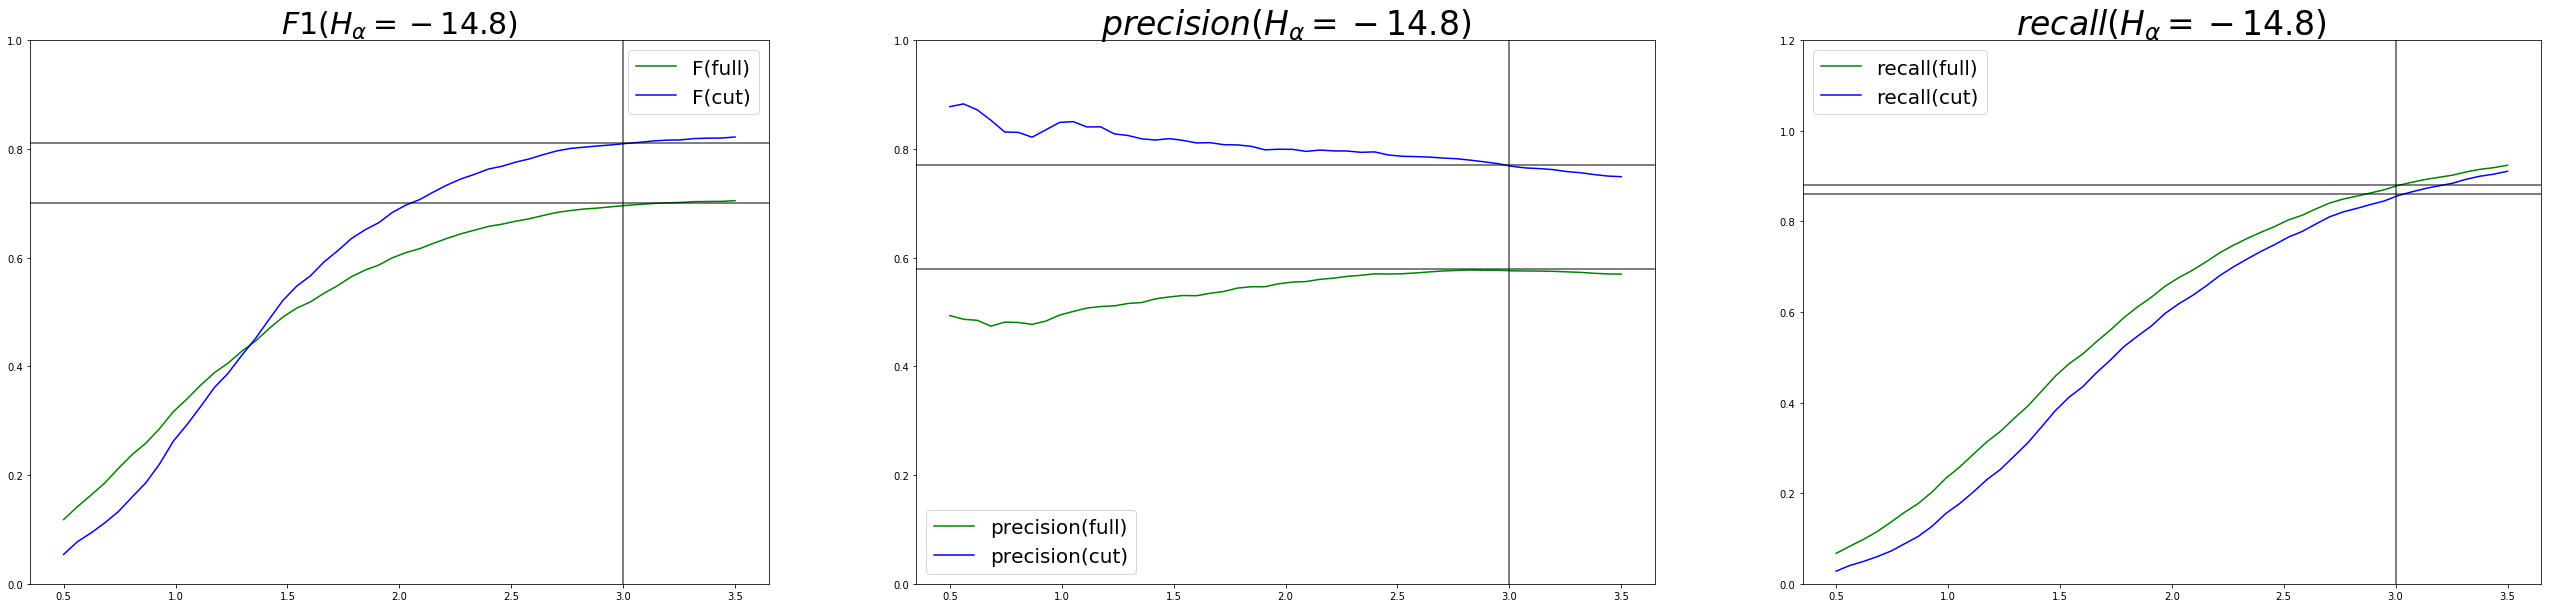

In [20]:
xx =np.array(np.linspace(0.5, 3.5, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F13,'-', label='F(full)', color='green')
plt.plot(xx,F13_cut,'-', label='F(cut)', color='blue')
plt.ylim(0.,1.)
plt.title(r'$F1(H_{\alpha} = -14.8)$', fontsize=30)
plt.axvline(x=3, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.81, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.7, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision3,'-', label='precision(full)', color='green')
plt.plot(xx,precision3_cut,'-', label='precision(cut)', color='blue')
plt.title(r'$precision(H_{\alpha} = -14.8)$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=3, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.77, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.58, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall3,'-', label='recall(full)', color='green')
plt.plot(xx,recall3_cut,'-', label='recall(cut)', color='blue')
plt.title(r'$recall(H_{\alpha} = -14.8)$', fontsize=33)
plt.ylim(0.,1.2)
plt.axvline(x=3, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.88, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.86, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)

In [21]:
precision3_cut=[]
recall3_cut = []
F13_cut = []
hlim = -14.
for i, qlim in enumerate(np.linspace(0.5, 3.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (k > 60):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3_cut.append(TP/(TP + FP))
    recall3_cut.append(TP/(TP + FN))
    F13_cut.append(2*precision3_cut[i] * recall3_cut[i]/(precision3_cut[i] + recall3_cut[i]))

In [22]:
precision3=[]
recall3 = []
F13 = []
hlim = -14.
for i, qlim in enumerate(np.linspace(0.5, 3.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3.append(TP/(TP + FP))
    recall3.append(TP/(TP + FN))
    F13.append(2*precision3[i] * recall3[i]/(precision3[i] + recall3[i]))

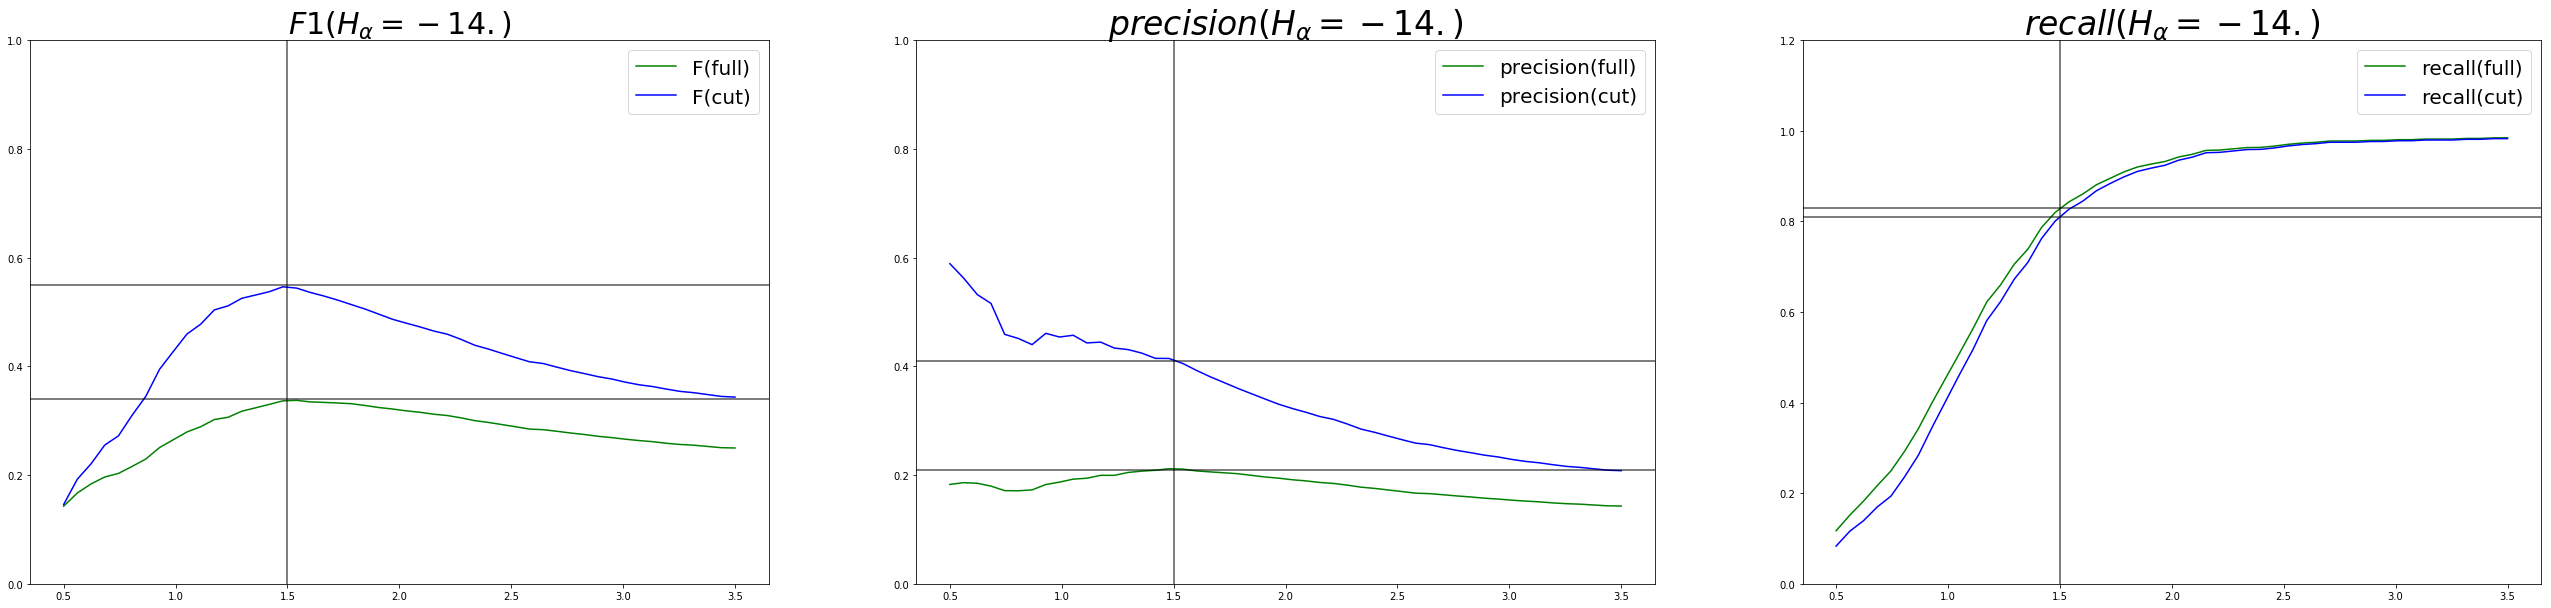

In [28]:
xx =np.array(np.linspace(0.5, 3.5, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F13,'-', label='F(full)', color='green')
plt.plot(xx,F13_cut,'-', label='F(cut)', color='blue')
plt.ylim(0.,1.)
plt.title(r'$F1(H_{\alpha} = -14.)$', fontsize=30)
plt.axvline(x=1.5, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.55, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.34, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision3,'-', label='precision(full)', color='green')
plt.plot(xx,precision3_cut,'-', label='precision(cut)', color='blue')
plt.title(r'$precision(H_{\alpha} = -14.)$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=1.5, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.41, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.21, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall3,'-', label='recall(full)', color='green')
plt.plot(xx,recall3_cut,'-', label='recall(cut)', color='blue')
plt.title(r'$recall(H_{\alpha} = -14.)$', fontsize=33)
plt.ylim(0.,1.2)
plt.axvline(x=1.5, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.81, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.83, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)

## Подберём наилучшее пороговое значение для $\Sigma_{SFR}$ при предельном значении $Q_{eff}^{lim} = 3$(двухжидкостный) 

In [129]:
precision3_cut=[]
recall3_cut = []
F13_cut = []
qlim = 3.
for i, hlim in enumerate(np.linspace(-3., 0.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (k > 60):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
    precision3_cut.append(TP/(TP + FP))
    recall3_cut.append(TP/(TP + FN))
    F13_cut.append(2*precision3_cut[i] * recall3_cut[i]/(precision3_cut[i] + recall3_cut[i]))

In [130]:
precision3=[]
recall3 = []
F13 = []
qlim = 3.
for i, hlim in enumerate(np.linspace(-3., 0.5, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
    precision3.append(TP/(TP + FP))
    recall3.append(TP/(TP + FN))
    F13.append(2*precision3[i] * recall3[i]/(precision3[i] + recall3[i]))

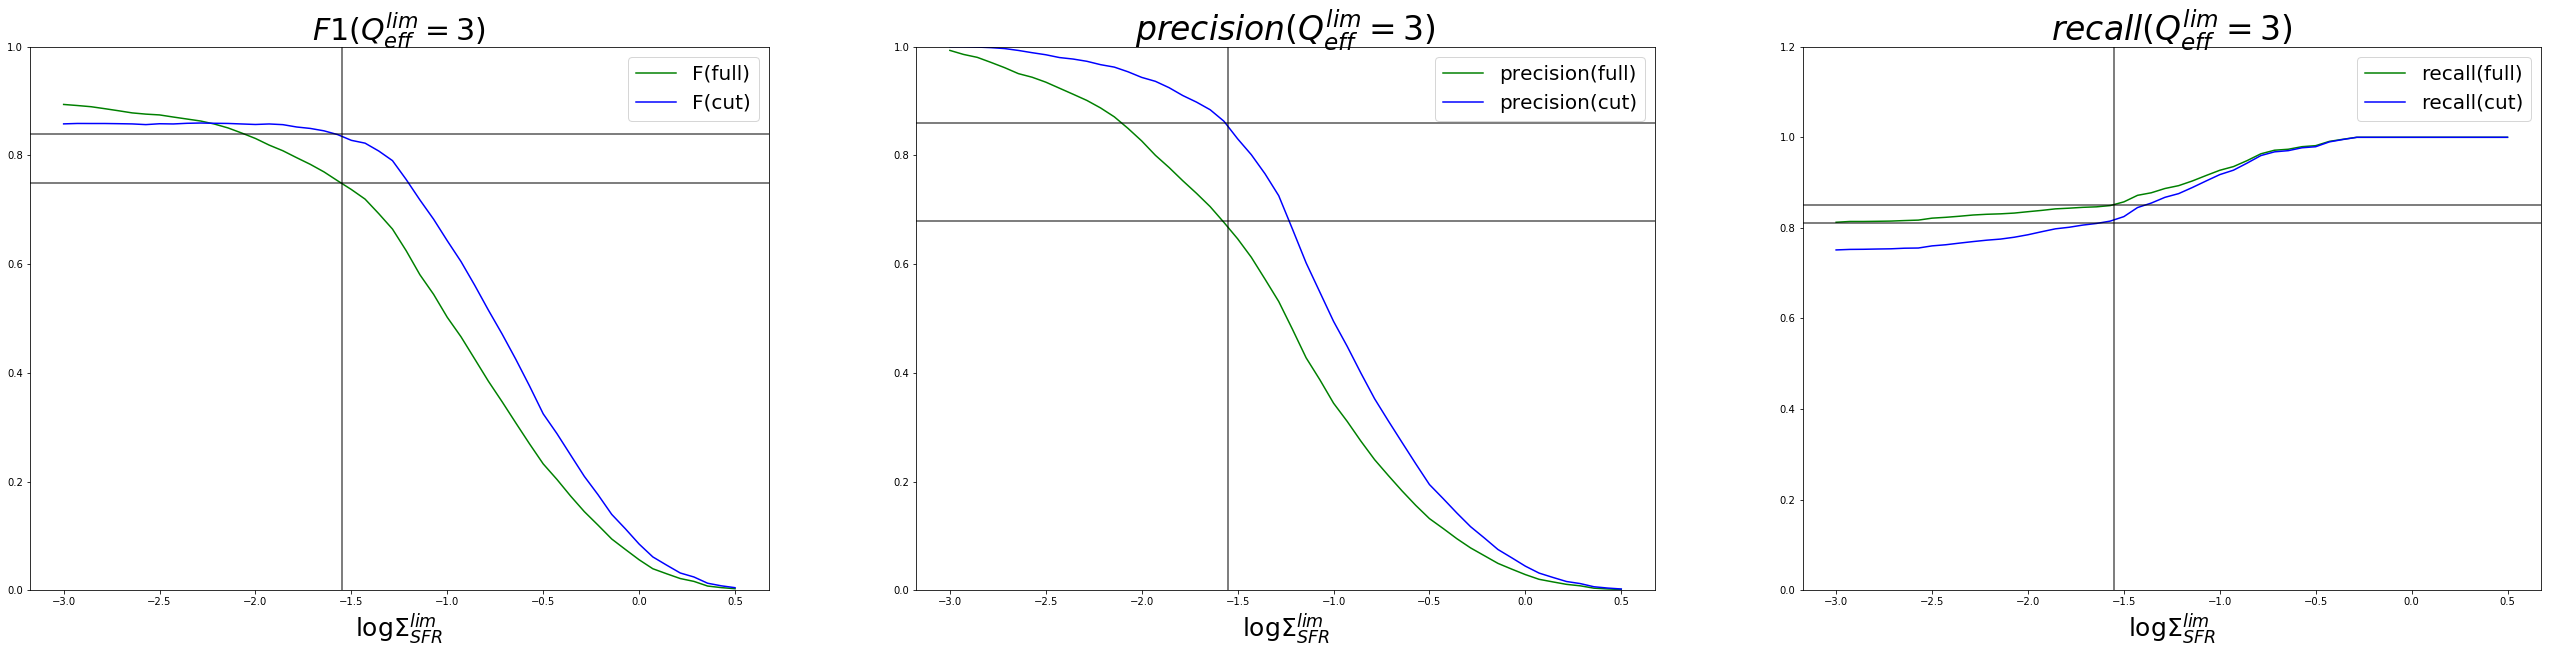

In [132]:
xx =np.array(np.linspace(-3., 0.5, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F13,'-', label='F(full)', color='green')
plt.plot(xx,F13_cut,'-', label='F(cut)', color='blue')
plt.ylim(0.,1.)
plt.title(r'$F1(Q_{eff}^{lim} = 3)$', fontsize=30)
plt.axvline(x=-1.55, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.84, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.75, alpha=0.5, color='black', lw=2)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision3,'-', label='precision(full)', color='green')
plt.plot(xx,precision3_cut,'-', label='precision(cut)', color='blue')
plt.title(r'$precision(Q_{eff}^{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-1.55, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.86, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.68, alpha=0.5, color='black', lw=2)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall3,'-', label='recall(full)', color='green')
plt.plot(xx,recall3_cut,'-', label='recall(cut)', color='blue')
plt.title(r'$recall(Q_{eff}^{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.2)
plt.axvline(x=-1.55, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.81, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.85, alpha=0.5, color='black', lw=2)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.legend(fontsize = 20)

In [17]:
Inst_field1 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(Qeff_min[i][j] <=3.):
            Inst_field1[i][j] = 1
        else: 
            Inst_field1[i][j] = 0
            
Inst_field3 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(Qeff_max[i][j] <= 3.):
            Inst_field3[i][j] = 1
        else: 
            Inst_field3[i][j] = 0            
            
        

Text(0.5, 1.0, '$Q_{eff}^{max}$')

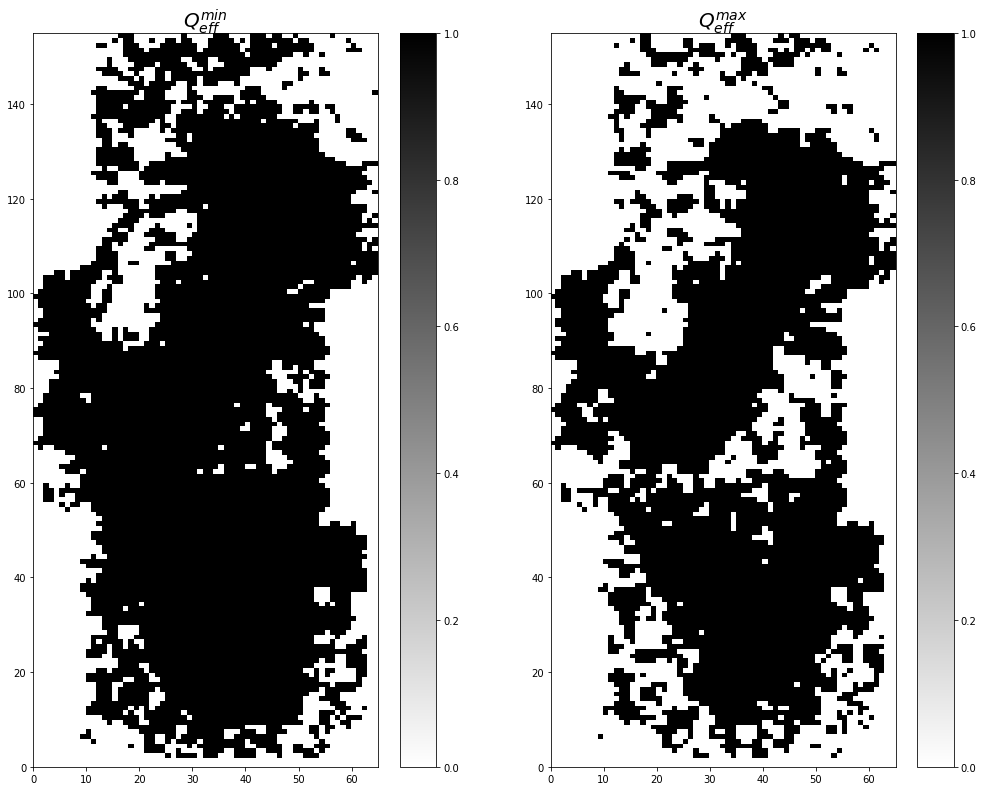

In [25]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contourf(X, Y, np.log10(H_alpha), levels=[-15.05,-12],colors='red',hatches=['.'], alpha=0)
quadmesh = plt.pcolormesh(X, Y, Inst_field1, cmap='gist_yarg')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contourf(X, Y, np.log10(H_alpha), levels=[-15.05,-12],hatches=['.'], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field3, cmap='gist_yarg')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

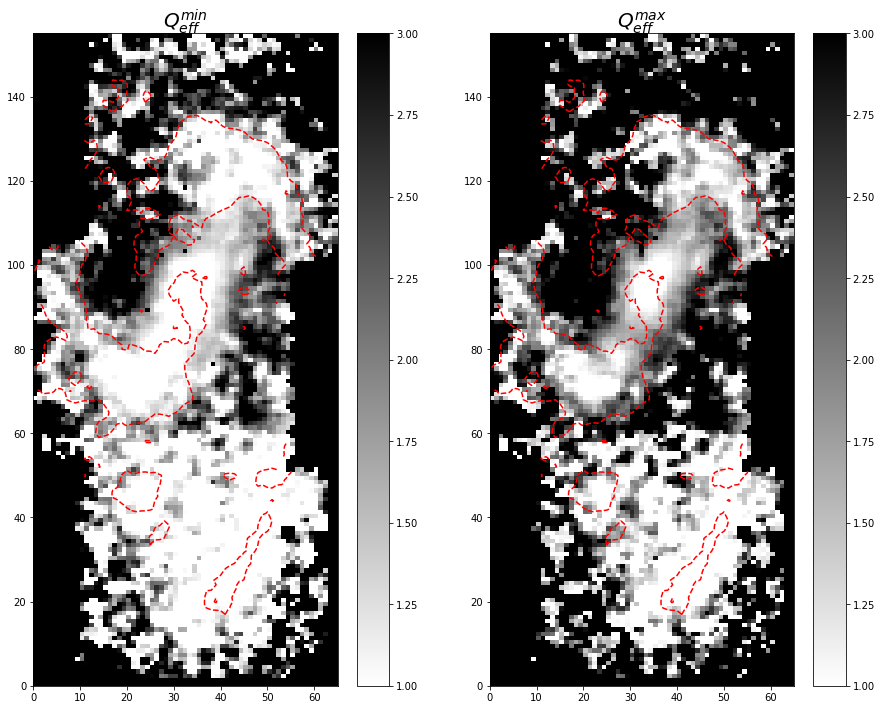

In [74]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[15, 12])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.4,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=3.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y,np.log10(H_alpha), levels=[-14.4,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=3.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

## Одножидкостный параметр грав. неустойчивости

In [29]:
precision=np.zeros((30,30))
recall = np.zeros((30,30))
F1 = np.zeros((30,30))

for i, qlim in enumerate(np.linspace(2., 3.5, 30)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 30)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (k > 60):
                    if (0 <= Qg[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qg[k][l] >= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                        FN+=1 
                    if (0 <= Qg[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                        FP+=1
         
        precision[i][j] = TP/(TP + FP)
        recall[i][j] = TP/(TP + FN)
        F1[i][j] = 2*precision[i][j] * recall[i][j]/(precision[i][j] + recall[i][j])

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


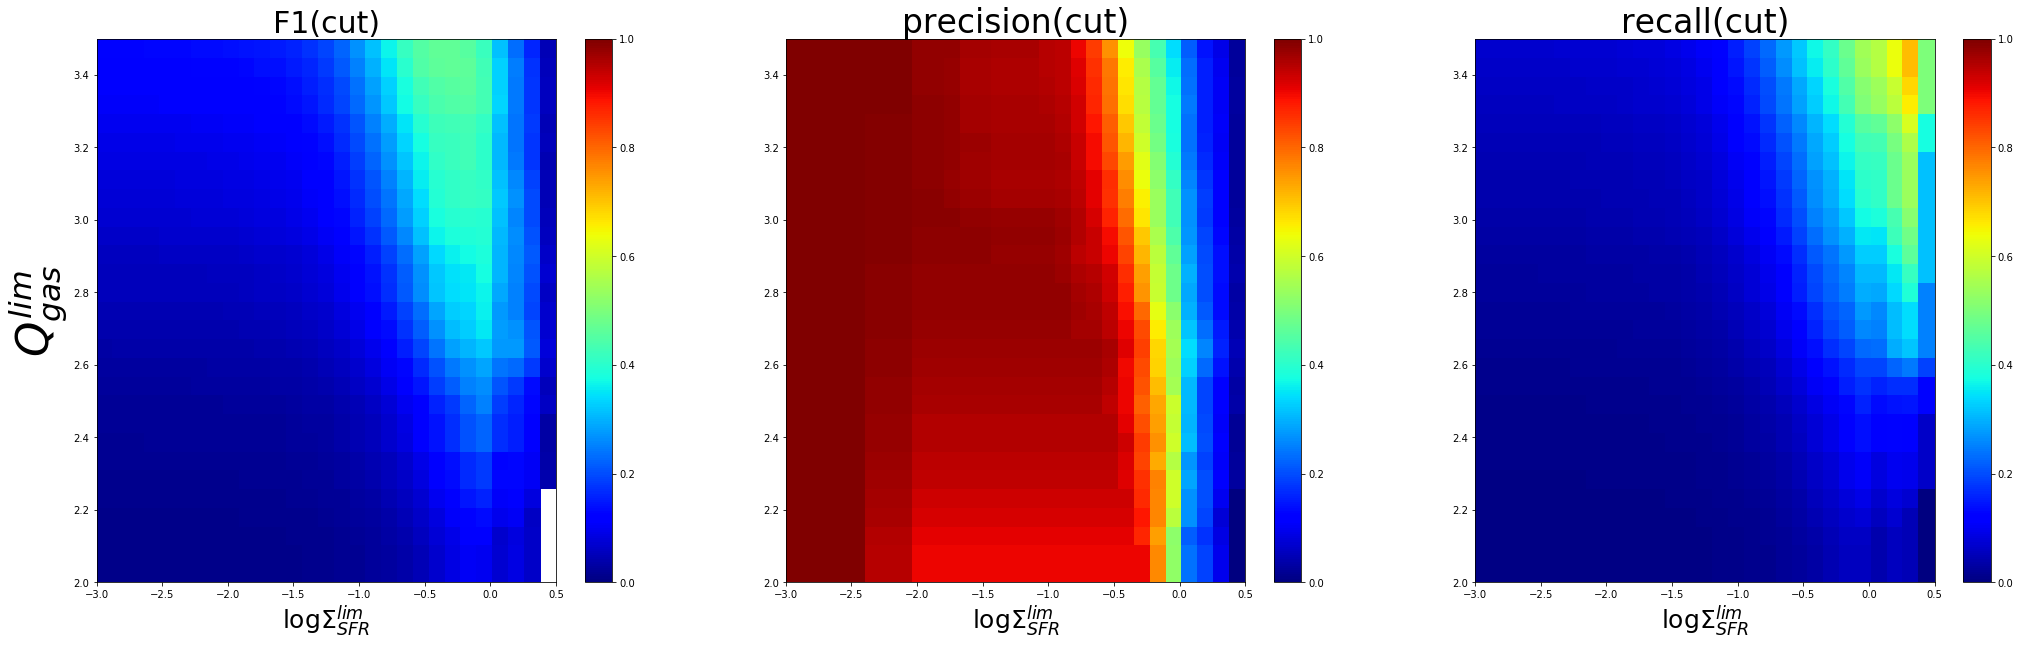

In [30]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 30), np.linspace(2., 3.5,30))
fig = plt.figure(figsize=[35, 10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$Q_{gas}^{lim}$', fontsize = 45)
plt.title('F1(cut)', fontsize=30)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('precision(cut)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('recall(cut)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()

In [31]:
precision=np.zeros((30,30))
recall = np.zeros((30,30))
F1 = np.zeros((30,30))

for i, qlim in enumerate(np.linspace(2., 3.5, 30)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 30)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                    if (0 <= Qg[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                        TP+=1
                    
                    if (Qg[k][l] >= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                        FN+=1 
                    if (0 <= Qg[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                        FP+=1
         
        precision[i][j] = TP/(TP + FP)
        recall[i][j] = TP/(TP + FN)
        F1[i][j] = 2*precision[i][j] * recall[i][j]/(precision[i][j] + recall[i][j])

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


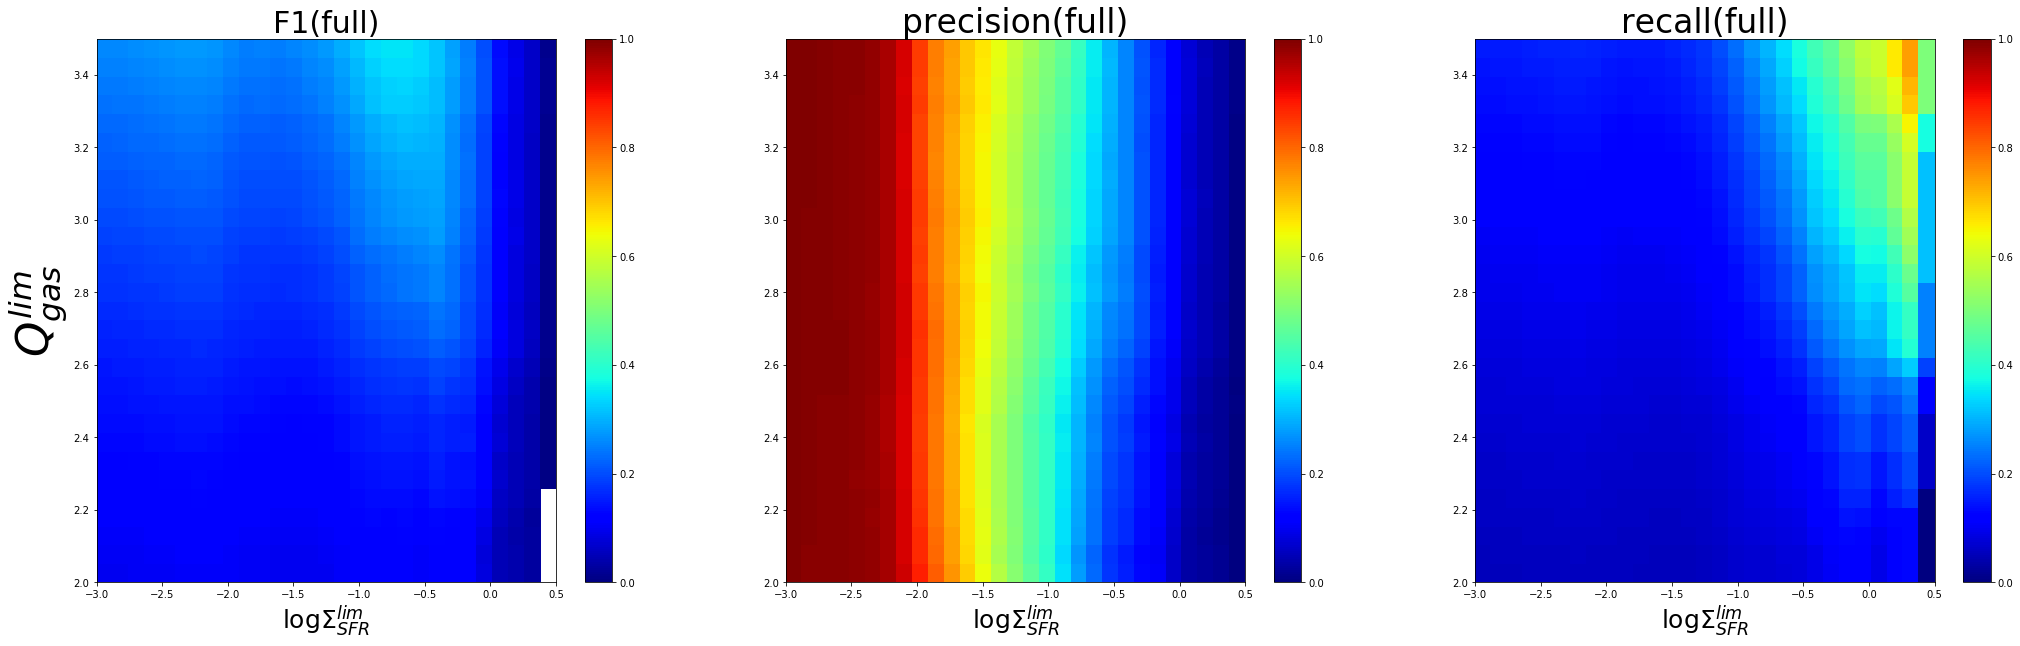

In [32]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 30), np.linspace(2., 3.5,30))
fig = plt.figure(figsize=[35, 10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$Q_{gas}^{lim}$', fontsize = 45)
plt.title('F1(full)', fontsize=30)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('precision(full)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('recall(full)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()

In [135]:
precision3=[]
recall3 = []
F13 = []
qlim = 3.
for i, hlim in enumerate(np.linspace(-3., 0., 30)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
           
                if (0 <= Qg[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qg[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
    precision3.append(TP/(TP + FP))
    recall3.append(TP/(TP + FN))
    F13.append(2*precision3[i] * recall3[i]/(precision3[i] + recall3[i]))

In [136]:
precision3_cut=[]
recall3_cut = []
F13_cut = []
qlim = 3.
for i, hlim in enumerate(np.linspace(-3., 0., 30)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if(k>60):
                if (0 <= Qg[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (Qg[k][l] >= qlim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qg[k][l] <= qlim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
    precision3_cut.append(TP/(TP + FP))
    recall3_cut.append(TP/(TP + FN))
    F13_cut.append(2*precision3_cut[i] * recall3_cut[i]/(precision3_cut[i] + recall3_cut[i]))

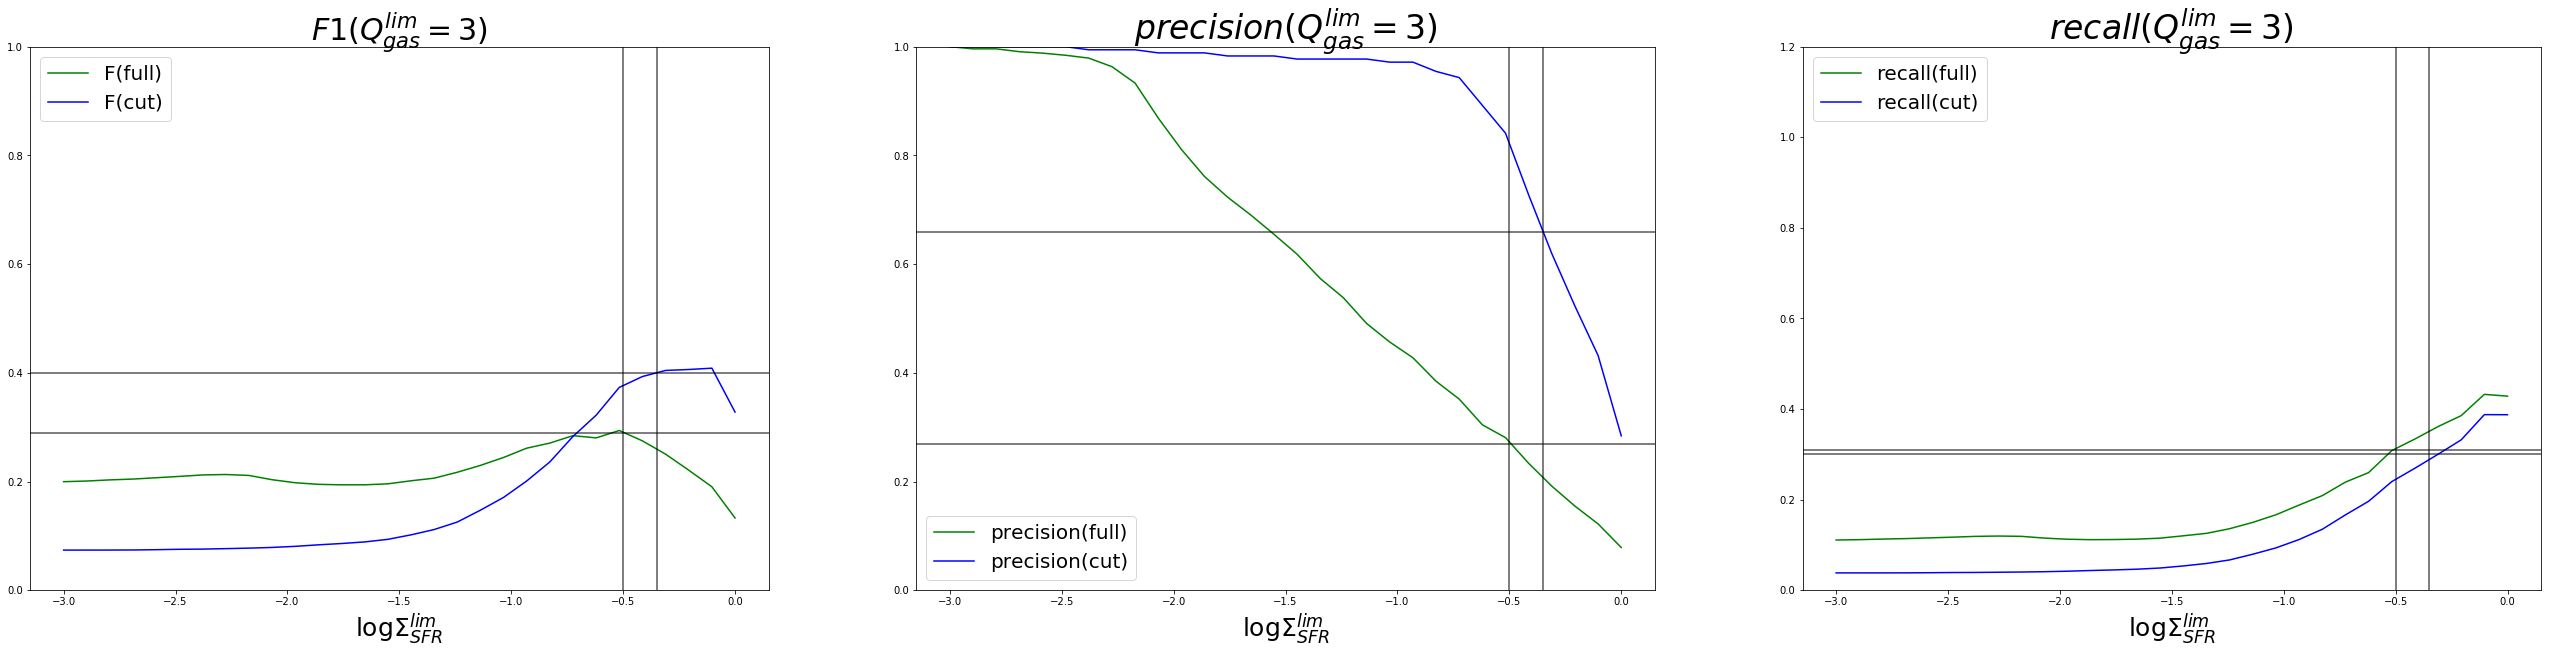

In [145]:
xx =np.array(np.linspace(-3., 0., 30))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F13,'-', label='F(full)', color='green')
plt.plot(xx,F13_cut,'-', label='F(cut)', color='blue')
plt.ylim(0.,1.)
plt.title(r'$F1(Q_{gas}^{lim} = 3)$', fontsize=30)
plt.axvline(x=-0.5, alpha=0.5, color='black', lw=2)
plt.axvline(x=-0.35, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.29, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.4, alpha=0.5, color='black', lw=2)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision3,'-', label='precision(full)', color='green')
plt.plot(xx,precision3_cut,'-', label='precision(cut)', color='blue')
plt.title(r'$precision(Q_{gas}^{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-0.5, alpha=0.5, color='black', lw=2)
plt.axvline(x=-0.35, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.27, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.66, alpha=0.5, color='black', lw=2)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall3,'-', label='recall(full)', color='green')
plt.plot(xx,recall3_cut,'-', label='recall(cut)', color='blue')
plt.title(r'$recall(Q_{gas}^{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.2)
plt.axvline(x=-0.5, alpha=0.5, color='black', lw=2)
plt.axvline(x=-0.35, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.31, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.30, alpha=0.5, color='black', lw=2)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.legend(fontsize = 20)

Text(0.5, 1.0, '$Q_{gas}^{lim} = 3$, $\\log{\\Sigma_{SFR}^{lim}} = -0.5$')

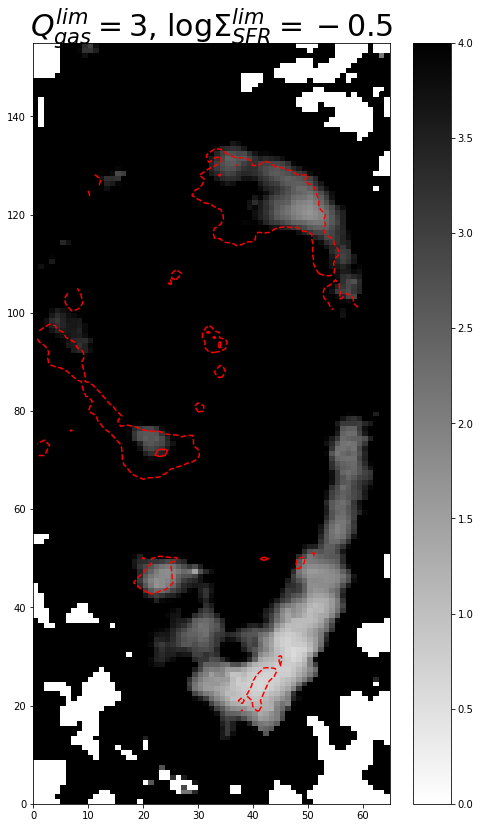

In [147]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[8,14])

CS = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-0.5,0.5], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qg, cmap='gist_yarg')
quadmesh.set_clim(vmin=0., vmax = 4.)
plt.colorbar()
plt.title(r'$Q_{gas}^{lim} = 3$, $\log{\Sigma_{SFR}^{lim}} = -0.5$', fontsize=30)

## shear

In [33]:
G = 4.32
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = A * sigma_g / np.pi / G # без умножения на alpha_A
    
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 

In [34]:
precision_shear=np.zeros((30,30))
recall_shear = np.zeros((30,30))
F1_shear = np.zeros((30,30))

for i, alpha_A in enumerate(np.linspace(0.2, 3., 30)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 30)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (alpha_A*shear_method[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (alpha_A*shear_method[k][l] >= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (alpha_A*shear_method[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
        precision_shear[i][j] = TP/(TP + FP)
        recall_shear[i][j] = TP/(TP + FN)
        F1_shear[i][j] = 2*precision_shear[i][j] * recall_shear[i][j]/(precision_shear[i][j] + recall_shear[i][j])

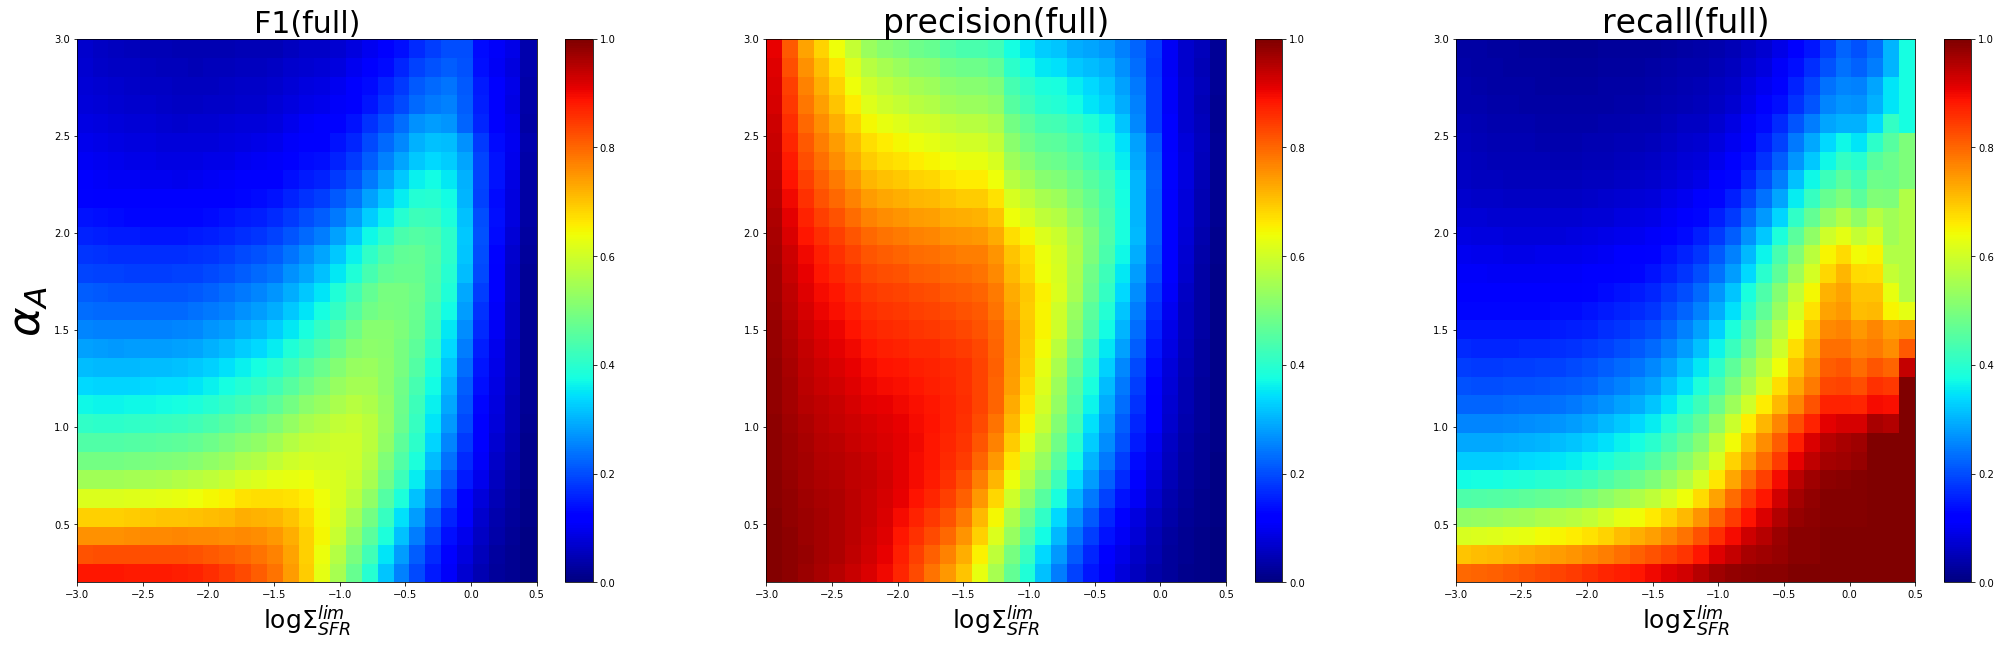

In [35]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 30), np.linspace(0.2, 3., 30))
fig = plt.figure(figsize=[35, 10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_shear, cmap='jet')
plt.title('F1(full)', fontsize=30)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$\alpha_A$', fontsize = 45)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_shear, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('precision(full)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_shear, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('recall(full)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar() 

In [36]:
precision_shear_cut=np.zeros((30,30))
recall_shear_cut = np.zeros((30,30))
F1_shear_cut = np.zeros((30,30))

for i, alpha_A in enumerate(np.linspace(0.2, 3., 30)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 30)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (k>60):
                    if (alpha_A*shear_method[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                        TP+=1
                    
                    if (alpha_A*shear_method[k][l] >= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                        FN+=1 
                    if (alpha_A*shear_method[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                        FP+=1
         
        precision_shear_cut[i][j] = TP/(TP + FP)
        recall_shear_cut[i][j] = TP/(TP + FN)
        F1_shear_cut[i][j] = 2*precision_shear_cut[i][j] * recall_shear_cut[i][j]/(precision_shear_cut[i][j] + recall_shear_cut[i][j])

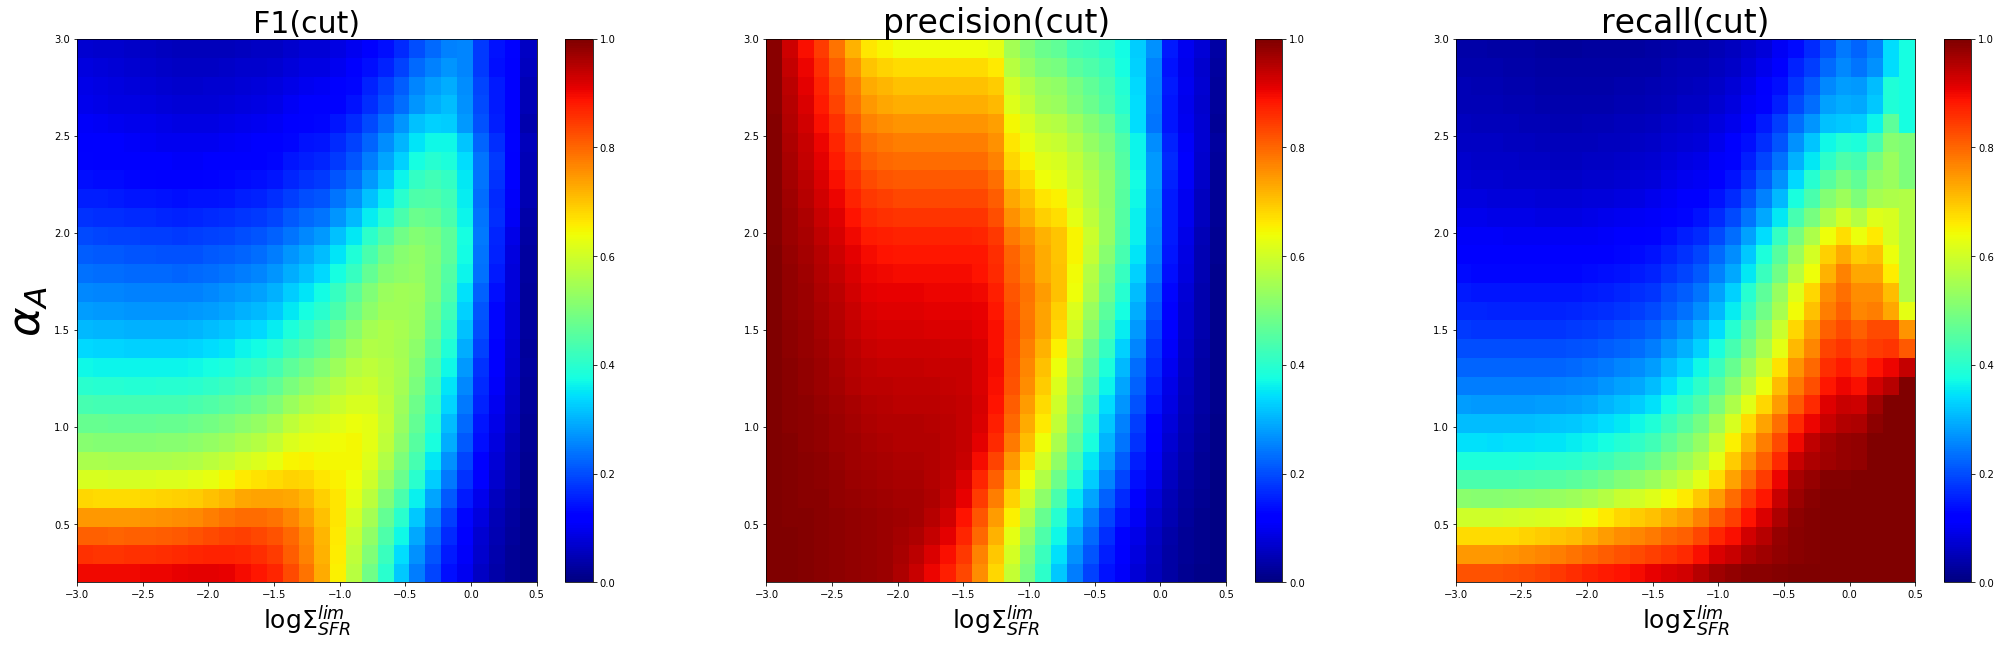

In [37]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 30), np.linspace(0.2, 3., 30))
fig = plt.figure(figsize=[35, 10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_shear_cut, cmap='jet')
plt.title('F1(cut)', fontsize=30)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$\alpha_A$', fontsize = 45)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_shear_cut, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('precision(cut)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_shear_cut, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('recall(cut)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar() 

In [8]:
precision_shear=np.zeros((20,9))
recall_shear = np.zeros((20,9))
F1_shear = np.zeros((20,9))

for i, alpha_A in enumerate(np.linspace(0.2, 3, 20)):
    for j, hlim in enumerate(np.linspace(-2., -1.1, 9)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                #if (k > 57) & (np.nan_to_num(H_alpha)[k][l] != 0):
                    if (alpha_A*shear_method[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                        TP+=1
                    
                    if (alpha_A*shear_method[k][l] >= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                        FN+=1 
                    if (alpha_A*shear_method[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                        FP+=1
         
        precision_shear[i][j] = TP/(TP + FP)
        recall_shear[i][j] = TP/(TP + FN)
        F1_shear[i][j] = 2*precision_shear[i][j] * recall_shear[i][j]/(precision_shear[i][j] + recall_shear[i][j])

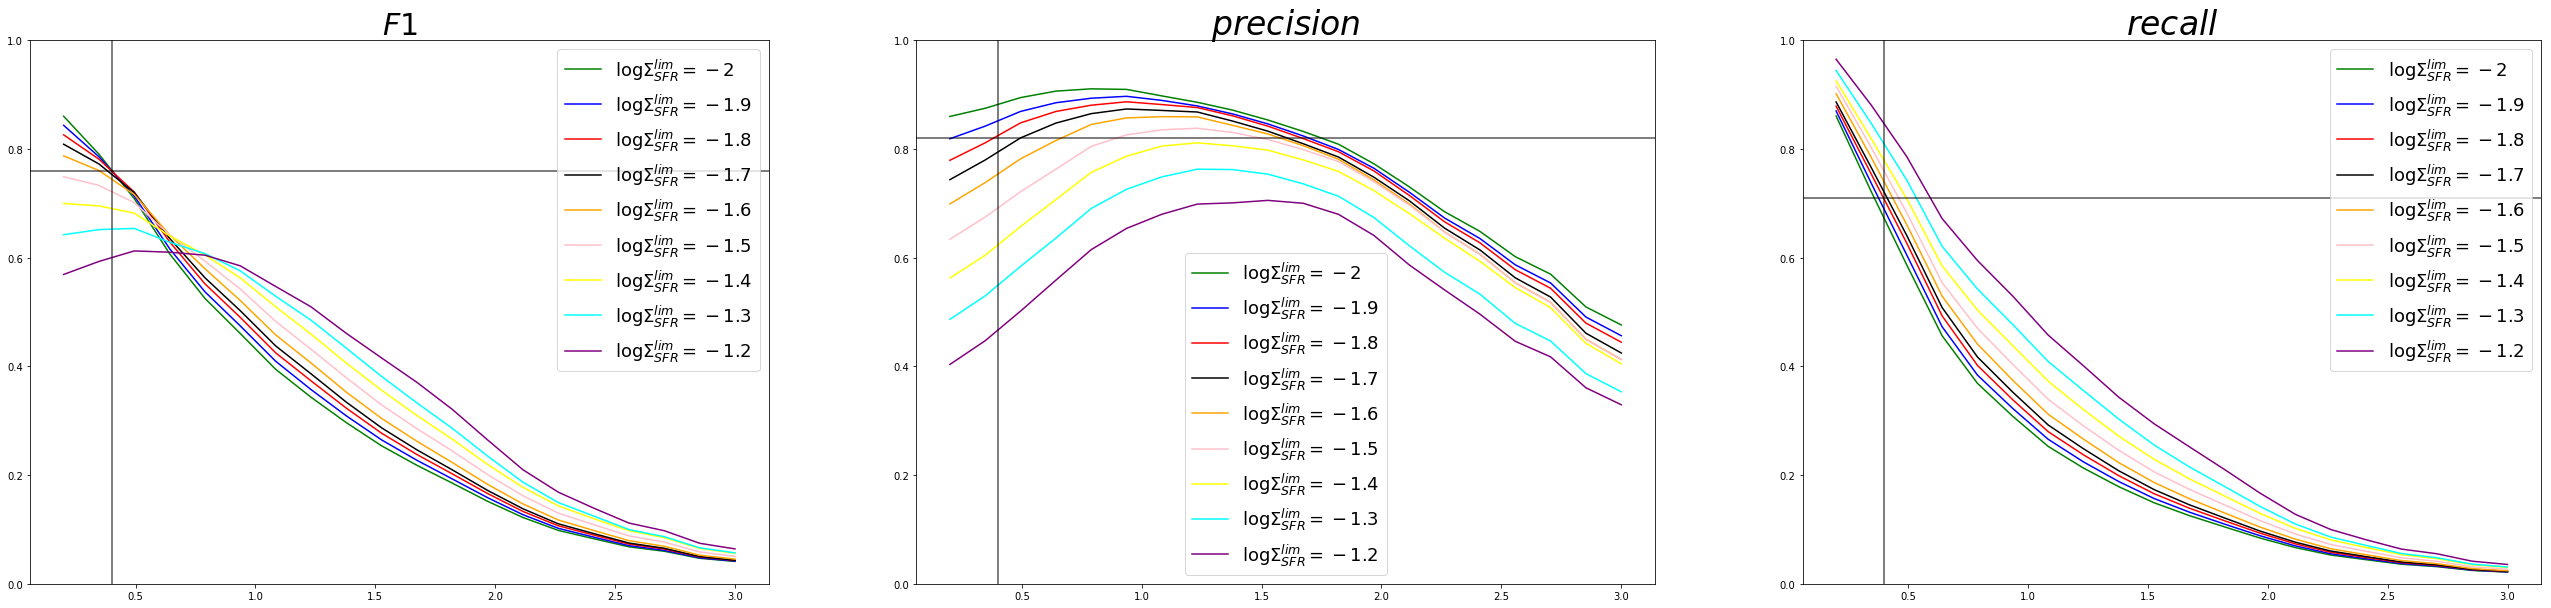

In [17]:
xx =np.array(np.linspace(0.2, 3., 20))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F1_shear[:,0],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-2$', color='green')
plt.plot(xx,F1_shear[:,1],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.9$', color='blue')
plt.plot(xx,F1_shear[:,2],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.8$', color='red')
plt.plot(xx,F1_shear[:,3],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.7$', color='black')
plt.plot(xx,F1_shear[:,4],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.6$', color='orange')
plt.plot(xx,F1_shear[:,5],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.5$', color='pink')
plt.plot(xx,F1_shear[:,6],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.4$', color='yellow')
plt.plot(xx,F1_shear[:,7],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.3$', color='aqua')
plt.plot(xx,F1_shear[:,8],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.2$', color='purple')
plt.ylim(0.,1.)
plt.title(r'$F1$', fontsize=30)
plt.axvline(x=0.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.76, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 18)
          
plt.subplot(1,3,2)
plt.plot(xx,precision_shear[:,0],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-2$', color='green')
plt.plot(xx,precision_shear[:,1],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.9$', color='blue')
plt.plot(xx,precision_shear[:,2],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.8$', color='red')
plt.plot(xx,precision_shear[:,3],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.7$', color='black')
plt.plot(xx,precision_shear[:,4],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.6$', color='orange')
plt.plot(xx,precision_shear[:,5],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.5$', color='pink')
plt.plot(xx,precision_shear[:,6],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.4$', color='yellow')
plt.plot(xx,precision_shear[:,7],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.3$', color='aqua')
plt.plot(xx,precision_shear[:,8],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.2$', color='purple')
plt.title(r'$precision$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=0.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.82, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 18)
          
plt.subplot(1,3,3)
plt.plot(xx,recall_shear[:,0],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-2$', color='green')
plt.plot(xx,recall_shear[:,1],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.9$', color='blue')
plt.plot(xx,recall_shear[:,2],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.8$', color='red')
plt.plot(xx,recall_shear[:,3],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.7$', color='black')
plt.plot(xx,recall_shear[:,4],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.6$', color='orange')
plt.plot(xx,recall_shear[:,5],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.5$', color='pink')
plt.plot(xx,recall_shear[:,6],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.4$', color='yellow')
plt.plot(xx,recall_shear[:,7],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.3$', color='aqua')
plt.plot(xx,recall_shear[:,8],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.2$', color='purple')
plt.title(r'$recall$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=0.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.71, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 18)

In [10]:
precision_shear_cut=np.zeros((20,9))
recall_shear_cut = np.zeros((20,9))
F1_shear_cut = np.zeros((20,9))

for i, alpha_A in enumerate(np.linspace(0.2, 3, 20)):
    for j, hlim in enumerate(np.linspace(-2., -1.1, 9)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if (k > 60): 
                    if (alpha_A*shear_method[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                        TP+=1
                    
                    if (alpha_A*shear_method[k][l] >= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                        FN+=1 
                    if (alpha_A*shear_method[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                        FP+=1
         
        precision_shear_cut[i][j] = TP/(TP + FP)
        recall_shear_cut[i][j] = TP/(TP + FN)
        F1_shear_cut[i][j] = 2*precision_shear_cut[i][j] * recall_shear_cut[i][j]/(precision_shear_cut[i][j] + recall_shear_cut[i][j])

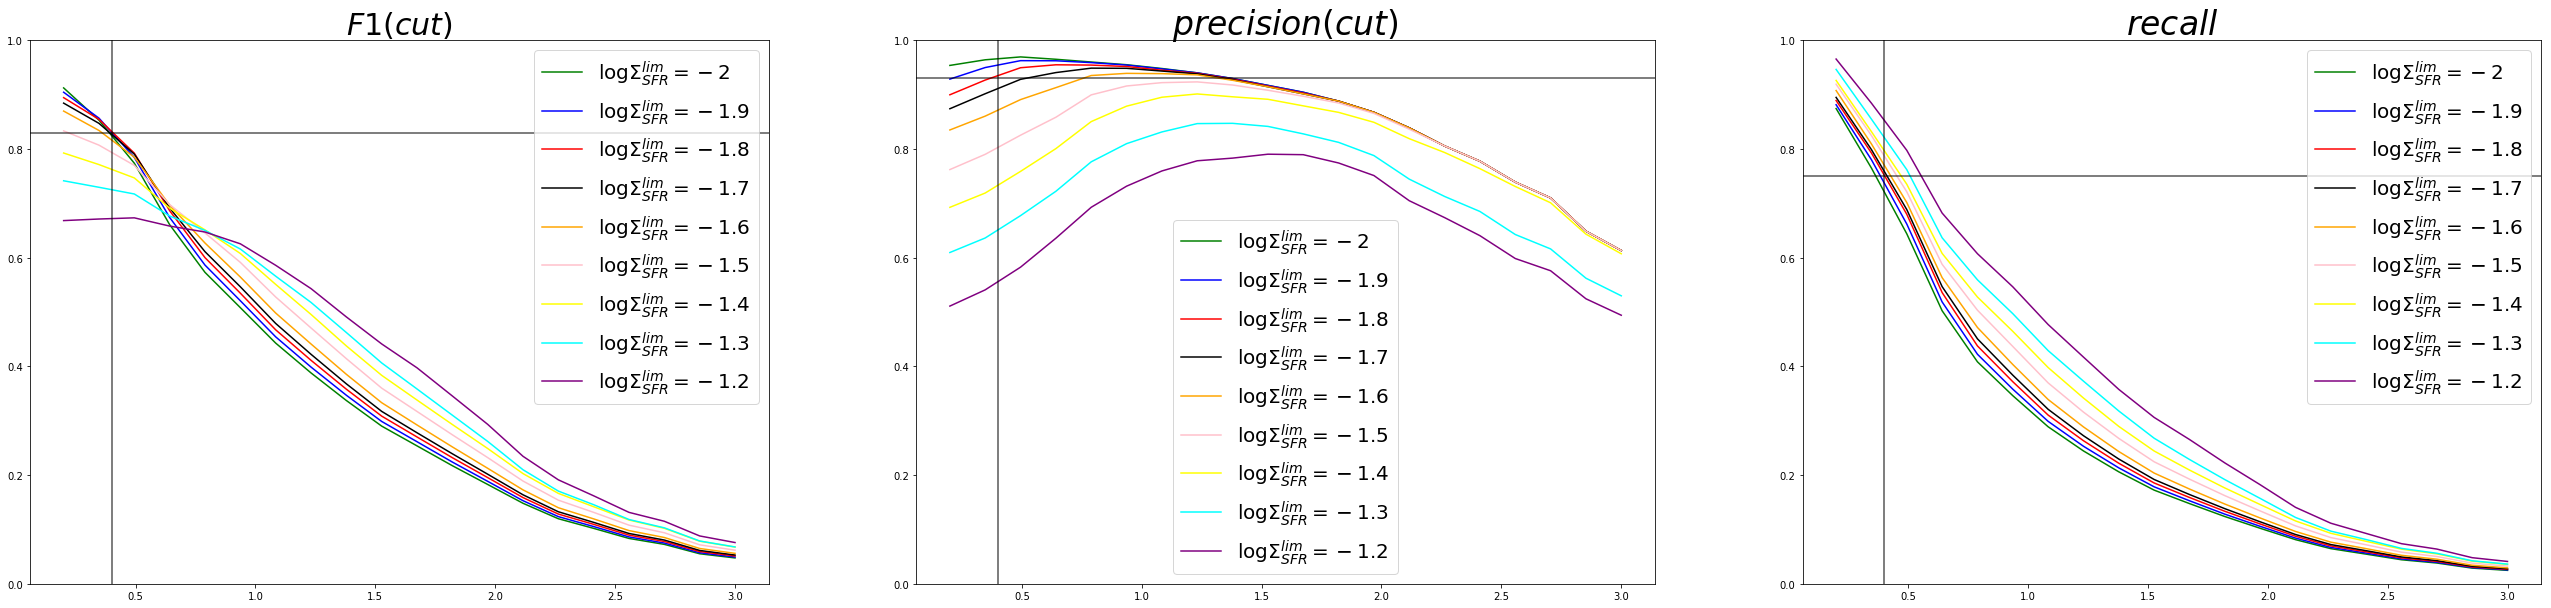

In [19]:
xx =np.array(np.linspace(0.2, 3., 20))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F1_shear_cut[:,0],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-2$', color='green')
plt.plot(xx,F1_shear_cut[:,1],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.9$', color='blue')
plt.plot(xx,F1_shear_cut[:,2],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.8$', color='red')
plt.plot(xx,F1_shear_cut[:,3],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.7$', color='black')
plt.plot(xx,F1_shear_cut[:,4],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.6$', color='orange')
plt.plot(xx,F1_shear_cut[:,5],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.5$', color='pink')
plt.plot(xx,F1_shear_cut[:,6],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.4$', color='yellow')
plt.plot(xx,F1_shear_cut[:,7],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.3$', color='aqua')
plt.plot(xx,F1_shear_cut[:,8],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.2$', color='purple')
plt.ylim(0.,1.)
plt.title(r'$F1(cut)$', fontsize=30)
plt.axvline(x=0.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.83, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision_shear_cut[:,0],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-2$', color='green')
plt.plot(xx,precision_shear_cut[:,1],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.9$', color='blue')
plt.plot(xx,precision_shear_cut[:,2],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.8$', color='red')
plt.plot(xx,precision_shear_cut[:,3],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.7$', color='black')
plt.plot(xx,precision_shear_cut[:,4],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.6$', color='orange')
plt.plot(xx,precision_shear_cut[:,5],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.5$', color='pink')
plt.plot(xx,precision_shear_cut[:,6],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.4$', color='yellow')
plt.plot(xx,precision_shear_cut[:,7],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.3$', color='aqua')
plt.plot(xx,precision_shear_cut[:,8],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.2$', color='purple')
plt.title(r'$precision(cut)$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=0.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.93, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall_shear_cut[:,0],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-2$', color='green')
plt.plot(xx,recall_shear_cut[:,1],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.9$', color='blue')
plt.plot(xx,recall_shear_cut[:,2],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.8$', color='red')
plt.plot(xx,recall_shear_cut[:,3],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.7$', color='black')
plt.plot(xx,recall_shear_cut[:,4],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.6$', color='orange')
plt.plot(xx,recall_shear_cut[:,5],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.5$', color='pink')
plt.plot(xx,recall_shear_cut[:,6],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.4$', color='yellow')
plt.plot(xx,recall_shear_cut[:,7],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.3$', color='aqua')
plt.plot(xx,recall_shear_cut[:,8],'-', label=r'$\log{\Sigma_{SFR}^{lim}}=-1.2$', color='purple')
plt.title(r'$recall$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=0.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.75, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)

In [39]:
Inst_field = np.zeros(dist_kpc.shape)
inst_count_shear = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0 < 0.4*shear_method[i][j] <= 1.):
            Inst_field[i][j] = 2
            inst_count_shear+=1
        elif(0.4*shear_method[i][j] <= 0.):
            Inst_field[i][j] = 0
        elif(1 < 0.4*shear_method[i][j]):
            Inst_field[i][j] = 1           
            
print(inst_count_shear)


4997


Text(0.5, 1.0, '$\\log{\\Sigma_{SFR}^{lim}}$, $\\alpha_A = (-1.8, 0.4)$')

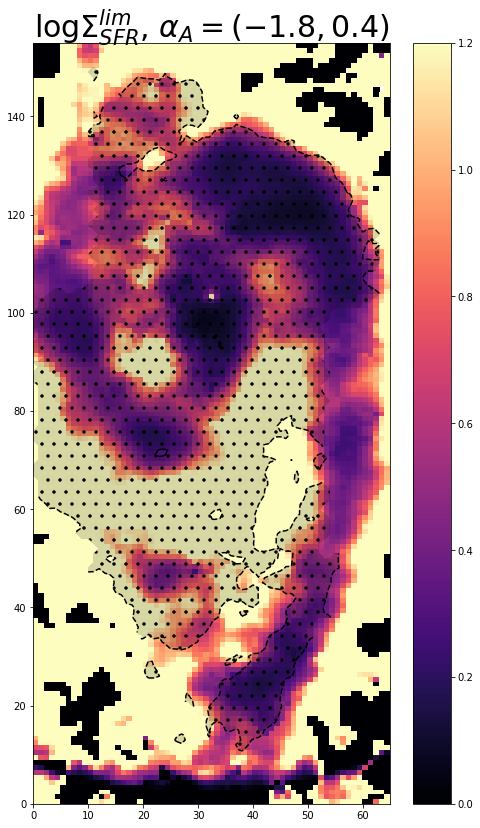

In [14]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[8,14])
quadmesh = plt.pcolormesh(X, Y, 0.4*shear_method, cmap='magma')
quadmesh.set_clim(vmin=0, vmax = 1.2)
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1.8,0.5], colors=('none'), hatches=['.'], alpha=0.15)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.8,0.5], aspect='auto', alpha=1, colors='black')
plt.title(r'$\log{\Sigma_{SFR}^{lim}}$, $\alpha_A = (-1.8, 0.4)$', fontsize=30)

## cold phase

In [54]:
precision=[]
recall = []
F1 = []
for i, hlim in enumerate(np.linspace(-3., 0.5, 60)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (cold_phase[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                TP+=1
                    
            if (cold_phase[k][l] > 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                FN+=1 
            if (cold_phase[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                FP+=1
         
    precision.append(TP/(TP + FP))
    recall.append(TP/(TP + FN))
    F1.append(2*precision[i] * recall[i]/(precision[i] + recall[i]))
    
    
cold_phase_const = np.load('./data/cold_phase_const.npy')

precision_const=[]
recall_const = []
F1_const = []
for i, hlim in enumerate(np.linspace(-3., 0.5, 60)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (cold_phase_const[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                TP+=1
                    
            if (cold_phase_const[k][l] > 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                FN+=1 
            if (cold_phase_const[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                FP+=1
         
    precision_const.append(TP/(TP + FP))
    recall_const.append(TP/(TP + FN))
    F1_const.append(2*precision_const[i] * recall_const[i]/(precision_const[i] + recall_const[i]))    

In [55]:
precision_cut=[]
recall_cut = []
F1_cut = []
for i, hlim in enumerate(np.linspace(-3., 0.5, 60)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if(k>60):
                
                if (cold_phase[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (cold_phase[k][l] > 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (cold_phase[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
    precision_cut.append(TP/(TP + FP))
    recall_cut.append(TP/(TP + FN))
    F1_cut.append(2*precision_cut[i] * recall_cut[i]/(precision_cut[i] + recall_cut[i]))
    
    
cold_phase_const = np.load('./data/cold_phase_const.npy')

precision_const_cut=[]
recall_const_cut = []
F1_const_cut = []
for i, hlim in enumerate(np.linspace(-3., 0.5, 60)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if(k>60):
                if (cold_phase_const[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (cold_phase_const[k][l] > 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (cold_phase_const[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
    precision_const_cut.append(TP/(TP + FP))
    recall_const_cut.append(TP/(TP + FN))
    F1_const_cut.append(2*precision_const_cut[i] * recall_const_cut[i]/(precision_const_cut[i] + recall_const_cut[i])) 

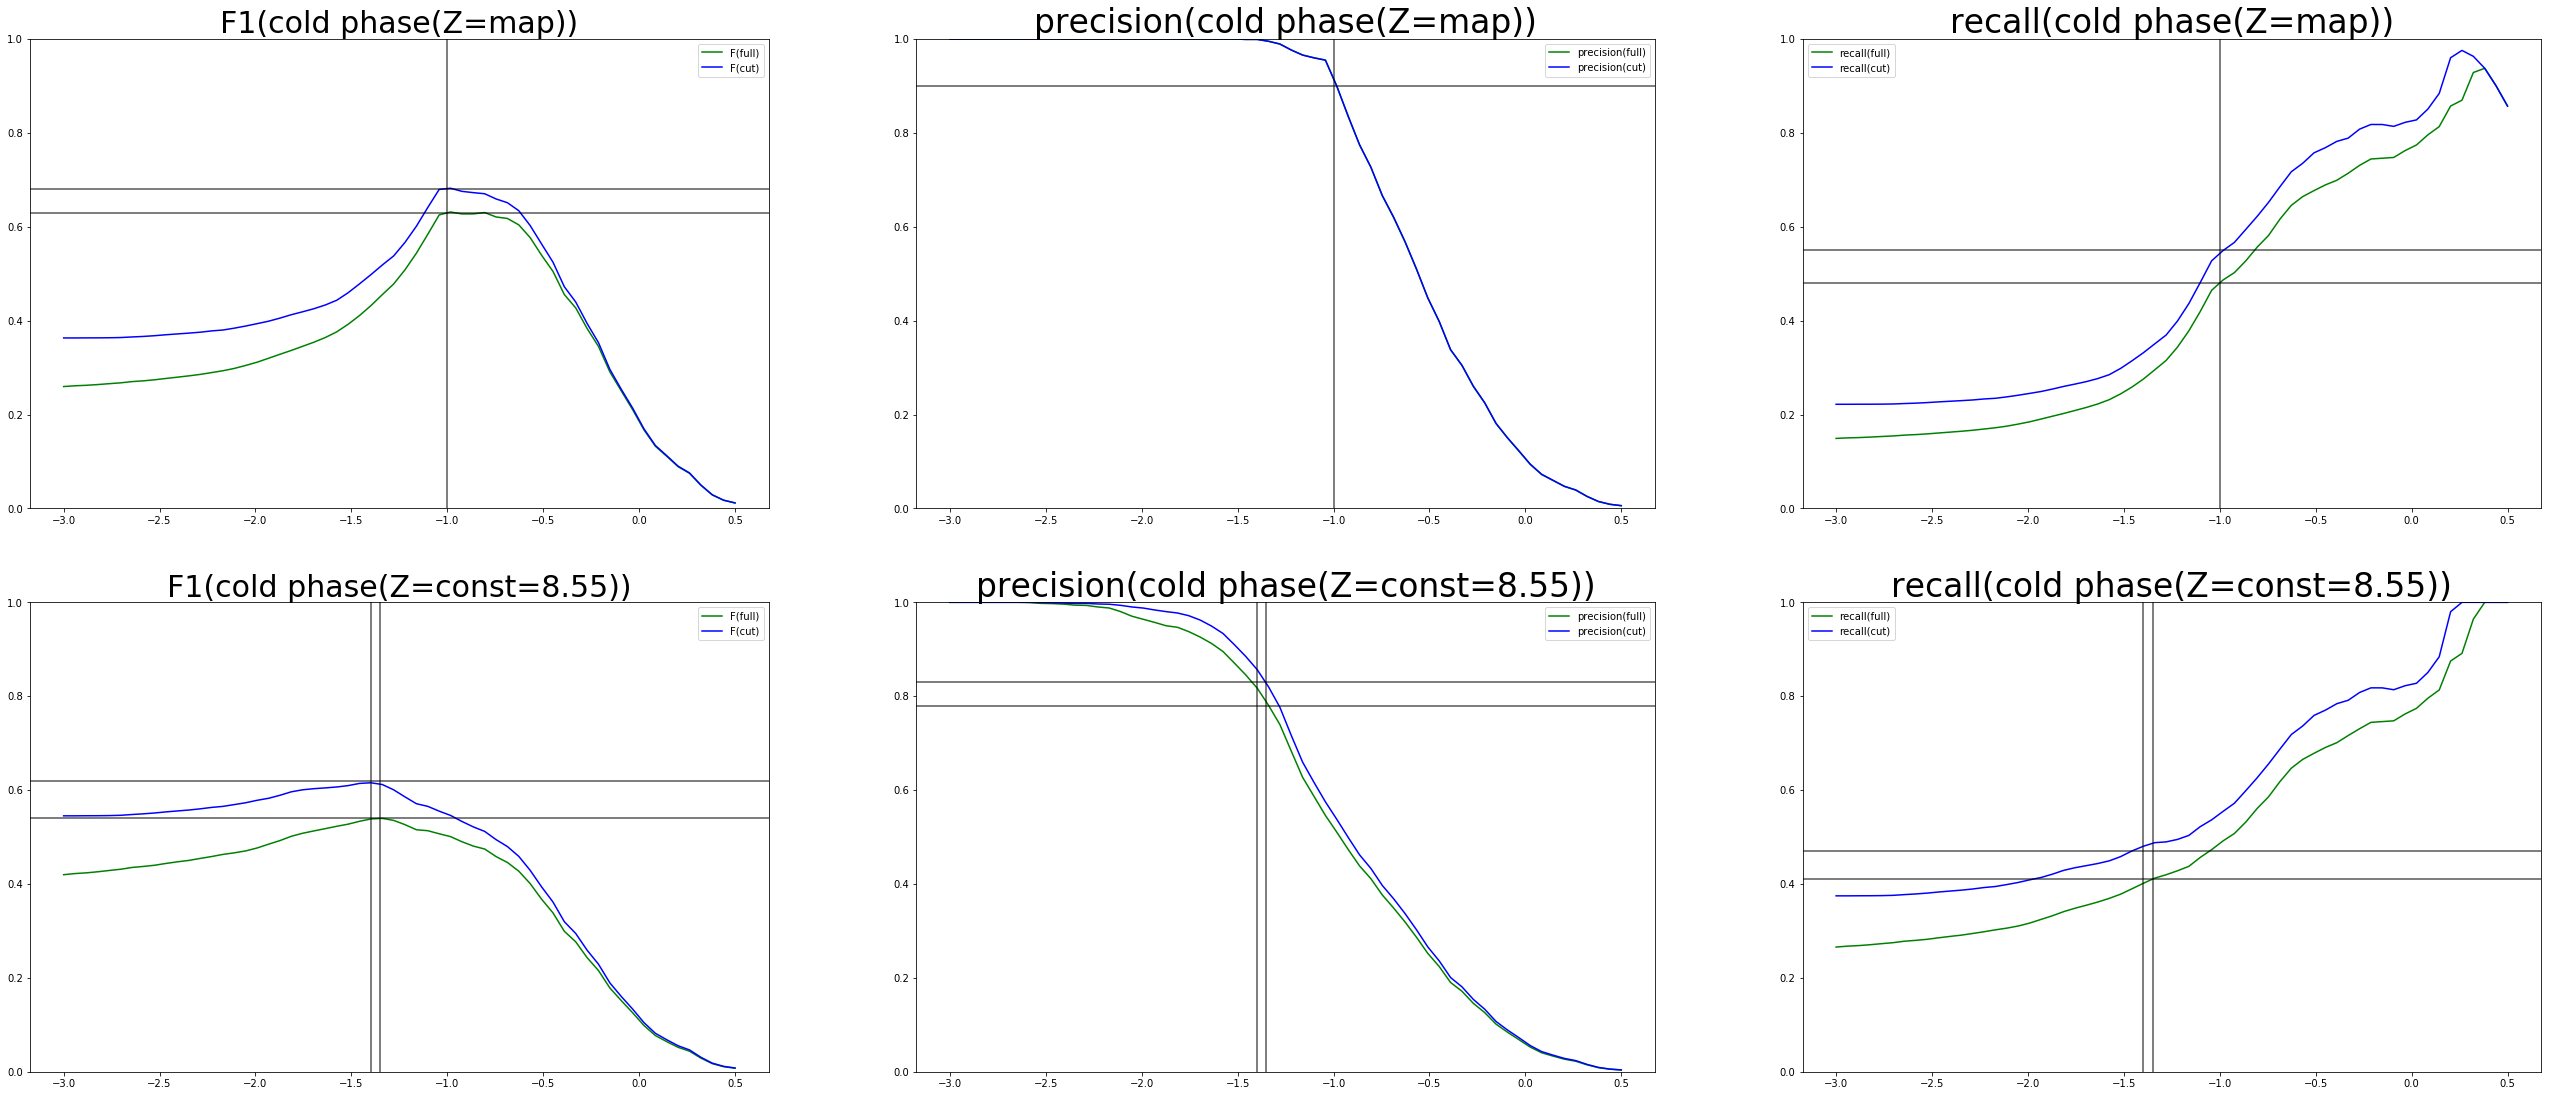

In [56]:
xx =np.array(np.linspace(-3., 0.5, 60))
fig = plt.figure(figsize=[45, 19])

plt.subplot(2,3,1)
plt.plot(xx,F1,'-', label='F(full)', color='green')
plt.plot(xx,F1_cut,'-', label='F(cut)', color='blue')
plt.ylim(0.,1.)
plt.title('F1(cold phase(Z=map))', fontsize=30)
plt.axvline(x=-1., alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.63, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.68, alpha=0.5, color='black', lw=2)
plt.legend()
          
plt.subplot(2,3,2)
plt.plot(xx,precision,'-', label='precision(full)', color='green')
plt.plot(xx,precision_cut,'-', label='precision(cut)', color='blue')
plt.title('precision(cold phase(Z=map))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-1., alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.9, alpha=0.5, color='black', lw=2)
plt.legend()

plt.subplot(2,3,3)
plt.plot(xx,recall,'-', label='recall(full)', color='green')
plt.plot(xx,recall_cut,'-', label='recall(cut)', color='blue')
plt.title('recall(cold phase(Z=map))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-1., alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.48, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.55, alpha=0.5, color='black', lw=2)
plt.legend()

plt.subplot(2,3,4)
plt.plot(xx,F1_const,'-', label='F(full)', color='green')
plt.plot(xx,F1_const_cut,'-', label='F(cut)', color='blue')
plt.ylim(0.,1.)
plt.title('F1(cold phase(Z=const=8.55))', fontsize=30)
plt.axvline(x=-1.35, alpha=0.5, color='black', lw=2)
plt.axvline(x=-1.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.54, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.62, alpha=0.5, color='black', lw=2)
plt.legend()
          
plt.subplot(2,3,5)
plt.plot(xx,precision_const,'-', label='precision(full)', color='green')
plt.plot(xx,precision_const_cut,'-', label='precision(cut)', color='blue')
plt.title('precision(cold phase(Z=const=8.55))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-1.35, alpha=0.5, color='black', lw=2)
plt.axvline(x=-1.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.78, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.83, alpha=0.5, color='black', lw=2)
plt.legend()
          
plt.subplot(2,3,6)
plt.plot(xx,recall_const,'-', label='recall(full)', color='green')
plt.plot(xx,recall_const_cut,'-', label='recall(cut)', color='blue')
plt.title('recall(cold phase(Z=const=8.55))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-1.35, alpha=0.5, color='black', lw=2)
plt.axvline(x=-1.4, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.41, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.47, alpha=0.5, color='black', lw=2)
plt.legend()

Text(0.5, 1.0, 'cold_phase(Z = const = 8.5)')

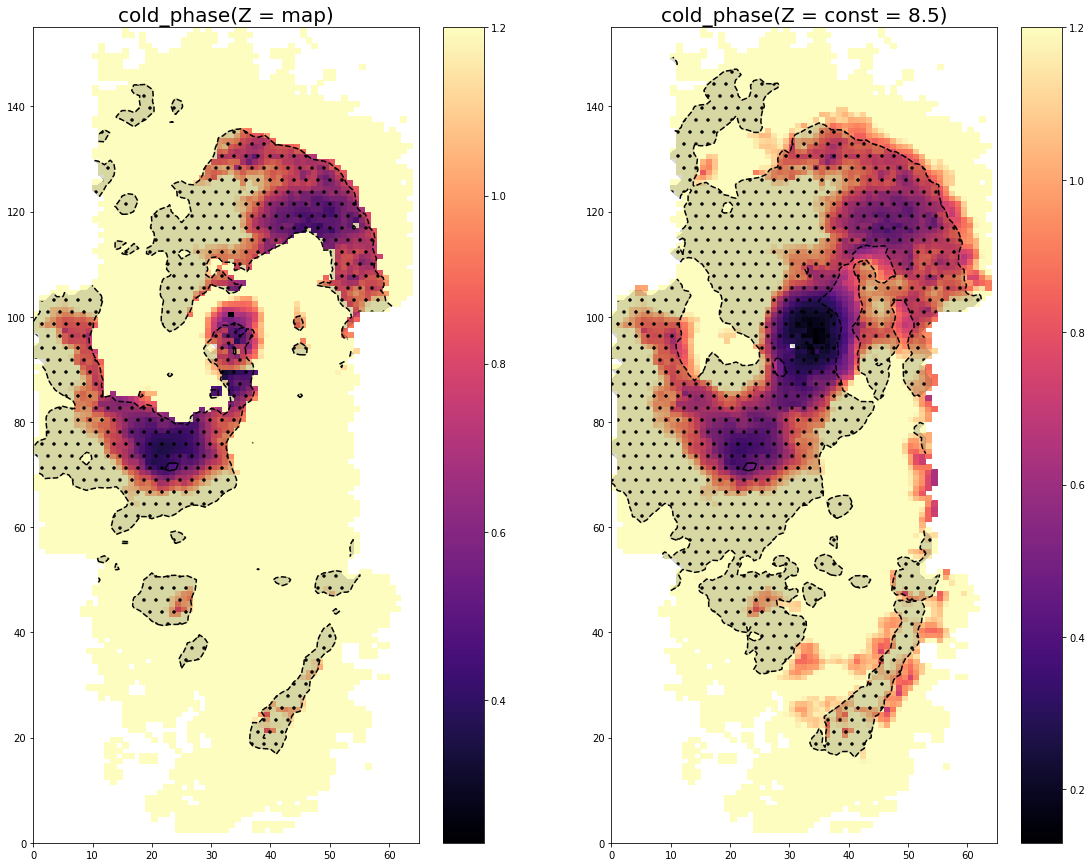

In [57]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[19,15])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='magma')
quadmesh.set_clim( vmax = 1.2)
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1,0.5], colors=('none'), hatches=['.'], alpha=0.15)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1,0.5], aspect='auto', alpha=1, colors='black')
plt.title('cold_phase(Z = map)', fontsize = 20)

plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(X, Y, cold_phase_const, cmap='magma')
quadmesh.set_clim( vmax = 1.2)
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1.35,0.5], colors=('none'), hatches=['.'], alpha=0.15)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.35,0.5], aspect='auto', alpha=1, colors='black')
plt.title('cold_phase(Z = const = 8.5)', fontsize = 20)

### Теперь будем варьировать показатель металличности в случае, когда мы берём его константой

In [38]:
cold_phase_const = np.zeros(dist_kpc.shape)
I = np.zeros(dist_kpc.shape)
I = Sigma_SFR * 5. * 10**10
Z_sun = 0.012
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase_const[i][j] = Sigma_SO / Sigma_gas # * np.power(Z/Z_sun/0.1, -0.3,dtype = np.float)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


In [39]:
precision_cold=np.zeros((20,20))
recall_cold = np.zeros((20,20))
F1_cold = np.zeros((20,20))

for i, Z in enumerate(np.linspace(8., 10, 20)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 20)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (np.power(Z/Z_sun/0.1, -0.3,dtype = np.float)*cold_phase_const[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (np.power(Z/Z_sun/0.1, -0.3,dtype = np.float)*cold_phase_const[k][l] >= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (np.power(Z/Z_sun/0.1, -0.3,dtype = np.float)*cold_phase_const[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
        precision_cold[i][j] = TP/(TP + FP)
        recall_cold[i][j] = TP/(TP + FN)
        F1_cold[i][j] = 2*precision_cold[i][j] * recall_cold[i][j]/(precision_cold[i][j] + recall_cold[i][j])

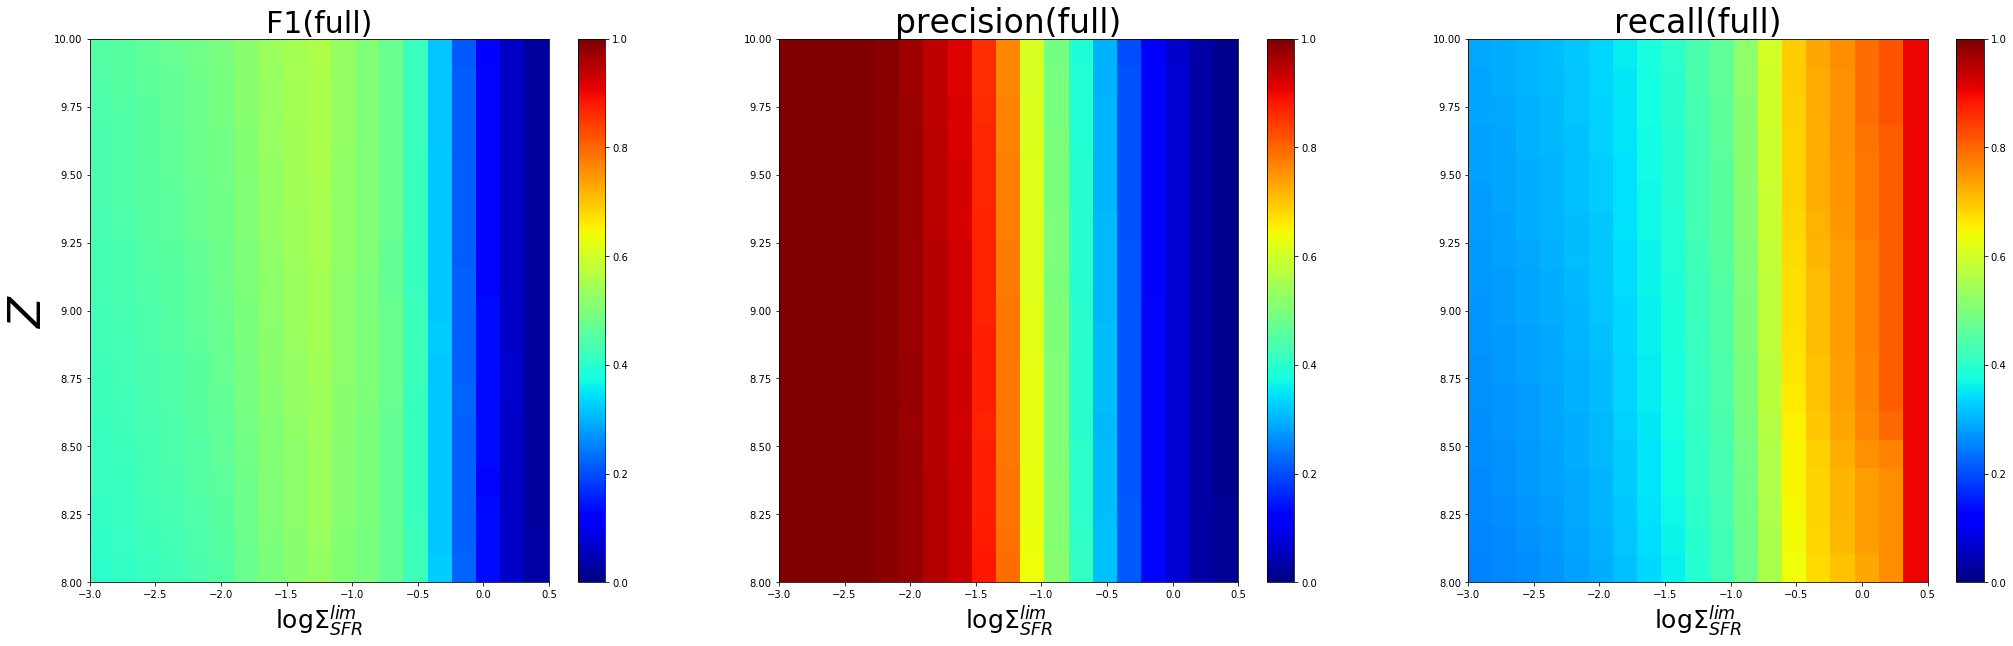

In [41]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 20), np.linspace(8., 10., 20))
fig = plt.figure(figsize=[35, 10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_cold, cmap='jet')
plt.title('F1(full)', fontsize=30)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$Z$', fontsize = 45)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_cold, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('precision(full)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_cold, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('recall(full)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()

In [42]:
precision_cold_cut=np.zeros((20,20))
recall_cold_cut = np.zeros((20,20))
F1_cold_cut = np.zeros((20,20))

for i, Z in enumerate(np.linspace(8., 10., 20)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 20)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if(k>60):    
                    if (np.power(Z/Z_sun/0.1, -0.3,dtype = np.float)*cold_phase_const[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                        TP+=1
                    
                    if (np.power(Z/Z_sun/0.1, -0.3,dtype = np.float)*cold_phase_const[k][l] >= 1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                        FN+=1 
                    if (np.power(Z/Z_sun/0.1, -0.3,dtype = np.float)*cold_phase_const[k][l] <= 1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                        FP+=1
         
        precision_cold_cut[i][j] = TP/(TP + FP)
        recall_cold_cut[i][j] = TP/(TP + FN)
        F1_cold_cut[i][j] = 2*precision_cold_cut[i][j] * recall_cold_cut[i][j]/(precision_cold_cut[i][j] + recall_cold_cut[i][j])

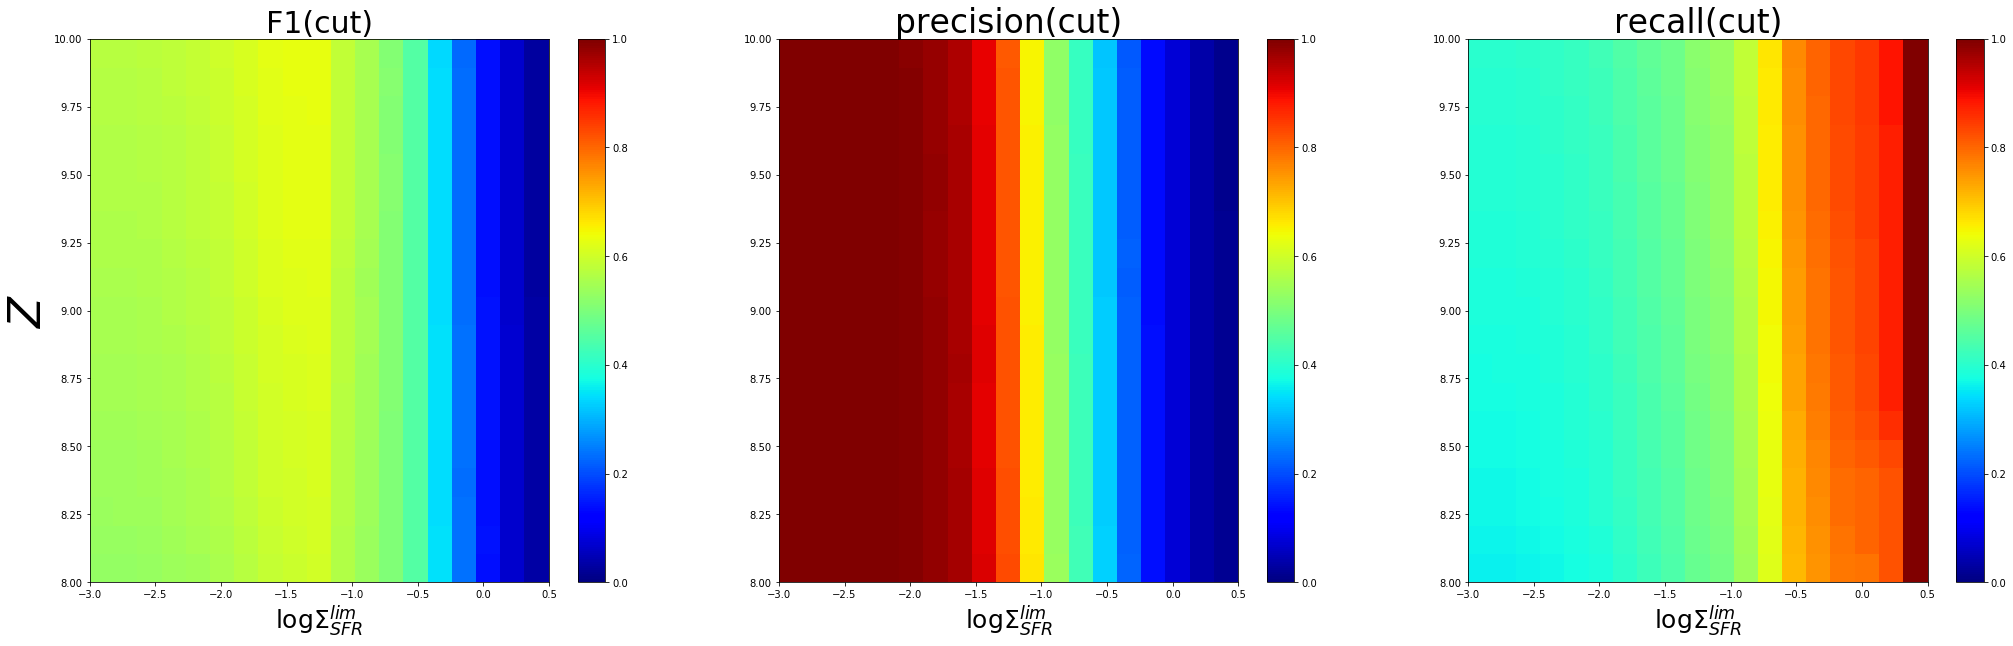

In [43]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 20), np.linspace(8., 10, 20))
fig = plt.figure(figsize=[35, 10])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_cold_cut, cmap='jet')
plt.title('F1(cut)', fontsize=30)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$Z$', fontsize = 45)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_cold_cut, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('precision(cut)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_cold_cut, cmap='jet')
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.title('recall(cut)', fontsize=33)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()

### Найдём наилучшее соответствие для такого критерия: неустойчиво там, где $\Sigma_{HI} > a > 5 M_{\odot}/kpc^2 $ (подберём a)

In [44]:
precision=np.zeros((20,20))
recall = np.zeros((20,20))
F1 = np.zeros((20,20))

for i, slim in enumerate(np.linspace(1., 8., 20)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 20)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Sigma_HI[k][l] >= slim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (Sigma_HI[k][l] <= slim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (Sigma_HI[k][l] >= slim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
        precision[i][j] = TP/(TP + FP)
        recall[i][j] = TP/(TP + FN)
        F1[i][j] = 2*precision[i][j] * recall[i][j]/(precision[i][j] + recall[i][j])

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


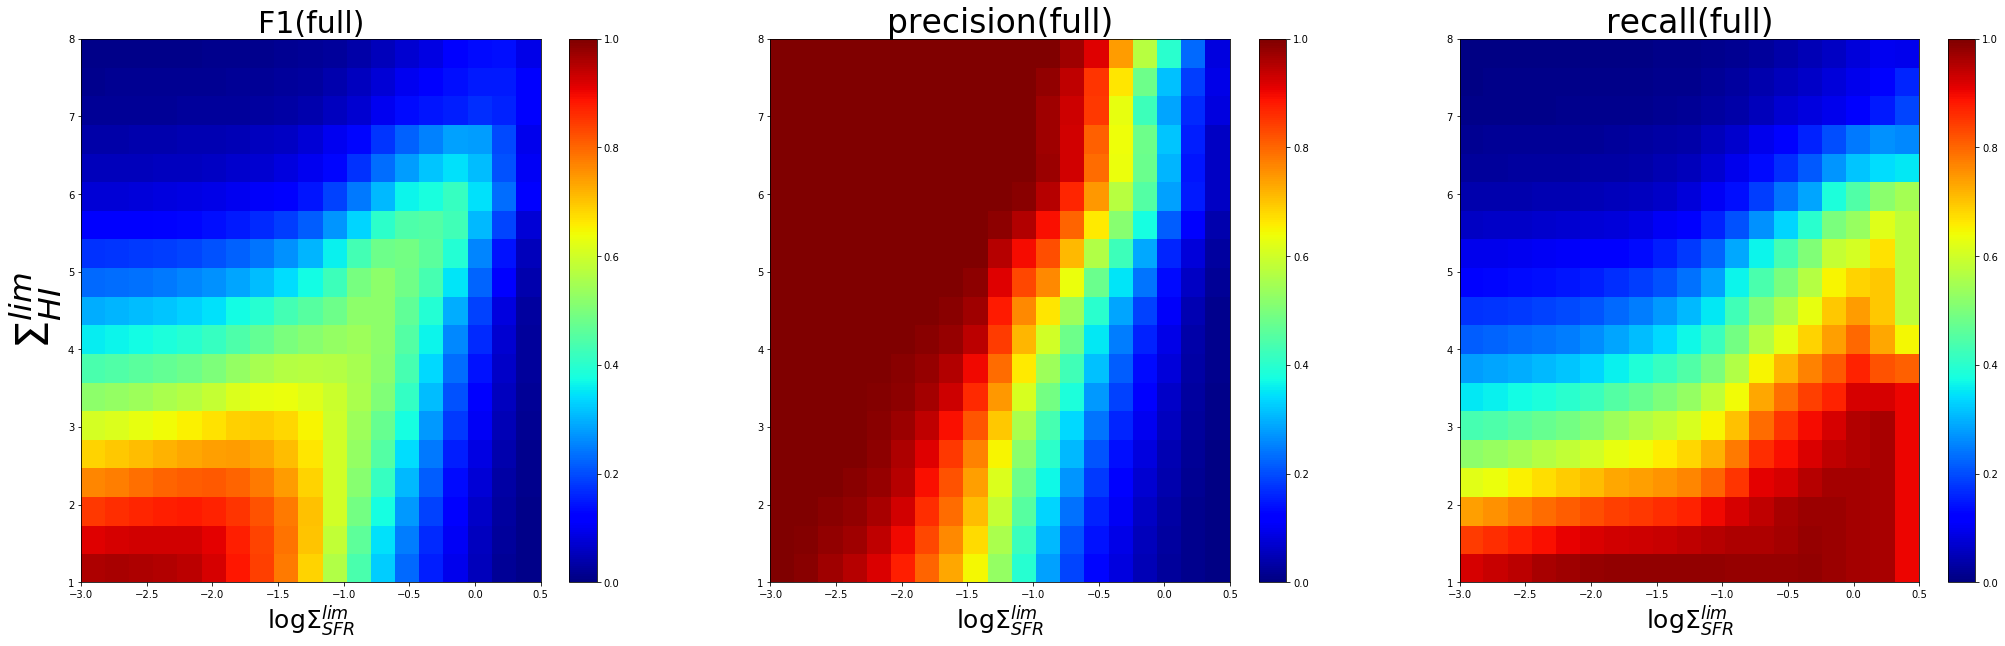

In [45]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 20), np.linspace(1., 8., 20))
fig = plt.figure(figsize=[35, 10])

plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1, cmap='jet')
plt.title('F1(full)', fontsize=30)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$\Sigma_{HI}^{lim}$', fontsize = 45)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision, cmap='jet')
plt.title('precision(full)', fontsize=33)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall, cmap='jet')
plt.title('recall(full)', fontsize=33)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()  

In [46]:
precision_cut=np.zeros((20,20))
recall_cut = np.zeros((20,20))
F1_cut = np.zeros((20,20))

for i, slim in enumerate(np.linspace(1., 8., 20)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 20)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                 if(k>60):
                    if (Sigma_HI[k][l] >= slim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                        TP+=1
                    
                    if (Sigma_HI[k][l] <= slim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                        FN+=1 
                    if (Sigma_HI[k][l] >= slim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                        FP+=1
         
        precision_cut[i][j] = TP/(TP + FP)
        recall_cut[i][j] = TP/(TP + FN)
        F1_cut[i][j] = 2*precision_cut[i][j] * recall_cut[i][j]/(precision_cut[i][j] + recall_cut[i][j])

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


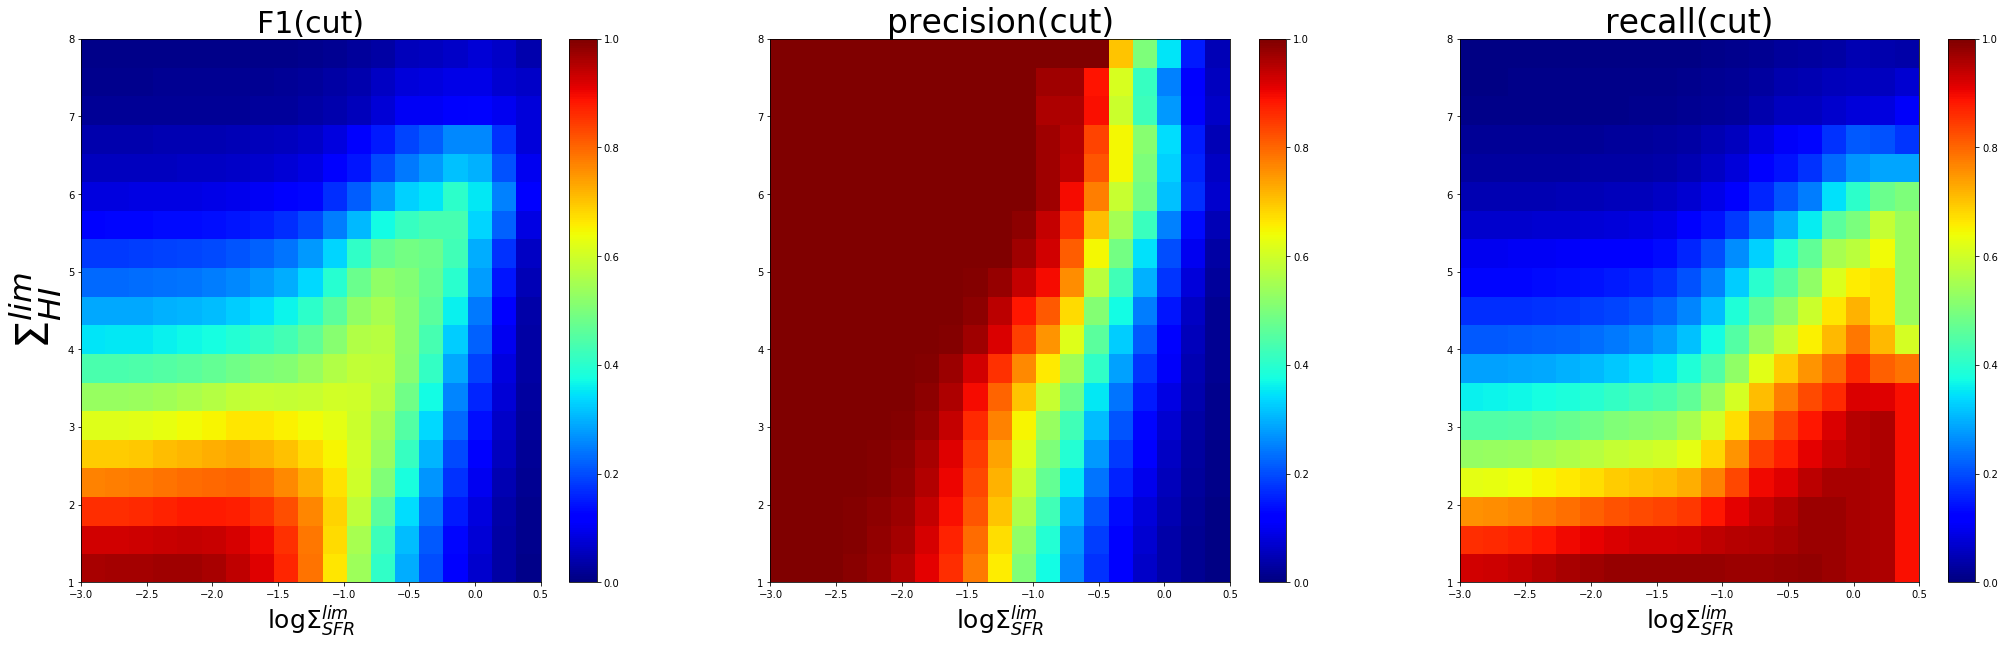

In [47]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 20), np.linspace(1., 8., 20))
fig = plt.figure(figsize=[35, 10])

plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_cut, cmap='jet')
plt.title('F1(cut)', fontsize=30)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$\Sigma_{HI}^{lim}$', fontsize = 45)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_cut, cmap='jet')
plt.title('precision(cut)', fontsize=33)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_cut, cmap='jet')
plt.title('recall(cut)', fontsize=33)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()  

In [68]:
precision1 = []
precision2 = []
recall1 = []
recall2 = []
F1 = []
F2 = []
    
slim1 = 5.
slim2 = 5.
    
for i, hlim in enumerate(np.linspace(-3., 0., 20)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (Sigma_HI[k][l] >= slim1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                TP+=1
                    
            if (Sigma_HI[k][l] <= slim1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                FN+=1 
            if (Sigma_HI[k][l] >= slim1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                FP+=1
         
    precision1.append(TP/(TP + FP))
    recall1.append(TP/(TP + FN))
    F1.append(2*precision1[i] * recall1[i]/(precision1[i] + recall1[i]))

for i, hlim in enumerate(np.linspace(-3., 0., 20)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if(k>60):    
                if (Sigma_HI[k][l] >= slim2) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (Sigma_HI[k][l] <= slim2) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (Sigma_HI[k][l] >= slim2) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
    precision2.append(TP/(TP + FP))
    recall2.append(TP/(TP + FN))
    F2.append(2*precision2[i] * recall2[i]/(precision2[i] + recall2[i]))    

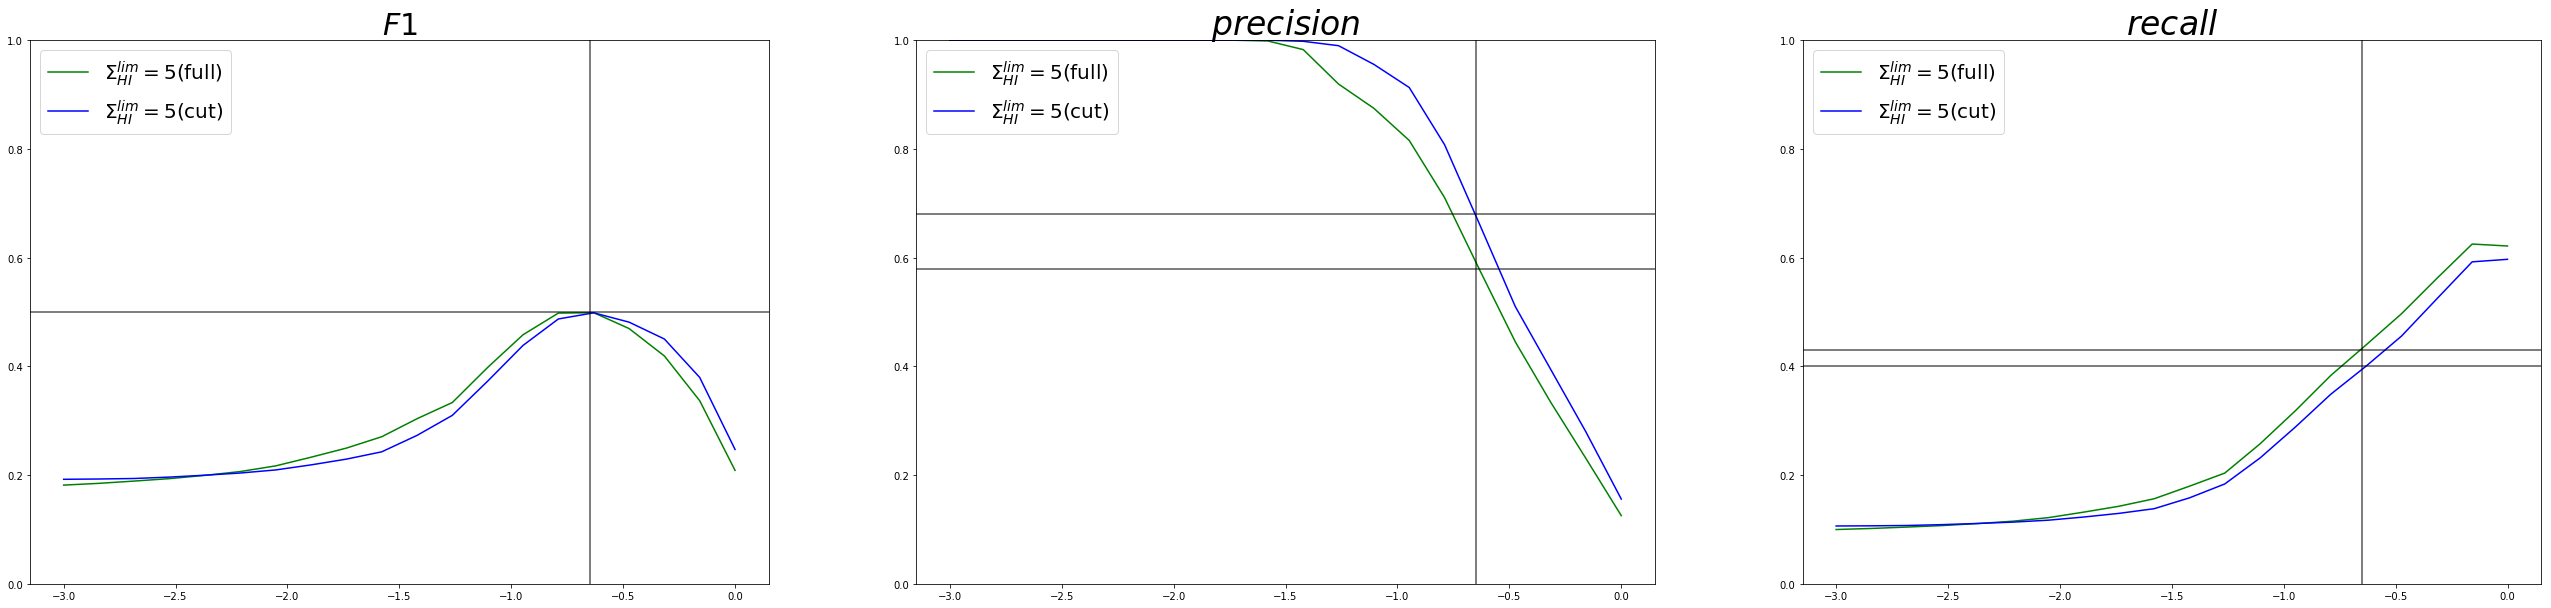

In [76]:
xx =np.array(np.linspace(-3., 0., 20))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F1,'-', label=r'$\Sigma_{HI}^{lim} = 5$(full)', color='green')
plt.plot(xx,F2,'-', label=r'$\Sigma_{HI}^{lim} = 5$(cut)', color='blue')
plt.title(r'$F1$', fontsize=30)
plt.ylim(0.,1.)
plt.axvline(x=-0.65, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.5, alpha=0.5, color='black', lw=2)

plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision1,'-',label=r'$\Sigma_{HI}^{lim} = 5$(full)', color='green')
plt.plot(xx,precision2,'-', label=r'$\Sigma_{HI}^{lim} = 5$(cut)', color='blue')
plt.title(r'$precision$', fontsize=33)
plt.axvline(x=-0.65, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.68, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.58, alpha=0.5, color='black', lw=2)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall1,'-', label=r'$\Sigma_{HI}^{lim} = 5$(full)', color='green')
plt.plot(xx,recall2,'-', label=r'$\Sigma_{HI}^{lim} = 5$(cut)', color='blue')
plt.title(r'$recall$', fontsize=33)
plt.axvline(x=-0.65, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.4, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.43, alpha=0.5, color='black', lw=2)
plt.ylim(0.,1.)
plt.legend(fontsize = 20) 

### Найдём наилучшее соответствие для такого критерия: неустойчиво там, где $\Sigma_{H2} > \Sigma_{H2}^{crit} $ 

In [48]:
precision=np.zeros((20,20))
recall = np.zeros((20,20))
F1 = np.zeros((20,20))

for i, slim in enumerate(np.linspace(5.,60., 20)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 20)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (Sigma_H2[k][l] >= slim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (Sigma_H2[k][l] <= slim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (Sigma_H2[k][l] >= slim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
        precision[i][j] = TP/(TP + FP)
        recall[i][j] = TP/(TP + FN)
        F1[i][j] = 2*precision[i][j] * recall[i][j]/(precision[i][j] + recall[i][j])

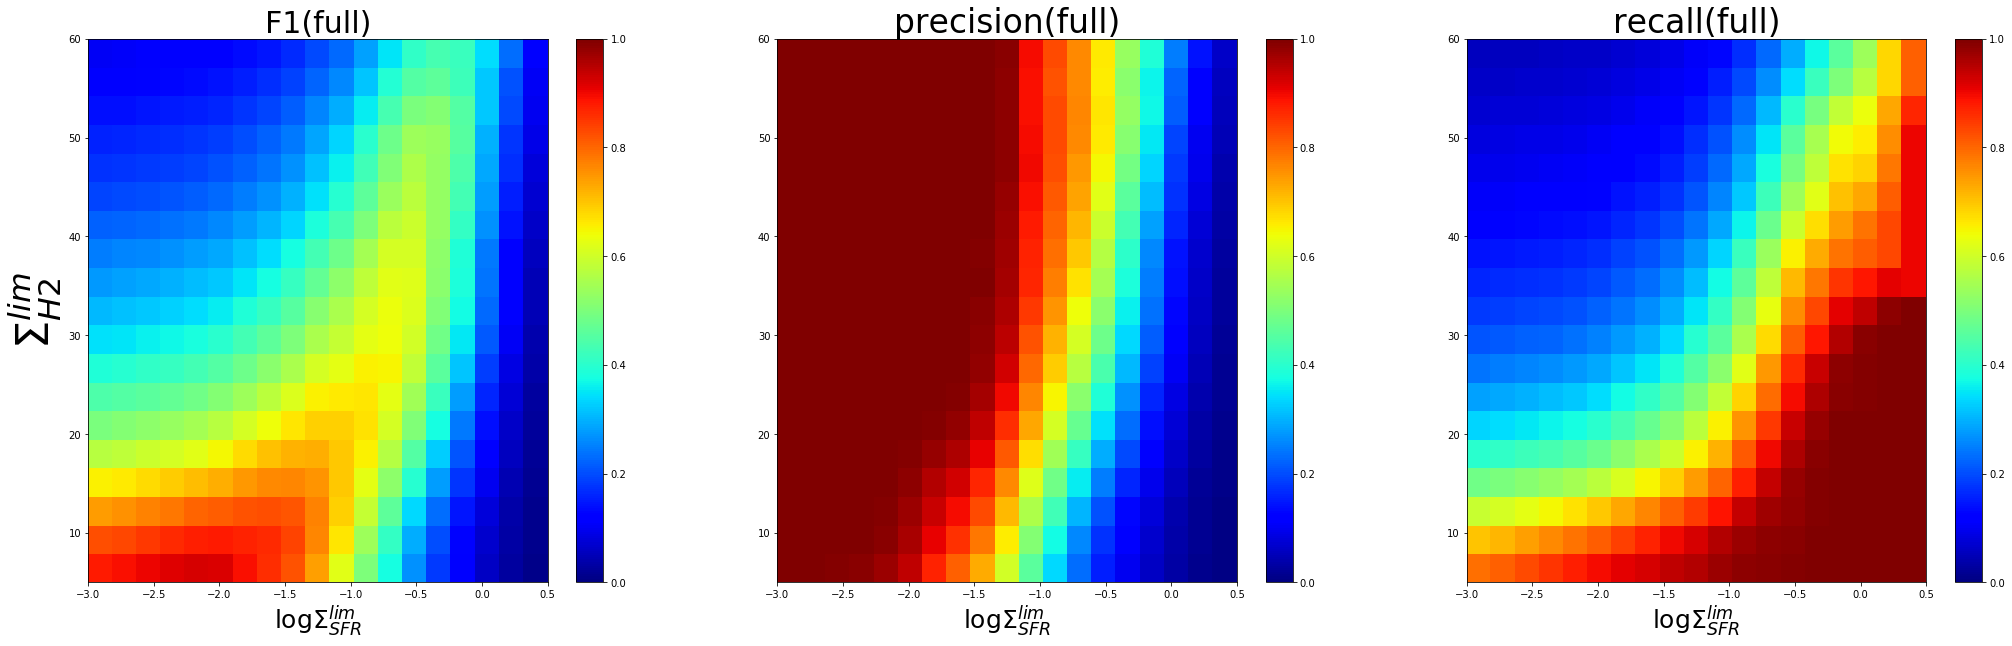

In [49]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 20), np.linspace(5.,60., 20))
fig = plt.figure(figsize=[35, 10])

plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1, cmap='jet')
plt.title('F1(full)', fontsize=30)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$\Sigma_{H2}^{lim}$', fontsize = 45)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision, cmap='jet')
plt.title('precision(full)', fontsize=33)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall, cmap='jet')
plt.title('recall(full)', fontsize=33)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()  

In [50]:
precision_cut=np.zeros((20,20))
recall_cut = np.zeros((20,20))
F1_cut = np.zeros((20,20))

for i, slim in enumerate(np.linspace(5.,60., 20)):
    for j, hlim in enumerate(np.linspace(-3., 0.5, 20)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                if(k>60):
                    if (Sigma_H2[k][l] >= slim) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                        TP+=1
                    
                    if (Sigma_H2[k][l] <= slim) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                        FN+=1 
                    if (Sigma_H2[k][l] >= slim) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                        FP+=1
         
        precision_cut[i][j] = TP/(TP + FP)
        recall_cut[i][j] = TP/(TP + FN)
        F1_cut[i][j] = 2*precision_cut[i][j] * recall_cut[i][j]/(precision_cut[i][j] + recall_cut[i][j])

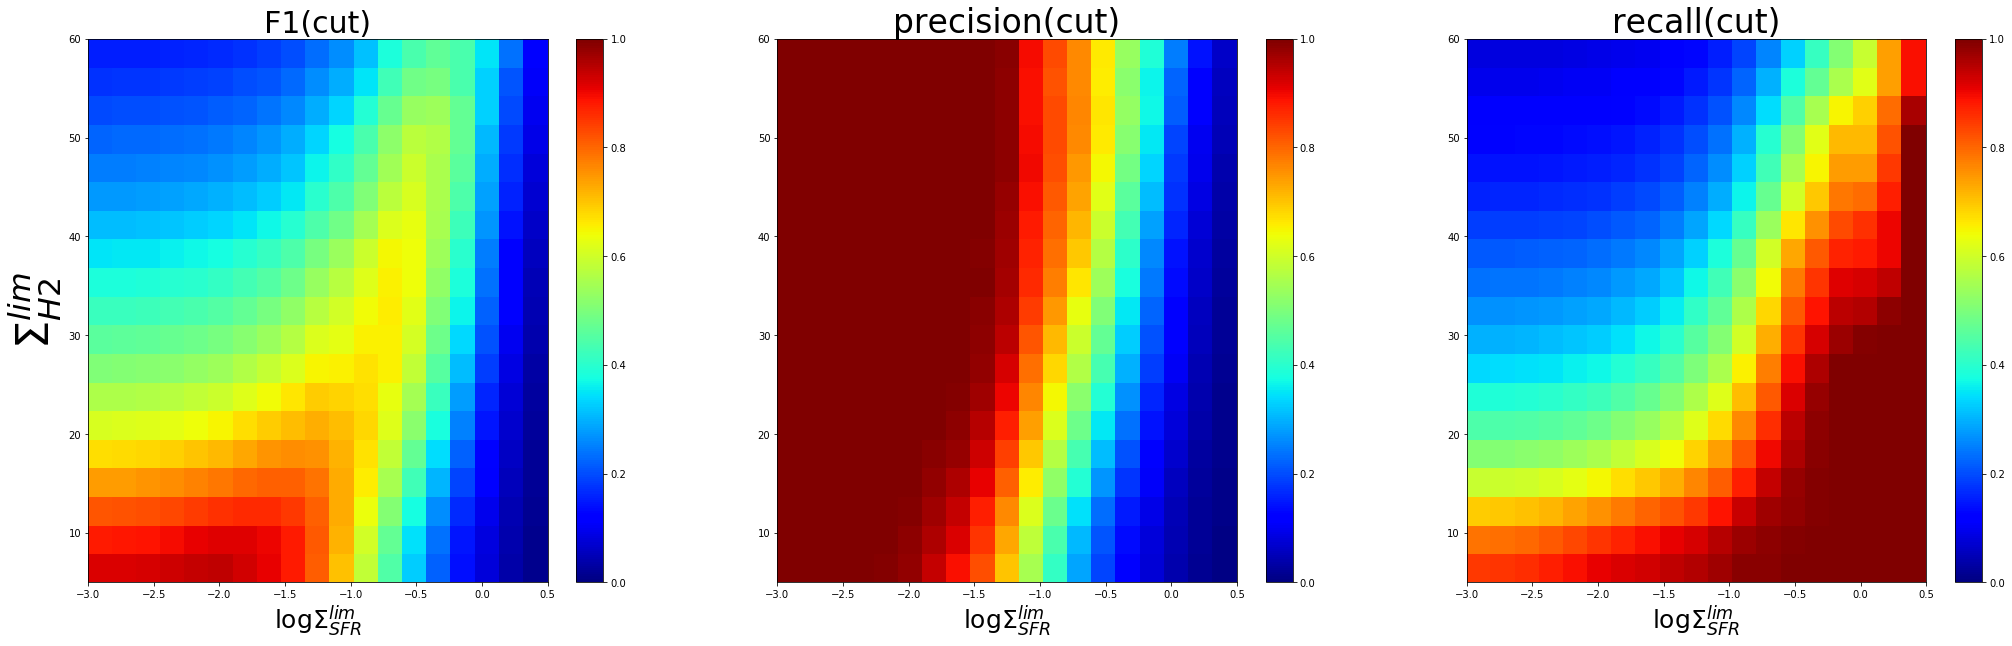

In [51]:
xx, yy = np.meshgrid(np.linspace(-3., 0.5, 20), np.linspace(5.,60., 20))
fig = plt.figure(figsize=[35, 10])

plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(xx, yy, F1_cut, cmap='jet')
plt.title('F1(cut)', fontsize=30)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
plt.ylabel(r'$\Sigma_{H2}^{lim}$', fontsize = 45)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,2)
quadmesh = plt.pcolormesh(xx, yy, precision_cut, cmap='jet')
plt.title('precision(cut)', fontsize=33)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()
          
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(xx, yy, recall_cut, cmap='jet')
plt.title('recall(cut)', fontsize=33)
plt.xlabel(r'$\log{\Sigma_{SFR}^{lim}}$', fontsize = 25)
quadmesh.set_clim(vmin=0., vmax=1.)
plt.colorbar()  

In [83]:
precision1 = []
precision2 = []
recall1 = []
recall2 = []
F1 = []
F2 = []
    
slim1 = 10.
slim2 = 10.
    
for i, hlim in enumerate(np.linspace(-3., 0.5, 20)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (Sigma_H2[k][l] >= slim1) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                TP+=1
                    
            if (Sigma_H2[k][l] <= slim1) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                FN+=1 
            if (Sigma_H2[k][l] >= slim1) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                FP+=1
         
    precision1.append(TP/(TP + FP))
    recall1.append(TP/(TP + FN))
    F1.append(2*precision1[i] * recall1[i]/(precision1[i] + recall1[i]))

for i, hlim in enumerate(np.linspace(-3., 0.5, 20)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if(k>60):    
                if (Sigma_H2[k][l] >= slim2) & (np.log10(Sigma_SFR[k][l]) >= hlim):
                    TP+=1
                    
                if (Sigma_H2[k][l] <= slim2) & (np.log10(Sigma_SFR[k][l]) >= hlim):  
                    FN+=1 
                if (Sigma_H2[k][l] >= slim2) & (np.log10(Sigma_SFR[k][l]) <= hlim):
                    FP+=1
         
    precision2.append(TP/(TP + FP))
    recall2.append(TP/(TP + FN))
    F2.append(2*precision2[i] * recall2[i]/(precision2[i] + recall2[i]))    

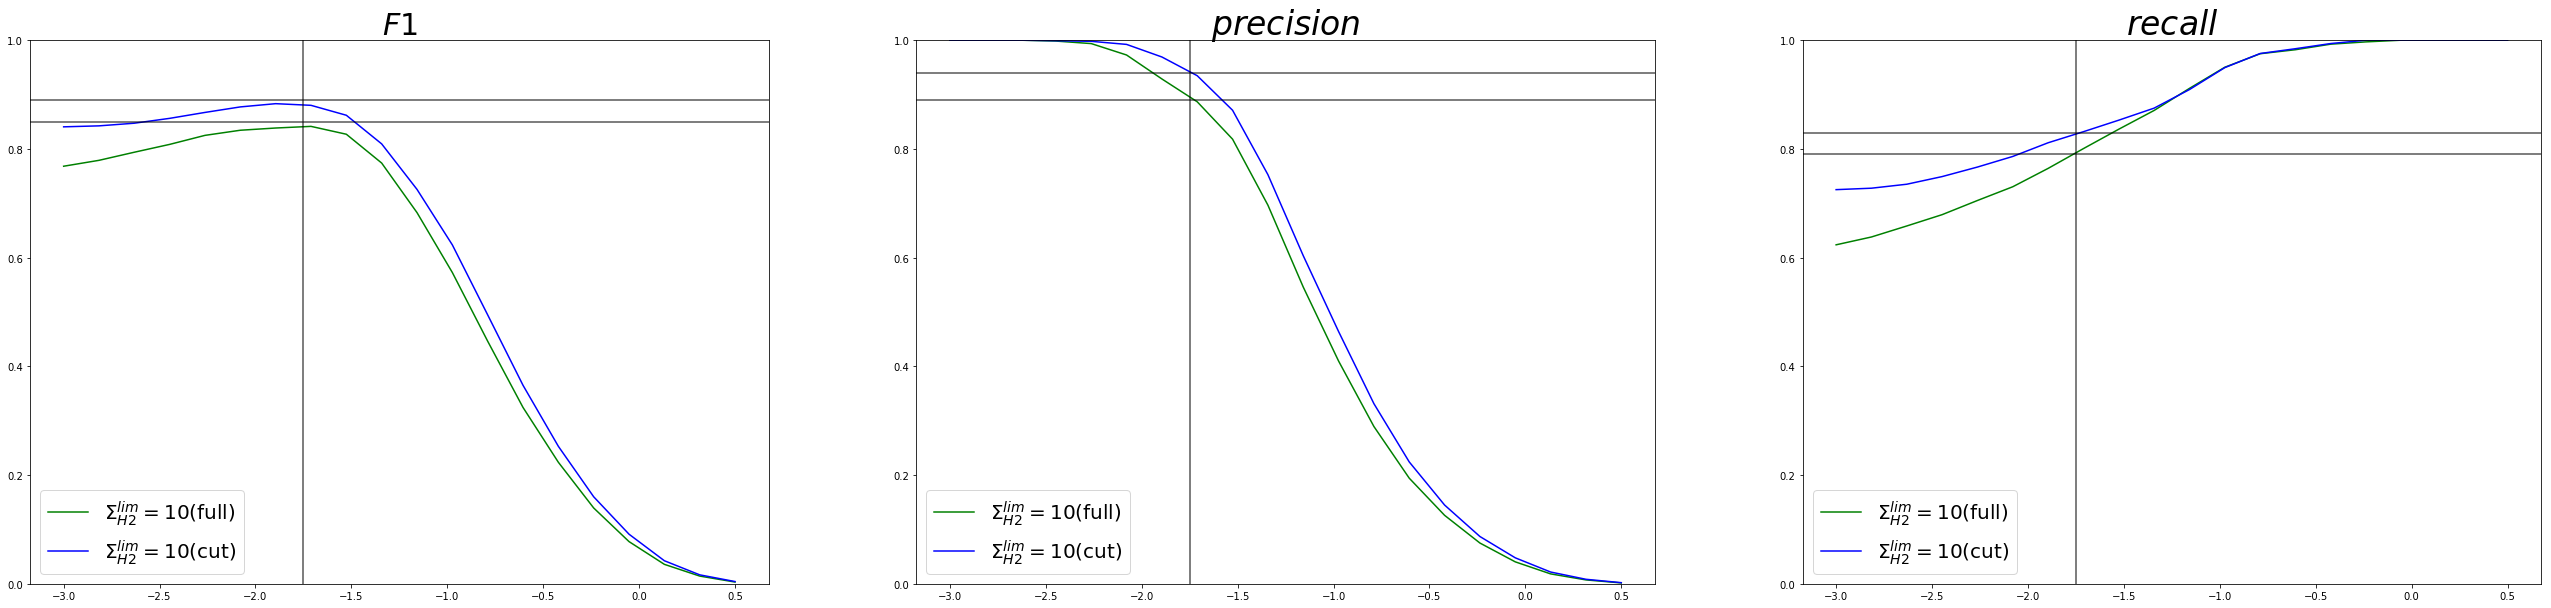

In [88]:
xx =np.array(np.linspace(-3., 0.5, 20))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F1,'-', label=r'$\Sigma_{H2}^{lim} = 10$(full)', color='green')
plt.plot(xx,F2,'-', label=r'$\Sigma_{H2}^{lim} = 10$(cut)', color='blue')
plt.title(r'$F1$', fontsize=30)
plt.ylim(0.,1.)
plt.axvline(x=-1.75, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.89, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.85, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision1,'-',label=r'$\Sigma_{H2}^{lim} = 10$(full)', color='green')
plt.plot(xx,precision2,'-', label=r'$\Sigma_{H2}^{lim} = 10$(cut)', color='blue')
plt.title(r'$precision$', fontsize=33)
plt.axvline(x=-1.75, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.94, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.89, alpha=0.5, color='black', lw=2)
plt.ylim(0.,1.)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall1,'-', label=r'$\Sigma_{H2}^{lim} = 10$(full)', color='green')
plt.plot(xx,recall2,'-', label=r'$\Sigma_{H2}^{lim} = 10$(cut)', color='blue')
plt.title(r'$recall$', fontsize=33)
plt.axvline(x=-1.75, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.79, alpha=0.5, color='black', lw=2)
plt.axhline(y=0.83, alpha=0.5, color='black', lw=2)
plt.ylim(0.,1.)
plt.legend(fontsize = 20) 

# K-Sh law

### угол наклона в зависимости от $SFR^{lim}$

In [52]:
N_H2 = []
points_H2 = []
for hlim in np.array(np.linspace(-3.,0.5,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(Sigma_SFR[k][l]) >= hlim) & (Sigma_H2[k][l] > 0.) :
                
                x.append(np.log10(Sigma_H2[k][l]))
                y.append(np.log10(Sigma_SFR[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_H2.append(1./gradient)
    points_H2.append(len(y))         

Text(0.5, 0, '$\\Sigma_{SFR}^{lim}$')

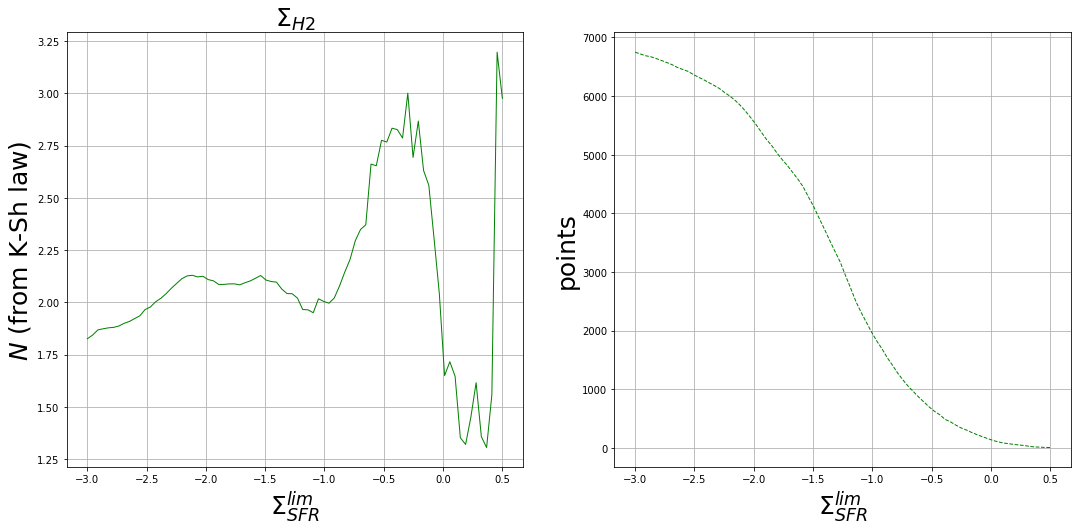

In [53]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-3.,0.5,80)), N_H2, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SFR}^{lim}$', fontsize = 25)
plt.title(r'$\Sigma_{H2}$',fontsize = 25)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-3.,0.5,80)),points_H2, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$\Sigma_{SFR}^{lim}$', fontsize = 25)

In [54]:

H_alpha = np.load('./data/H_alpha.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')

N_HI = []
points_HI = []
for hlim in np.array(np.linspace(-3.,0.5,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(Sigma_SFR[k][l]) >= hlim) & (Sigma_HI[k][l] > 0.) :
                
                
                x.append(np.log10(Sigma_HI[k][l]))
                y.append(np.log10(Sigma_SFR[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_HI.append(1./gradient)
    points_HI.append(len(y))        

Text(0.5, 0, '$\\Sigma_{SFR}^{lim}$')

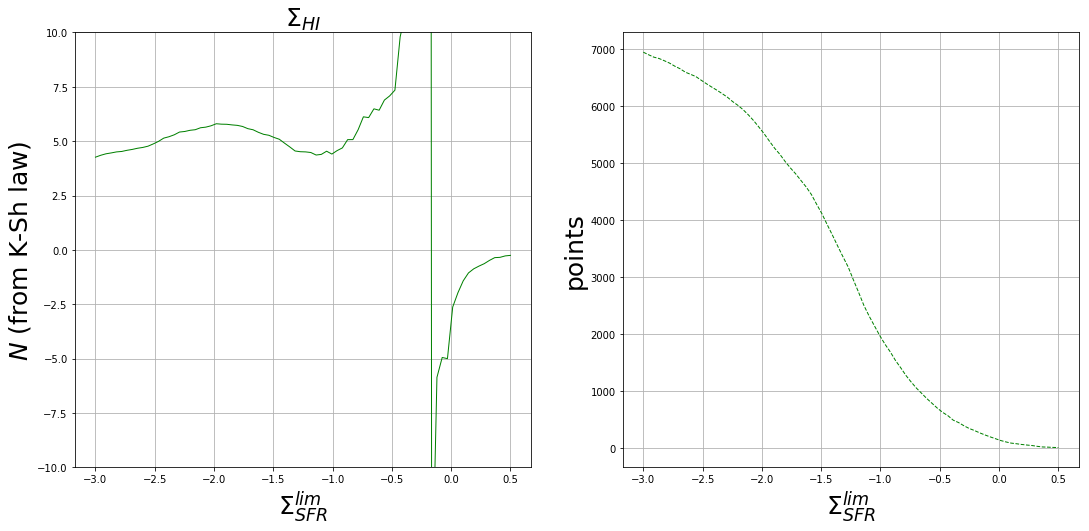

In [55]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-3.,0.5,80)), N_HI, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SFR}^{lim}$', fontsize = 25)
plt.ylim(-10,10)
plt.title(r'$\Sigma_{HI}$',fontsize = 25)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-3.,0.5,80)),points_HI, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$\Sigma_{SFR}^{lim}$', fontsize = 25)

In [56]:
Sigma_g = 1.36*(Sigma_HI + Sigma_H2) 
N_gas = []
points_gas = []
for hlim in np.array(np.linspace(-3.,0.5,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(Sigma_SFR[k][l]) >= hlim) & (Sigma_g[k][l] > 0.) :
                
                x.append(np.log10(Sigma_g[k][l]))
                y.append(np.log10(Sigma_SFR[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_gas.append(1./gradient)
    points_gas.append(len(y))

Text(0.5, 0, '$\\Sigma_{SFR}^{lim}$')

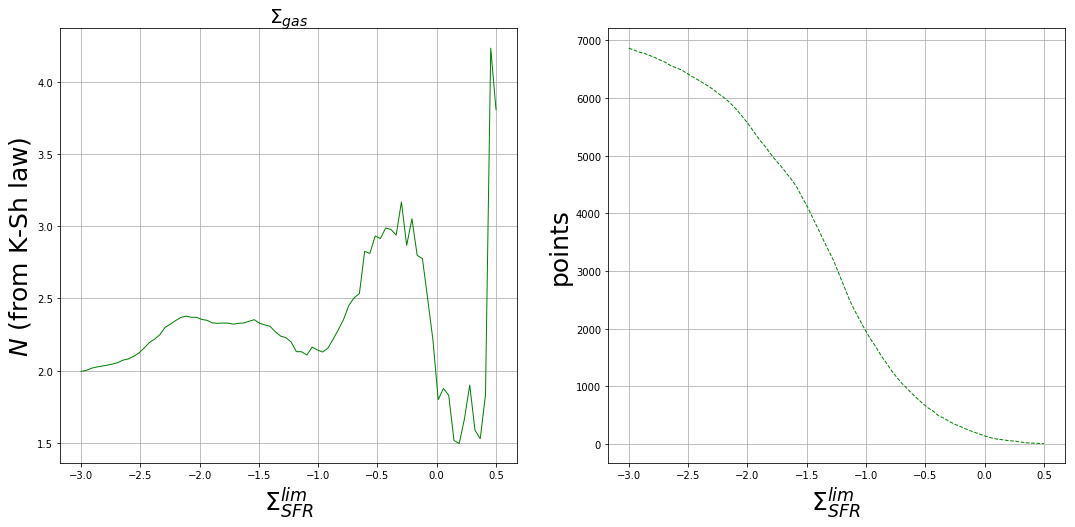

In [57]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-3.,0.5,80)), N_gas, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SFR}^{lim}$', fontsize = 25)
plt.title(r'$\Sigma_{gas}$',fontsize = 20)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-3.,0.5,80)),points_gas, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$\Sigma_{SFR}^{lim}$', fontsize = 25)

In [58]:
np.save('./data/N_H2.npy',N_H2)
np.save('./data/N_HI.npy',N_HI)
np.save('./data/N_gas.npy',N_gas)

## The effect of differential rotation (using the two Oort parameters A and B )

[статья](https://arxiv.org/pdf/2003.02848.pdf)

$$\log{\Sigma_{SFR}} \propto \log{ 2 A^2 + 5 B^2}$$

$$A = | -0.5 \left( \dfrac{v(r_{gal})}{r_{gal}} - \dfrac{dv(r_{gal})}{dr_{gal}} \right) |$$
$$B = | -0.5 \left( \dfrac{v(r_{gal})}{r_{gal}} + \dfrac{dv(r_{gal})}{dr_{gal}} \right) |$$

In [5]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [6]:
def azimuthal_average(Q, step=None, vmax=None, maxval=None, vmin=0.1):
    az_av = []
    az_dev = []
    anulli = []
    for dbin in np.arange(vmin,vmax,step):
        mask = (dist_kpc >= dbin) & (dist_kpc <= dbin + step)
        anulli = Q[mask]
        mask = (anulli < maxval) & (anulli > 0.) 
        anulli = anulli[mask]
        az_av.append(anulli.sum()/mask.sum())
        az_dev.append(np.std(anulli))
    return az_av, az_dev

In [7]:
R = np.array(np.linspace(0.1,9.1,90))
A = [-0.5 * (velocity_approx(dist) / dist - velocity_approx.deriv()(dist)) for dist in R]
B = [-0.5 * (velocity_approx(dist) / dist + velocity_approx.deriv()(dist)) for dist in R]
Sigma_SFR_az = azimuthal_average(Sigma_SFR, step=0.1, vmax=9.1, maxval = 5.)[0]


diff_rot = [2 * A[i]**2 + 5 * B[i]**2 for i in range(len(R))] 

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/lera/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/lera/.local/lib/python3.5/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/lera/.local/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, 'Galactocentric Radius [kpc]')

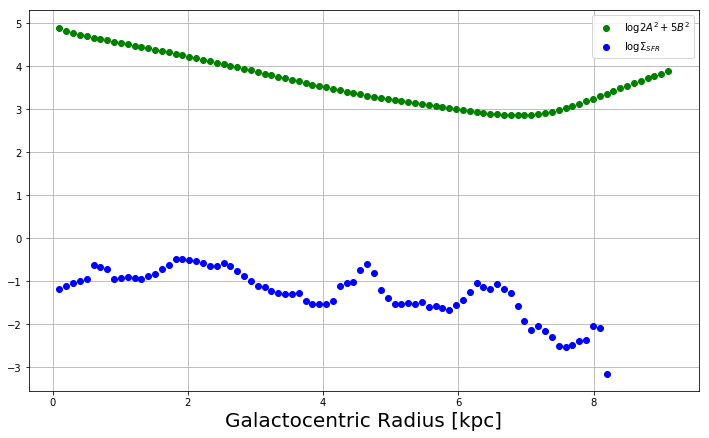

In [8]:
fig = plt.figure(figsize=[12, 7])
plt.plot(R, np.log10(diff_rot), 'o', lw=1, color='g',label=r'$\log{ 2 A^2 + 5 B^2}$')
plt.plot(R, np.log10(Sigma_SFR_az), 'o', lw=1, color='b',label=r'$\log{\Sigma_{SFR}}$')
plt.grid()
plt.legend()
plt.xlabel(r'Galactocentric Radius [kpc]', fontsize = 20)


In [9]:
from scipy import stats


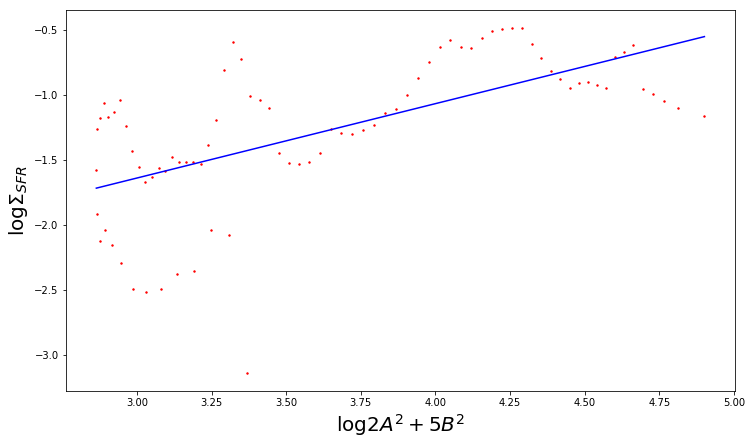

0.57 -3.35


In [10]:
x=np.log10(diff_rot[0:-9])
y=np.log10(Sigma_SFR_az[0:-9])
fig = plt.figure(figsize=[12, 7])
plt.scatter(x,y, 2., color='r')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
#gradient=1.01  # взяла из статьи
#intercept = -5. # подобрала, иначе nan получаются
x1=np.array(np.linspace(mn,mx,100))
y1=x1*gradient+intercept
plt.plot(x1,y1,'-',color='b')

plt.ylabel(r'$\log{\Sigma_{SFR}}$',fontsize=20)
plt.xlabel(r'$\log{2 A^2 + 5 B^2}$',fontsize=20)
plt.show()
print('{:2.2f}'.format(gradient),'{:2.2f}'.format(intercept))

$$\log{\Sigma_{SFR}} = -3.35 + 0.57\times \log{( 2 A^2 + 5 B^2)}$$



In [11]:
Diff_rot = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = -0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))
        B = -0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] + velocity_approx.deriv()(dist_kpc[i][j])) 
         
        Diff_rot[i][j] =2 * A**2 + 5 * B**2

In [13]:
try:
    from astropy.convolution import Gaussian2DKernel, convolve
    astro_smooth = True
except ImportError as IE:
    astro_smooth = False

0.7172631192997403 -4.123301983090974


/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


Text(0.5, 0, '$\\log{2 A^2 + 5 B^2}$')

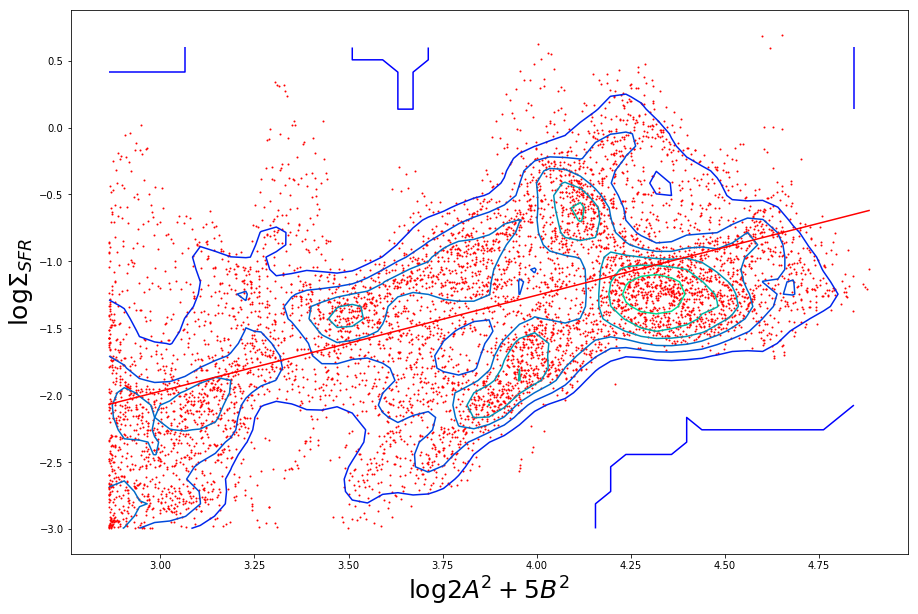

In [19]:
fig = plt.figure(figsize=[15,10])
indxs = (Sigma_SFR != nan) & (Diff_rot != 0) & (Sigma_SFR != 0) & (dist_kpc > 0.1) & (np.log10(Sigma_SFR)>-3)

y,x = np.ravel(np.log10(Sigma_SFR)[indxs]), np.log10(np.ravel(Diff_rot[indxs]))

x=np.nan_to_num(x)
y=np.nan_to_num(y)


H, xedges, yedges = np.histogram2d(x,y, bins=(50,40))
xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])
# Smooth the contours (if astropy is installed)
if astro_smooth:
    kernel = Gaussian2DKernel(stddev=1.)
    H=convolve(H,kernel)
    
clevels = plt.contour(xmesh,ymesh,H.T,lw=.9,cmap='winter')#,zorder=90)
plt.scatter(x,y, 1., color='r')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x1,y1,'-r')
print(gradient,intercept)

plt.ylabel(r'$\log{\Sigma_{SFR}}$',fontsize=25)
plt.xlabel(r'$\log{2 A^2 + 5 B^2}$',fontsize=25)
#plt.ylim(0.,2.5)
#plt.xlim(-3,0.5)



$$\log{\Sigma_{SFR}} = -4.12 + 0.72\times \log{( 2 A^2 + 5 B^2)}$$



# Проверим на чувствительность модель грав. неустойчивости

## Варьируем $\Sigma_{H2}$

In [161]:
dR =0.2#(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
    Sigma_H2_ = (1. + percent/100.) * Sigma_H2
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors = []   
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
 #           if step % 1000 == 0:
  #              print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
          
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_Sigma_H2.npy',mean_error_min)
np.save('./data/array_errors_Sigma_H2.npy',array_errors)
np.save('./data/std_error_Sigma_H2.npy',std_error_min)
    
    

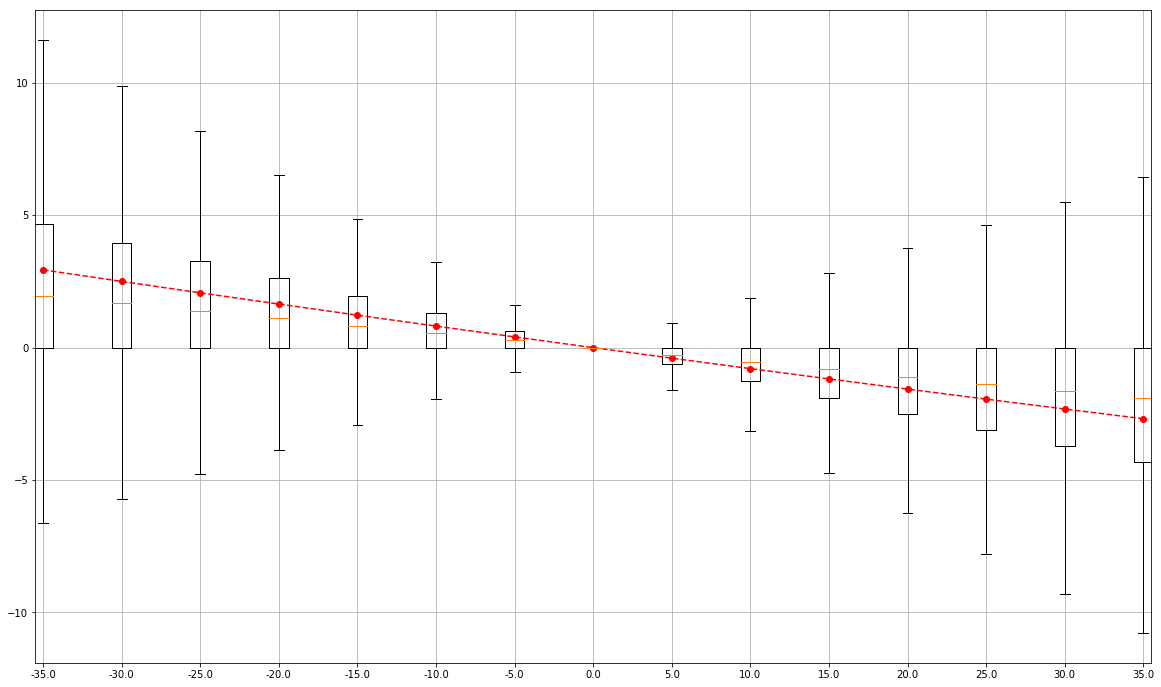

In [162]:

array_errors = np.load('./data/array_errors_Sigma_H2.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min = np.load('./data/mean_error_Sigma_H2.npy')

plt.figure(figsize=[20,12])

plt.boxplot(array_errors, showfliers=False,positions=np.array(np.arange(-35.,40.,5.)), patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()
#plt.ylim(-5, 5.)
plt.savefig('./images/boxs_Sigma_H2.png', format = 'png', dpi=500)


## Варьируем $\sigma_{s}^{min}$, $\sigma_{s}^{max}$

In [163]:
dR =0.2#(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
       
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_min = (1. + percent/100.) * sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_sigma_s.npy',mean_error_min)
np.save('./data/array_errors_sigma_s.npy',array_errors)
np.save('./data/std_error_sigma_s.npy',std_error_min)    
        

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


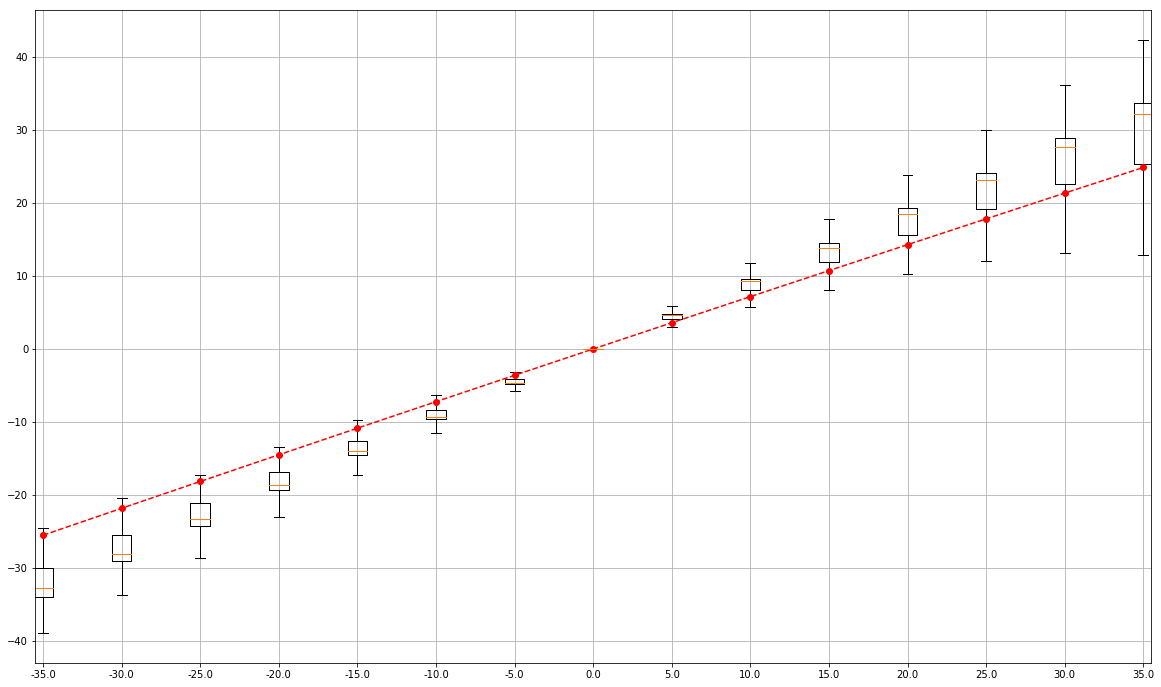

In [164]:

array_errors = np.load('./data/array_errors_sigma_s.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_sigma_s.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,showfliers=False, positions=np.array(np.arange(-35.,40.,5.)),patch_artist = False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()
#plt.ylim(-5, 5.)


## Варьируем $\Sigma_{HI}$

In [165]:
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []
array_bark = []
for percent in np.arange(-35.,40.,5.):
    Sigma_HI_ = (1. + percent/100.) * Sigma_HI
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    bark_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    errors = []
    errors_bark = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI_[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
                root = -1.
            Qeff_min_[i][j] = 1./qeff
            bark_[i][j] = root   
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            errors_bark.append(bark_[i][j]*100./bark[i][j] - 100)
            
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())
    array_bark.append(errors_bark)
    
np.save('./data/mean_error_Sigma_HI.npy',mean_error_min)
np.save('./data/array_errors_Sigma_HI.npy',array_errors)
np.save('./data/std_error_Sigma_HI.npy',std_error_min)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


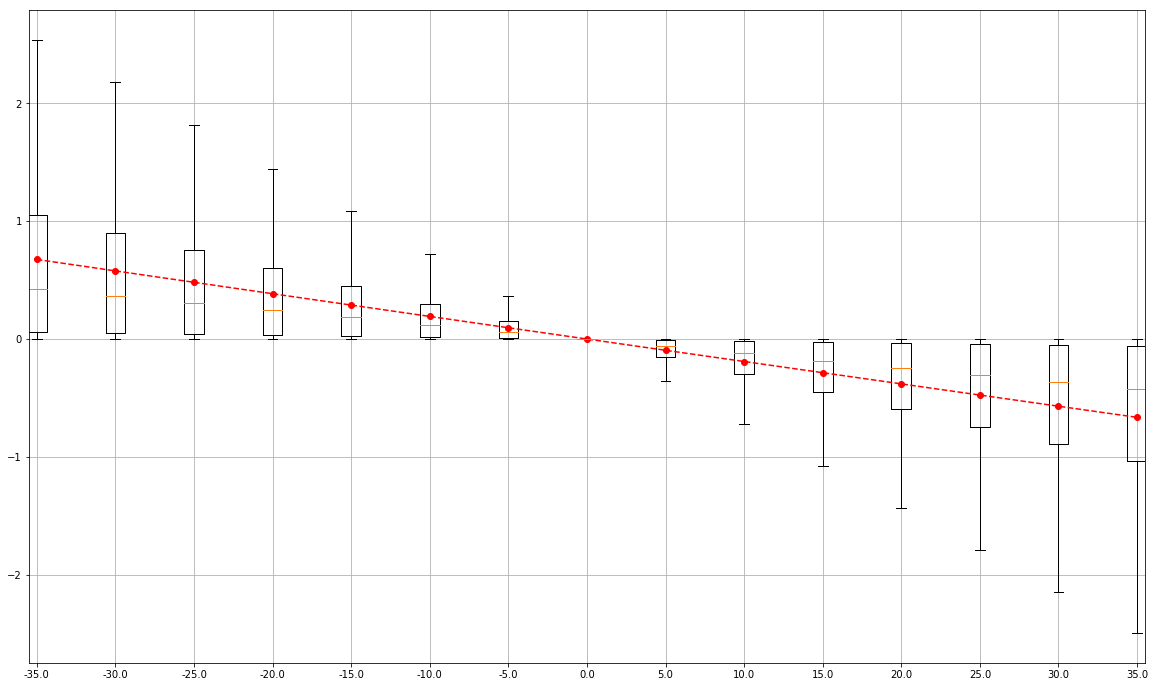

In [166]:
array_errors = np.load('./data/array_errors_Sigma_HI.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_Sigma_HI.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()
#plt.ylim(-5, 5.)

## Варьируем $\sigma_{HI}$ 

In [167]:
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    errors = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = (sigma_HI[i][j]/1000.) * (1. + percent/100.)
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_sigma_HI.npy',mean_error_min)
np.save('./data/array_errors_sigma_HI.npy',array_errors)
np.save('./data/std_error_sigma_HI.npy',std_error_min)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


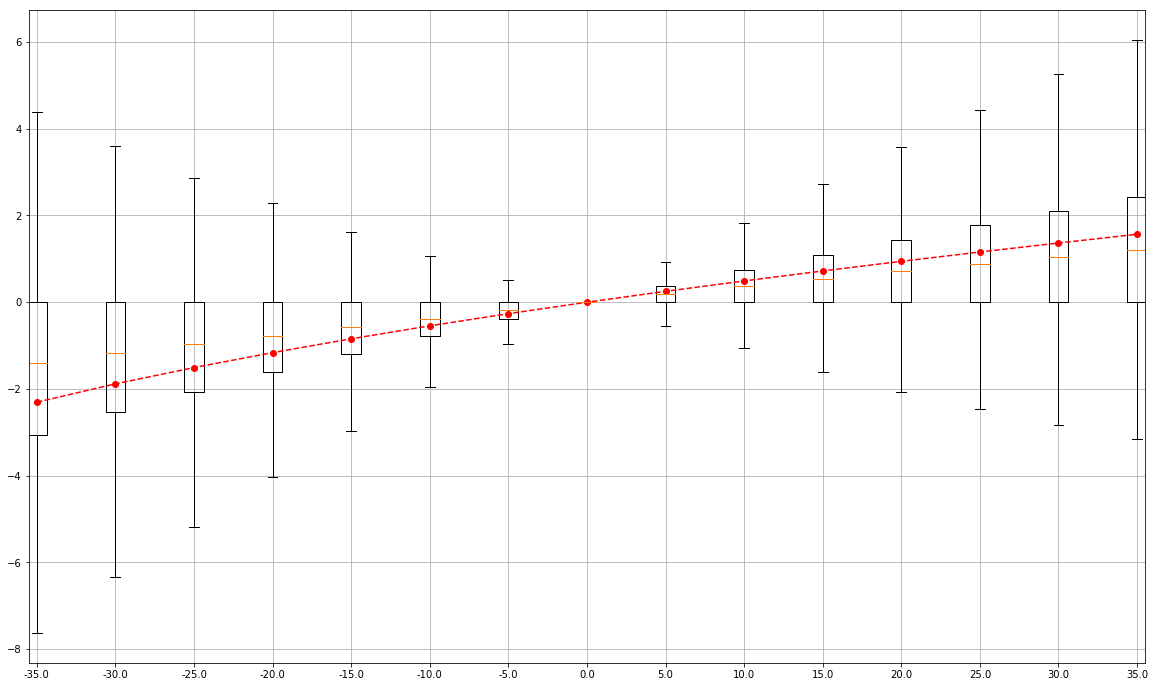

In [168]:
array_errors = np.load('./data/array_errors_sigma_HI.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_sigma_HI.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()

## Варьируем $\Sigma_s$

In [169]:
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    errors = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = (1 + percent/100.)*Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_Sigma_s.npy',mean_error_min)
np.save('./data/array_errors_Sigma_s.npy',array_errors)
np.save('./data/std_error_Sigma_s.npy',std_error_min)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


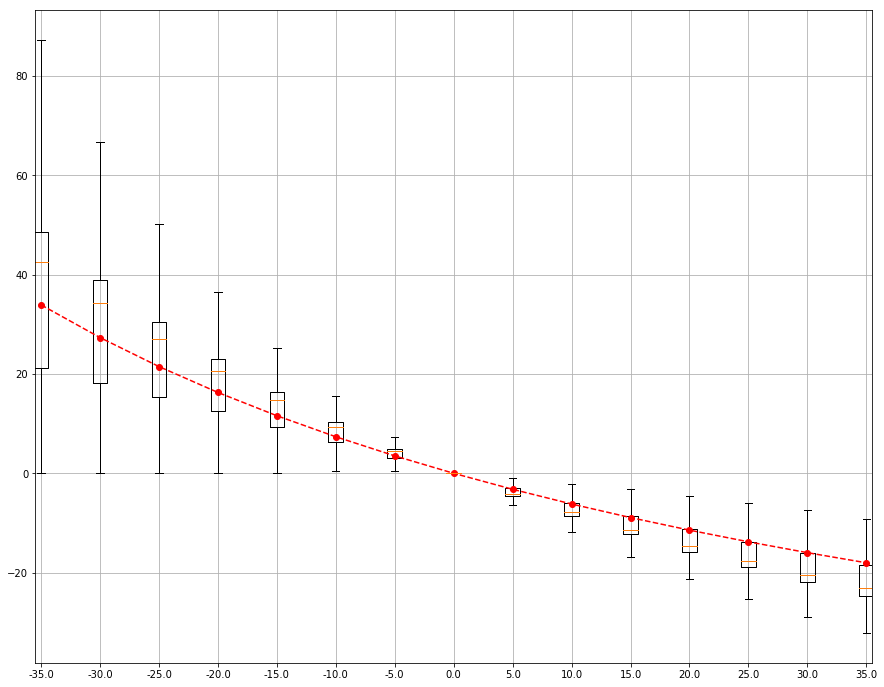

In [170]:
array_errors = np.load('./data/array_errors_Sigma_s.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_Sigma_s.npy')
plt.figure(figsize=[15,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()

In [171]:
mean_error_Sigma_s = np.load('./data/mean_error_Sigma_s.npy')
mean_error_Sigma_HI = np.load('./data/mean_error_Sigma_HI.npy')
mean_error_sigma_s = np.load('./data/mean_error_sigma_s.npy')
mean_error_Sigma_H2 = np.load('./data/mean_error_Sigma_H2.npy')
mean_error_sigma_HI = np.load('./data/mean_error_sigma_HI.npy')

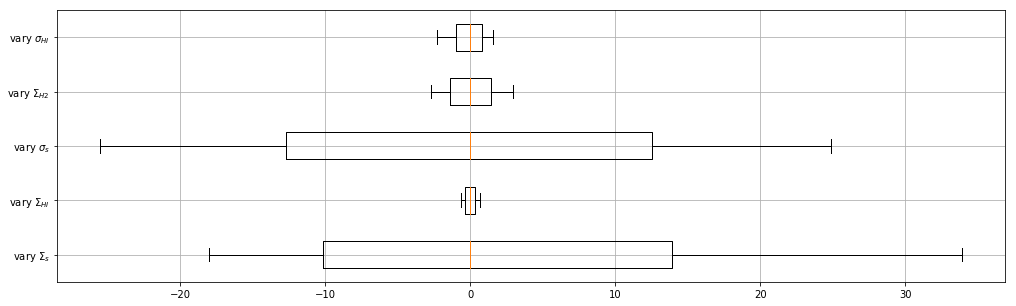

In [172]:
array = [mean_error_Sigma_s,mean_error_Sigma_HI,mean_error_sigma_s,mean_error_Sigma_H2,mean_error_sigma_HI]
plt.figure(figsize=[17,5])
plt.boxplot(array,showfliers=False, vert=False, labels=[r'vary $\Sigma_s$',r'vary $\Sigma_{HI}$',r'vary $\sigma_s$',
                                            r'vary $\Sigma_{H2}$', r'vary $\sigma_{HI}$'] )

plt.grid()

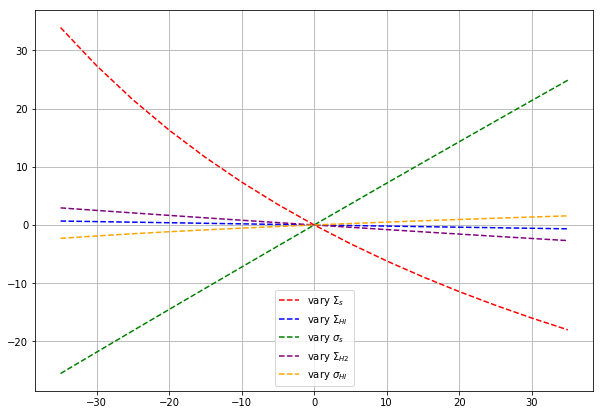

In [173]:
plt.figure(figsize=[10,7])
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_s, '--', label=r'vary $\Sigma_s$', color='red')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_HI, '--', label=r'vary $\Sigma_{HI}$', color='blue')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_sigma_s, '--', label=r'vary $\sigma_s$', color='green')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_H2, '--', label=r'vary $\Sigma_{H2}$', color='purple')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_sigma_HI, '--', label=r'vary $\sigma_{HI}$', color='orange')
plt.grid()
plt.legend()

## Проверим на чувствительность к ошибкам модель cold phase

In [9]:
from statistics import median
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
dist_kpc = np.load('./data/dist_kpc.npy')
cold_phase = np.load('./data/cold_phase.npy')
H_alpha =np.load('./data/H_alpha.npy')

In [10]:
 Z = np.zeros(dist_kpc.shape)
for i, row in enumerate(H_alpha):
    for j, col in enumerate(H_alpha[0]):
        if (np.log10(H_alpha[i][j])<-14.47):
            Z[i][j] = 0.2
        if (-14.47 <= np.log10(H_alpha[i][j]) < -14.):
            Z[i][j] = 8.5    
        if (-14.<= np.log10(H_alpha[i][j]) < -13.7):
            Z[i][j] = 8.52
        if (-13.7 <= np.log10(H_alpha[i][j]) <-13.5):
            Z[i][j] = 8.55    
        if (-13.5 <= np.log10(H_alpha[i][j]) < -13.15):
            Z[i][j] = 8.58
        if (-13.15 <= np.log10(H_alpha[i][j])):
            Z[i][j] = 8.6 
                
Z[90:100,27:38] = 0.2  
Z[48:54,17:26] = 0.2 
Z[35:44,45:55] = 0.2 
Z[70:77, 0:7] = 0.2

#for i, row in enumerate(H_alpha):
  #  for j, col in enumerate(H_alpha[0]):
    #    if (Z[i][j]==0):
      #      Z[i][j] = NAN
            
np.save('./data/Z.npy',Z)            

In [11]:
Z_sun = 0.012

In [12]:
print(cold_phase.shape)

(156, 66)


### $\Sigma_{HI}$

In [19]:
G = 4.32
mean_error_cph = []
std_error_cph = []
array_errors = []
step = 0
for percent in np.arange(-35.,40.,5.):
    
   
    cold_phase_ = np.zeros(dist_kpc.shape) 
    errors_cph = np.zeros(dist_kpc.shape)
    errors = []
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            
            if (Z[i][j] != 0.):
                step+=1
                I = Sigma_SFR[i][j] * 5. * 10**10
                Sigma_HI_ = Sigma_HI[i][j]*(1. + percent/100.)
                Sigma_g = 1.36 * (Sigma_HI_+Sigma_H2[i][j])
                f = Sigma_g / (Sigma_g + Sigma_s[i][j])
                Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I, 0.23,dtype = np.float)
                cold_phase_[i][j] = Sigma_SO / Sigma_g  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)
                    
   # cold_phase_ = np.nan_to_num(cold_phase_)
   # cold_phase = np.nan_to_num(cold_phase)
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
             if (Z[i][j] != 0.):
                errors_cph[i][j] = cold_phase_[i][j]*100./cold_phase[i][j] - 100
                errors.append(cold_phase_[i][j]*100./cold_phase[i][j] - 100)
                
    errors_cph = np.nan_to_num(errors_cph)
    array_errors.append(np.nan_to_num(errors))
    mean_error_cph.append(np.median(errors_cph))
    std_error_cph.append(errors_cph.std())

print(step)    
np.save('./data/mean_error_Sigma_HI_cph.npy',mean_error_cph)
np.save('./data/array_errors_Sigma_HI_cph.npy',array_errors)
np.save('./data/std_error_Sigma_HI_cph.npy',std_error_cph)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power


105360


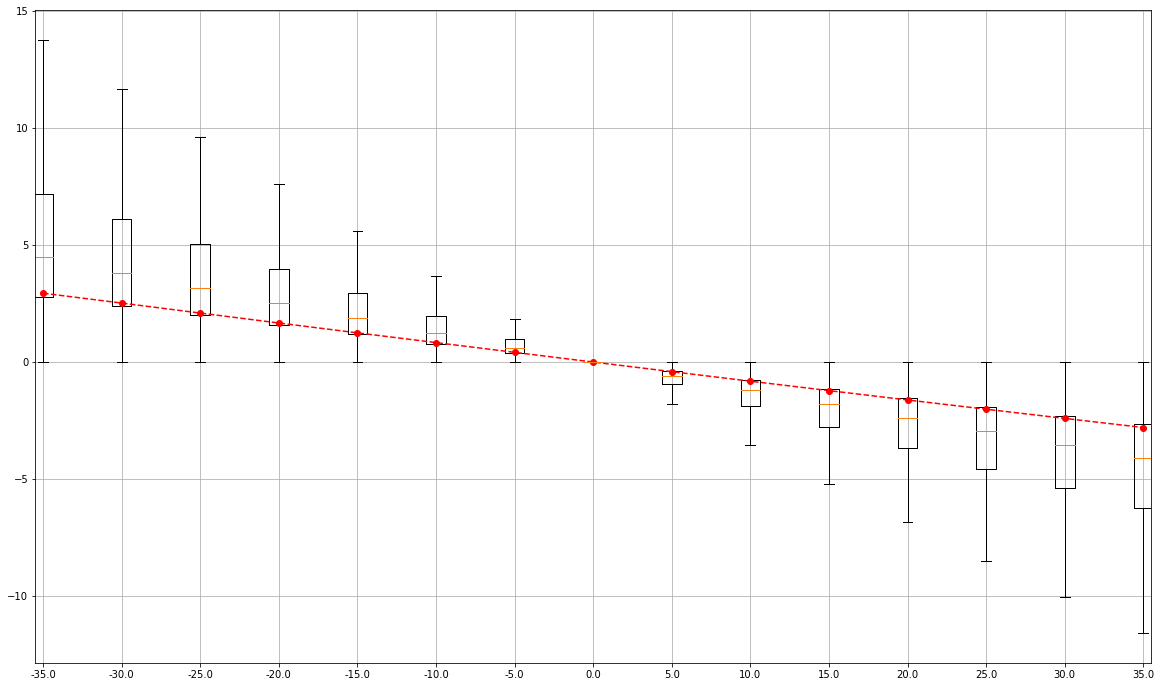

In [20]:
array_errors = np.load('./data/array_errors_Sigma_HI_cph.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(7024,15)
mean_error_cph  =  np.load('./data/mean_error_Sigma_HI_cph.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_cph, 'o--', color='red')
plt.grid()

### $\Sigma_{H2}$

In [21]:
mean_error_cph = []
std_error_cph = []
array_errors = []
step = 0
for percent in np.arange(-35.,40.,5.):
    
   
    cold_phase_ = np.zeros(dist_kpc.shape) 
    errors_cph = np.zeros(dist_kpc.shape)
    errors = []
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            
            if (Z[i][j] != 0.):
                
                I = Sigma_SFR[i][j] * 5. * 10**10
                Sigma_H2_ = Sigma_H2[i][j]*(1. + percent/100.)
                Sigma_g = 1.36 * (Sigma_H2_+Sigma_HI[i][j])
                f = Sigma_g / (Sigma_g + Sigma_s[i][j])
                Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I, 0.23,dtype = np.float)
                cold_phase_[i][j] = Sigma_SO / Sigma_g  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)
                    
   # cold_phase_ = np.nan_to_num(cold_phase_)
   # cold_phase = np.nan_to_num(cold_phase)
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
             if (Z[i][j] != 0.):
                errors_cph[i][j] = cold_phase_[i][j]*100./cold_phase[i][j] - 100
                errors.append(cold_phase_[i][j]*100./cold_phase[i][j] - 100)
                
    errors_cph = np.nan_to_num(errors_cph)
    array_errors.append(np.nan_to_num(errors))
    mean_error_cph.append(np.median(errors_cph))
    std_error_cph.append(errors_cph.std())

    
np.save('./data/mean_error_Sigma_H2_cph.npy',mean_error_cph)
np.save('./data/array_errors_Sigma_H2_cph.npy',array_errors)
np.save('./data/std_error_Sigma_H2_cph.npy',std_error_cph)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


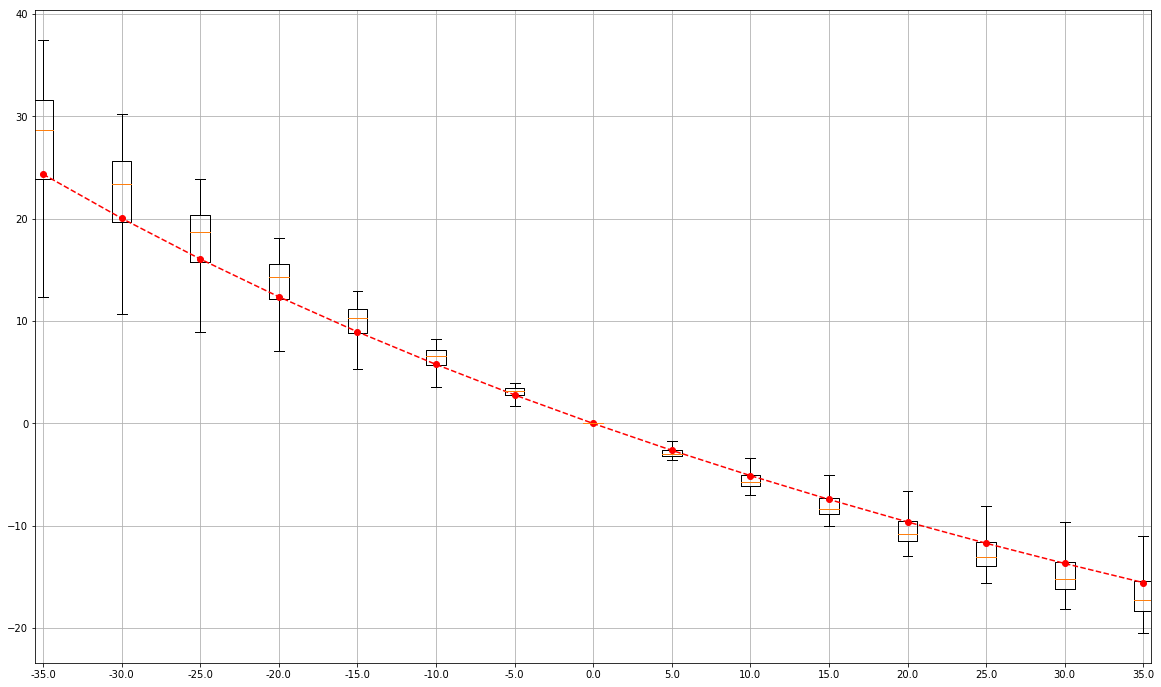

In [22]:
array_errors = np.load('./data/array_errors_Sigma_H2_cph.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(7024,15)
mean_error_cph  =  np.load('./data/mean_error_Sigma_H2_cph.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_cph, 'o--', color='red')
plt.grid()

### $\Sigma_s$

In [23]:
mean_error_cph = []
std_error_cph = []
array_errors = []
step = 0
for percent in np.arange(-35.,40.,5.):
    
   
    cold_phase_ = np.zeros(dist_kpc.shape) 
    errors_cph = np.zeros(dist_kpc.shape)
    errors = []
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            
            if (Z[i][j] != 0.):
                
                I = Sigma_SFR[i][j] * 5. * 10**10
                Sigma_s_ = Sigma_s[i][j]*(1. + percent/100.)
                Sigma_g = 1.36 * (Sigma_H2[i][j] + Sigma_HI[i][j])
                f = Sigma_g / (Sigma_g + Sigma_s_)
                Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I, 0.23,dtype = np.float)
                cold_phase_[i][j] = Sigma_SO / Sigma_g  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)
                    
   
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
             if (Z[i][j] != 0.):
                errors_cph[i][j] = cold_phase_[i][j]*100./cold_phase[i][j] - 100
                errors.append(cold_phase_[i][j]*100./cold_phase[i][j] - 100)
                
    errors_cph = np.nan_to_num(errors_cph)
    array_errors.append(np.nan_to_num(errors))
    mean_error_cph.append(np.median(errors_cph))
    std_error_cph.append(errors_cph.std())

    
np.save('./data/mean_error_Sigma_s_cph.npy',mean_error_cph)
np.save('./data/array_errors_Sigma_s_cph.npy',array_errors)
np.save('./data/std_error_Sigma_s_cph.npy',std_error_cph)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


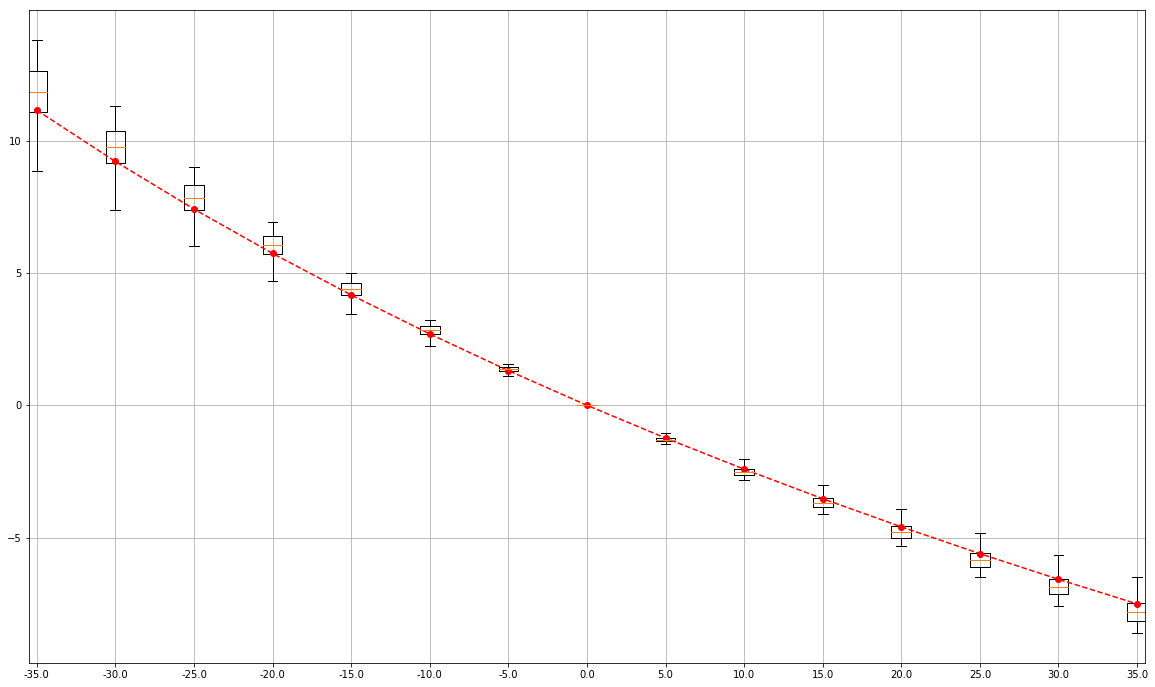

In [24]:
array_errors = np.load('./data/array_errors_Sigma_s_cph.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(7024,15)
mean_error_cph  =  np.load('./data/mean_error_Sigma_s_cph.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_cph, 'o--', color='red')
plt.grid()

### $\Sigma_{SFR}$

In [25]:
mean_error_cph = []
std_error_cph = []
array_errors = []
step = 0
for percent in np.arange(-35.,40.,5.):
    
   
    cold_phase_ = np.zeros(dist_kpc.shape) 
    errors_cph = np.zeros(dist_kpc.shape)
    errors = []
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            
            if (Z[i][j] != 0.):
                
                Sigma_SFR_ = Sigma_SFR[i][j]*(1. + percent/100.)
                I = Sigma_SFR_ * 5. * 10**10                
                Sigma_g = 1.36 * (Sigma_H2[i][j] + Sigma_HI[i][j])
                f = Sigma_g / (Sigma_g + Sigma_s[i][j])
                Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I, 0.23,dtype = np.float)
                cold_phase_[i][j] = Sigma_SO / Sigma_g  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)
                    
   
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
             if (Z[i][j] != 0.):
                errors_cph[i][j] = cold_phase_[i][j]*100./cold_phase[i][j] - 100
                errors.append(cold_phase_[i][j]*100./cold_phase[i][j] - 100)
                
    errors_cph = np.nan_to_num(errors_cph)
    array_errors.append(np.nan_to_num(errors))
    mean_error_cph.append(np.median(errors_cph))
    std_error_cph.append(errors_cph.std())

    
np.save('./data/mean_error_Sigma_SFR_cph.npy',mean_error_cph)
np.save('./data/array_errors_Sigma_SFR_cph.npy',array_errors)
np.save('./data/std_error_Sigma_SFR_cph.npy',std_error_cph)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


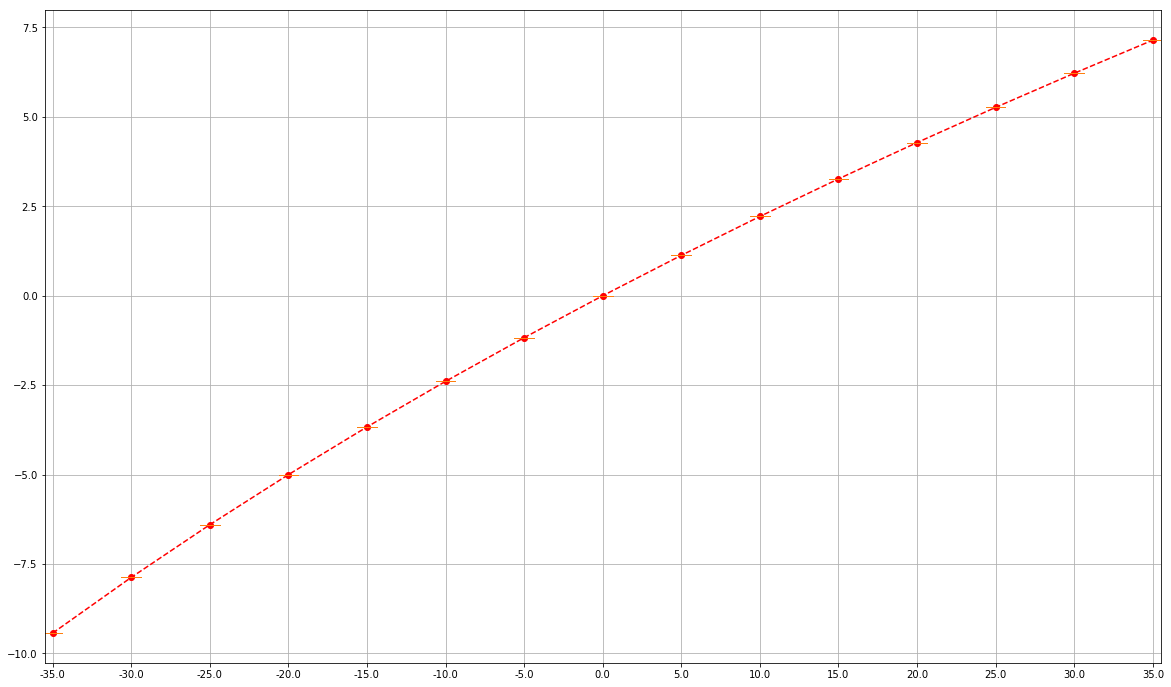

In [26]:
array_errors = np.load('./data/array_errors_Sigma_SFR_cph.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(7024,15)
mean_error_cph  =  np.load('./data/mean_error_Sigma_SFR_cph.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_cph, 'o--', color='red')
plt.grid()

### metallicity

In [27]:
mean_error_cph = []
std_error_cph = []
array_errors = []
step = 0
for percent in np.arange(-35.,40.,5.):
    
   
    cold_phase_ = np.zeros(dist_kpc.shape) 
    errors_cph = np.zeros(dist_kpc.shape)
    errors = []
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            
            if (Z[i][j] != 0.):
                
                Z_ = Z[i][j]*(1. + percent/100.)
                I = Sigma_SFR[i][j] * 5. * 10**10                
                Sigma_g = 1.36 * (Sigma_H2[i][j] + Sigma_HI[i][j])
                f = Sigma_g / (Sigma_g + Sigma_s[i][j])
                Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I, 0.23,dtype = np.float)
                cold_phase_[i][j] = Sigma_SO / Sigma_g  * np.power(Z_/Z_sun/0.1, -0.3,dtype = np.float)
                    
   
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
             if (Z[i][j] != 0.):
                errors_cph[i][j] = cold_phase_[i][j]*100./cold_phase[i][j] - 100
                errors.append(cold_phase_[i][j]*100./cold_phase[i][j] - 100)
                
    errors_cph = np.nan_to_num(errors_cph)
    array_errors.append(np.nan_to_num(errors))
    mean_error_cph.append(np.median(errors_cph))
    std_error_cph.append(errors_cph.std())

    
np.save('./data/mean_error_Z_cph.npy',mean_error_cph)
np.save('./data/array_errors_Z_cph.npy',array_errors)
np.save('./data/std_error_Z_cph.npy',std_error_cph)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


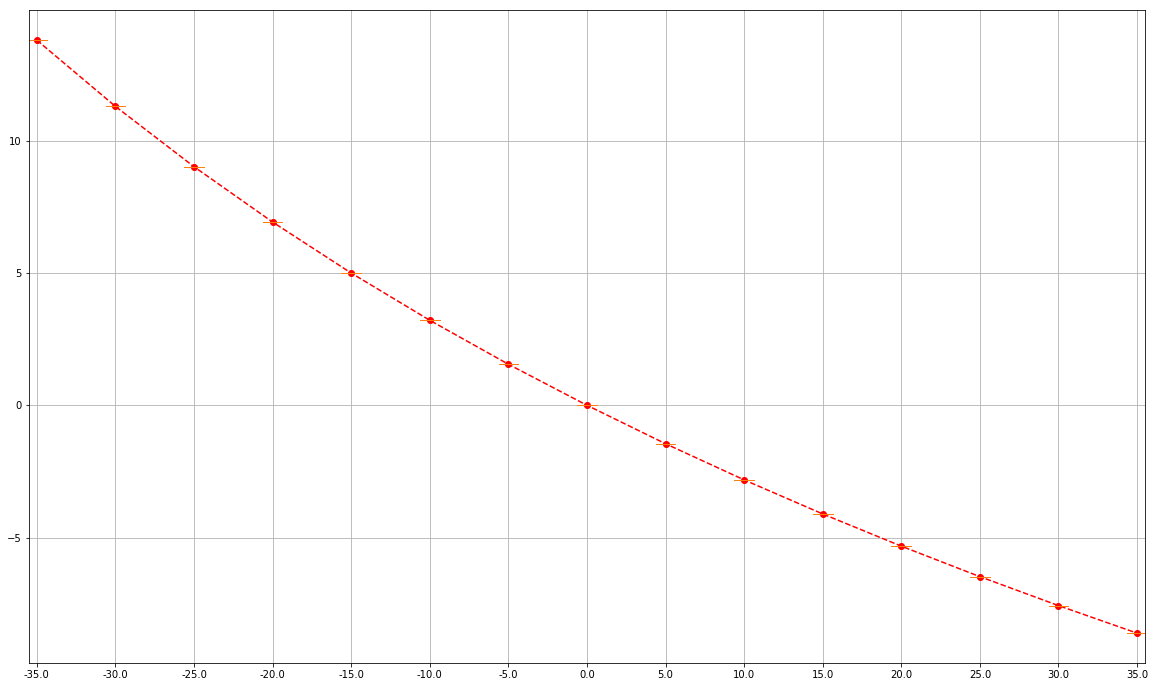

In [28]:
array_errors = np.load('./data/array_errors_Z_cph.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(7024,15)
mean_error_cph  =  np.load('./data/mean_error_Z_cph.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_cph, 'o--', color='red')
plt.grid()

In [4]:
mean_error_Sigma_s = np.load('./data/mean_error_Sigma_s_cph.npy')
mean_error_Sigma_HI = np.load('./data/mean_error_Sigma_HI_cph.npy')
mean_error_Z = np.load('./data/mean_error_Z_cph.npy')
mean_error_Sigma_H2 = np.load('./data/mean_error_Sigma_H2_cph.npy')
mean_error_Sigma_SFR = np.load('./data/mean_error_Sigma_SFR_cph.npy')

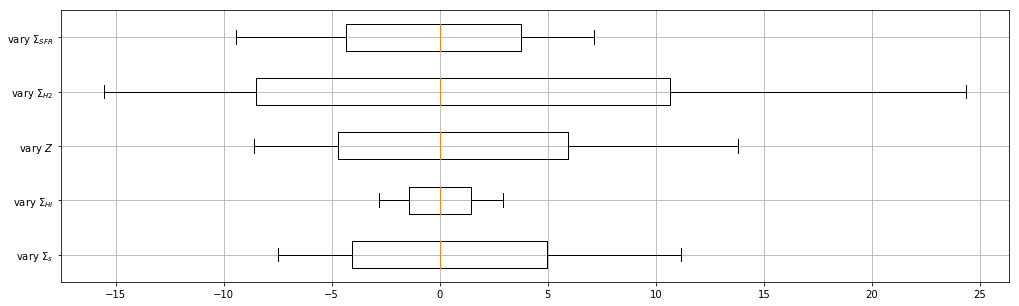

In [5]:
array = [mean_error_Sigma_s,mean_error_Sigma_HI,mean_error_Z,mean_error_Sigma_H2,mean_error_Sigma_SFR]
plt.figure(figsize=[17,5])
plt.boxplot(array,showfliers=False, vert=False, labels=[r'vary $\Sigma_s$',r'vary $\Sigma_{HI}$',r'vary $Z$',
                                            r'vary $\Sigma_{H2}$', r'vary $\Sigma_{SFR}$'] )

plt.grid()

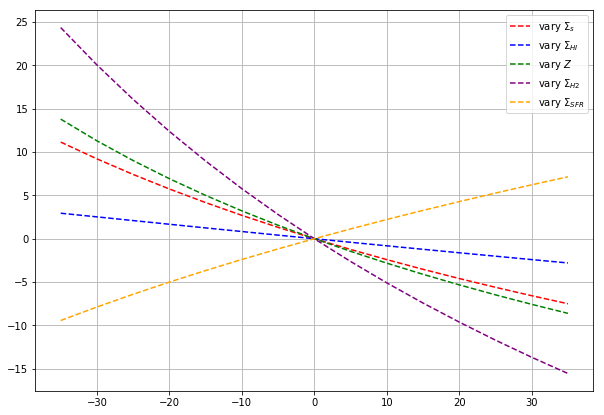

In [6]:
plt.figure(figsize=[10,7])
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_s, '--', label=r'vary $\Sigma_s$', color='red')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_HI, '--', label=r'vary $\Sigma_{HI}$', color='blue')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Z, '--', label=r'vary $Z$', color='green')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_H2, '--', label=r'vary $\Sigma_{H2}$', color='purple')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_SFR, '--', label=r'vary $\Sigma_{SFR}$', color='orange')
plt.grid()
plt.legend()

### I will try to move center

In [6]:
#import pyfits
from astropy.io import fits

In [8]:
#HI_raw = pyfits.open('./data_1/NGC_3627_NA_MOM1_THINGS.FITS')
HI_raw=fits.getdata('./data/NGC_3627_NA_MOM1_THINGS.FITS')

In [9]:
HI_raw[0].data.shape

(1, 1024, 1024)

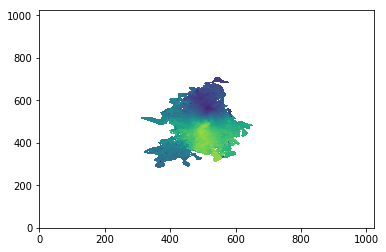

In [10]:
plt.imshow(np.squeeze(HI_raw[0].data), origin='lower', aspect="auto")

In [11]:
velocity = np.squeeze(HI_raw[0].data)
veloc_norm = lambda l: (l/1000. - 659.1)/sini
vel= veloc_norm(velocity)

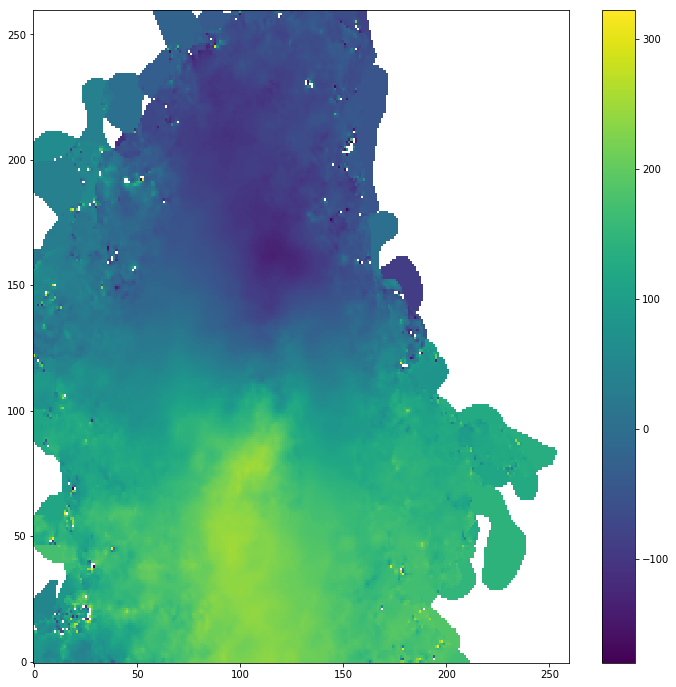

In [12]:
plt.figure(figsize=[12,12])
plt.imshow(vel[400:660, 400:660], origin='lower', aspect="auto")
plt.colorbar()

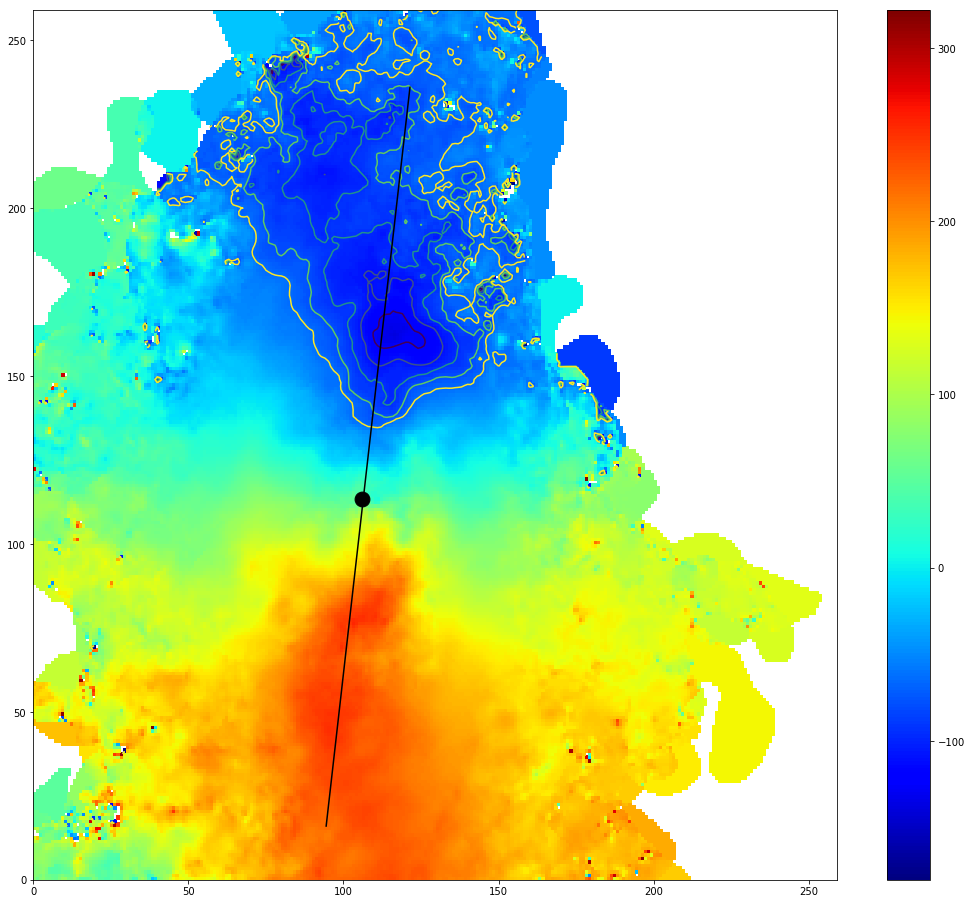

In [13]:
vv = vel[400:660, 400:660]
X,Y = np.meshgrid(np.arange(0.,len(vv[0]),1), np.arange(0.,len(vv),1))
plt.figure(figsize=[18,16])
quadmesh = plt.pcolormesh(X, Y, vv, cmap='jet')
ax = plt.gca()
cs = ax.contour(X, Y, vv, levels = np.arange(-125, -50., 15.))
# plt.contour(cs, colors='k')

plt.colorbar()

xoffset = 75
yoffset = 16
line_len = 220

plt.scatter(31.0778305+xoffset ,97.50132757+yoffset,[line_len], color='black' )
plt.plot([19.43+xoffset,19.43+xoffset + line_len * np.tan(7.*np.pi/180)], [0.+yoffset, line_len+yoffset], color='black')

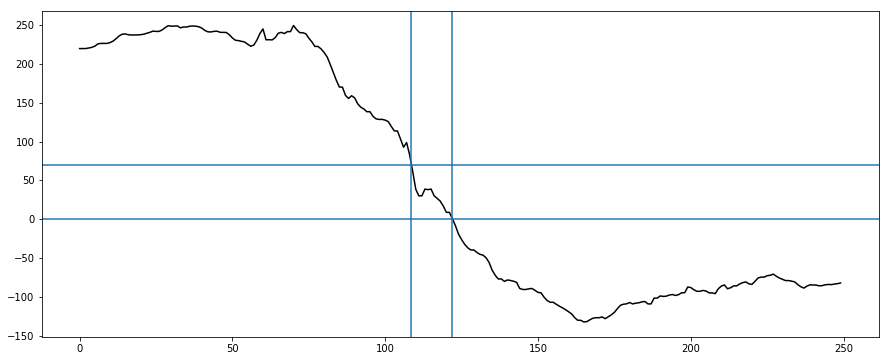

In [14]:
x0, y0 = 19.43+xoffset, 0.+yoffset 
x1, y1 = 19.43+xoffset + line_len * np.tan(7.*np.pi/180.),line_len+yoffset
num = 250
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
zi_cub = vv[y.astype(np.int), x.astype(np.int)]

fig = plt.figure(figsize = [15, 6])
line = plot(zi_cub,'black')
plt.axhline(y = 69.5)
plt.axvline(x = 108.5)

plt.axhline(y = 0)
plt.axvline(x = 122)

# plt.axhline(y = 60.)
# plt.axvline(x = 97.5)

# plt.axhline(y = 82.)
# plt.axvline(x = 97.5)


In [15]:
r = np.zeros(num)
r = np.arange(num)
new_center = 108.5
v_at_new_center = 69.5
old_center = 122

step=1
r_HI = np.zeros(num)
vel_HI = np.zeros(num)
r_HI_ = np.abs([d-new_center for d in r]) 
vel_HI = np.abs([zi_cub[i]- v_at_new_center if i<old_center else -v_at_new_center-abs(zi_cub[i]) for i in range(num)])
r_HI = r_HI_ * step * np.pi / (180 *3600) * Distance * 10**3 
print(len(r_HI), len(vel_HI))

250 250


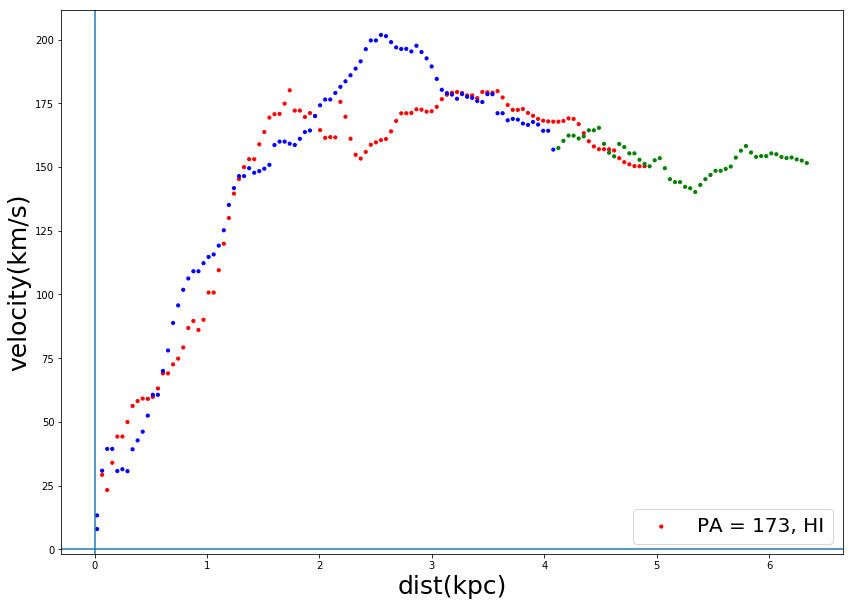

In [16]:
plt.figure(figsize=[14,10])
plt.scatter(r_HI,vel_HI, 10., color=['r']*108 + ['b']*92 + ['g']*50,label='PA = 173, HI')
plt.xlabel('dist(kpc)',fontsize=25)
plt.ylabel('velocity(km/s)',fontsize=25)
plt.legend(loc='lower right',fontsize=20)

plt.axhline(y =0.)
plt.axvline(x =0)

In [17]:
r_HI_tail = r_HI[-50:]
vel_HI_tail = vel_HI[-50:]

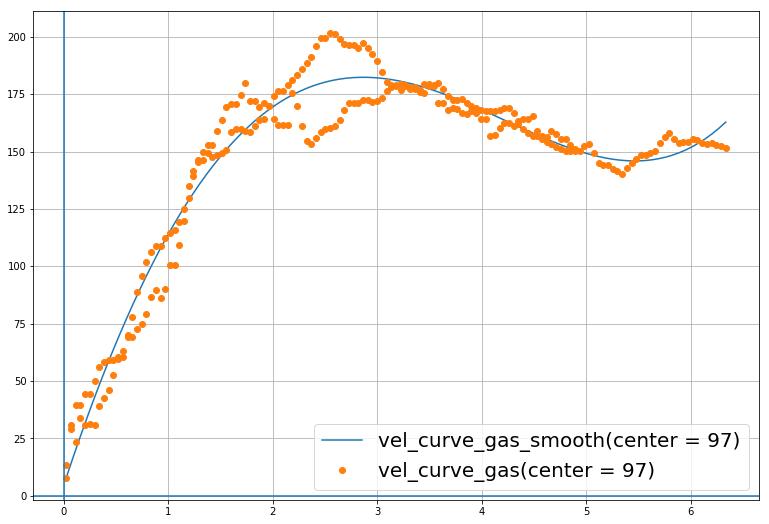

In [18]:
points1 = np.linspace(min(r_HI), max(r_HI), 100)
velocity_approx1 = poly1d(polyfit(r_HI, vel_HI, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points1, velocity_approx1(points1), label='vel_curve_gas_smooth(center = 97)')
line3 = ax.plot(r_HI,vel_HI,'o',label = 'vel_curve_gas(center = 97)')
plt.legend(loc='lower right',fontsize=20)
plt.grid()

plt.axhline(y =0.)
plt.axvline(x =0)

0.04508767234318684


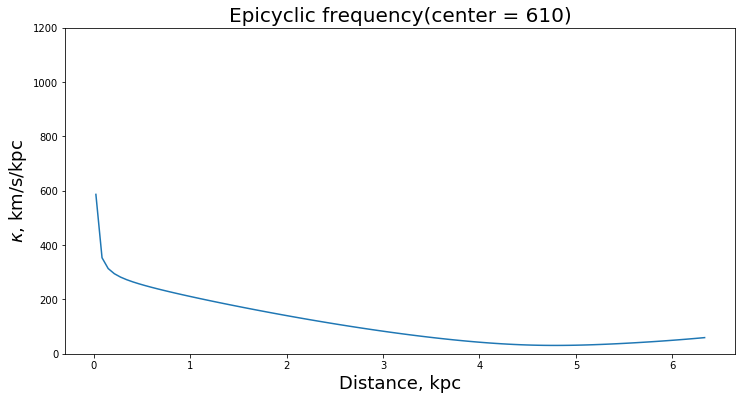

In [19]:
# dR =0.33#(Distance*1000*2*np.pi)/(360*60*60.)
dR =(Distance*1000*2*np.pi)/(360*60*60.)
print(dR)
kappa1 = [functions.epic_freq(velocity_approx1, r, dR) for r in points1]

fig = plt.figure(figsize = [12,6])
plt.plot(points1, kappa1) 
plt.title('Epicyclic frequency(center = 610)',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 1200.)
plt.show()

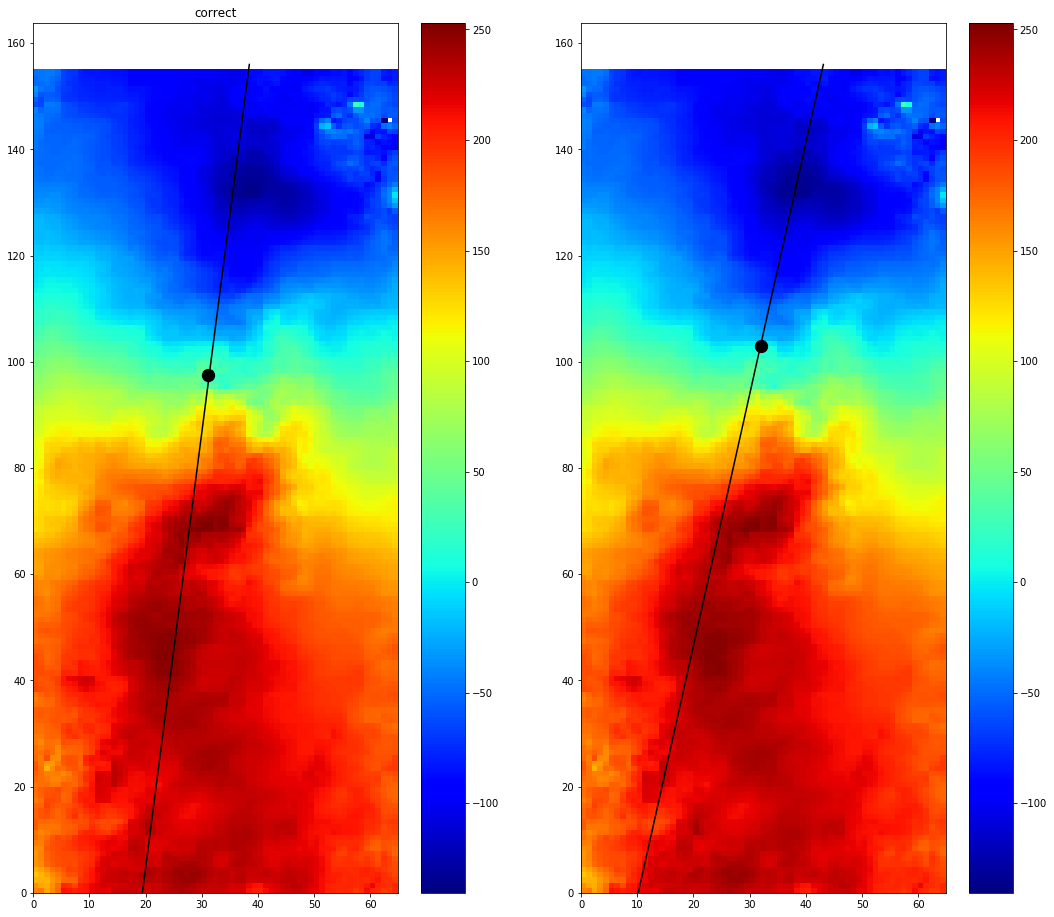

In [119]:
X,Y = np.meshgrid(np.arange(0.,len(velocity_HI[0]),1), np.arange(0.,len(velocity_HI),1))
plt.figure(figsize=[18,16])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(31.0778305 ,97.50132757,[150.], color='black' )
plt.plot([19.43,19.43 + 155. * np.tan(7.*np.pi/180)], [0., 156], color='black')
plt.title('correct')

plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([10.18,10.18 + 155. * np.tan(12.*np.pi/180)], [0., 156], color='black')

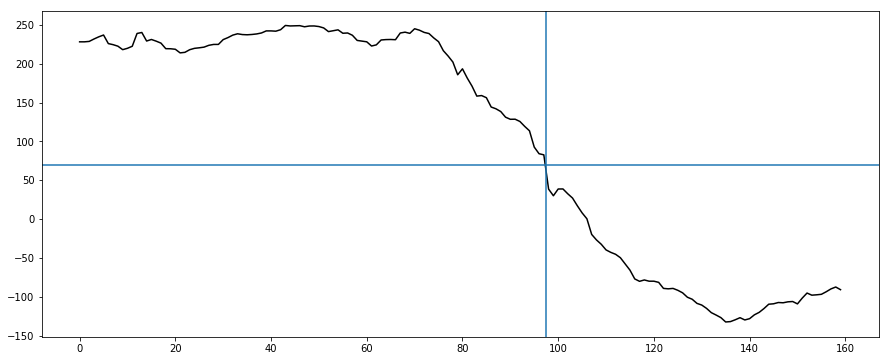

In [120]:
x0, y0 = 19.43, 0.  
x1, y1 = 19.43 + 155. * np.tan(7.*np.pi/180.),155.
num = 160
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
zi_cub = velocity_HI[y.astype(np.int), x.astype(np.int)]

fig = plt.figure(figsize = [15, 6])
line = plot(zi_cub,'black')
plt.axhline(y = 69.5)
plt.axvline(x = 97.5)

# plt.axhline(y = 240)
# plt.axhline(y = -120)

# plt.axhline(y = 60.)
# plt.axvline(x = 97.5)

# plt.axhline(y = 82.)
# plt.axvline(x = 97.5)


In [121]:
#Определим длину нашего среза
r_vel = np.sqrt(155.**2 + (155. * np.tan(7.*np.pi/180))**2)
#Переведём в arcsec
r_vel = r_vel * 1.9
#Найдём центр галактики на срезе
c_r_vel = 97.5 / math.cos(7.*np.pi/180.)
c_r_vel = c_r_vel * 1.9

zi_cub[97]

82.77197

In [23]:
v_2005 = np.load('./data/vel_Lang20.npy')
r_2005 = np.load('./data/r_Lang20.npy')
v_0810 = np.load('./data/vel_Walter20.npy')
r_0810 = np.load('./data/r_Walter20.npy')
v_1609 = np.load('./data/vel_Ponomareva20.npy')
r_1609 = np.load('./data/r_Ponomareva20.npy')

In [122]:
r = np.zeros(160)
r = np.arange(160)
new_center = 97.5
v_at_new_center = 69.5
old_center = 106

step = (c_r_vel)/97.
print(c_r_vel)
r_HI = np.zeros(160)
vel_HI = np.zeros(160)
r_HI_ = np.abs([d-new_center for d in r]) 
vel_HI = np.abs([zi_cub[i]- v_at_new_center if i<old_center else -v_at_new_center-abs(zi_cub[i]) for i in range(160)])
r_HI = r_HI_ * step * np.pi / (180 *3600) * Distance * 10**3 
print(len(r_HI), len(vel_HI))


186.64119516625166
160 160


In [123]:
plt.figure(figsize=[14,10])
plt.plot(r_0810,v_0810 * np.sin(61.8*np.pi/180.),'o', color='green',label='Walter08, PA = 173, HI')
plt.plot(r_1609,v_1609 * np.sin(58. *np.pi/180.),'o', color='blue',label='Ponomareva16, PA = 172, HI')
plt.plot(r_2005,v_2005 * np.sin(57.3*np.pi/180.),'o', color='red',label='Lang20, PA = 173, CO')
plt.scatter(r_HI,vel_HI, 10., color=['r']*97 + ['b']*63,label='PA = 173, HI')
# plt.ylim(0,)
# plt.xlim(0,)
plt.xlabel('dist(kpc)',fontsize=25)
plt.ylabel('velocity(km/s)',fontsize=25)
plt.legend(loc='lower right',fontsize=20)

plt.axhline(y =0.)
plt.axvline(x =0)

NameError: name 'r_0810' is not defined

<Figure size 1008x720 with 0 Axes>

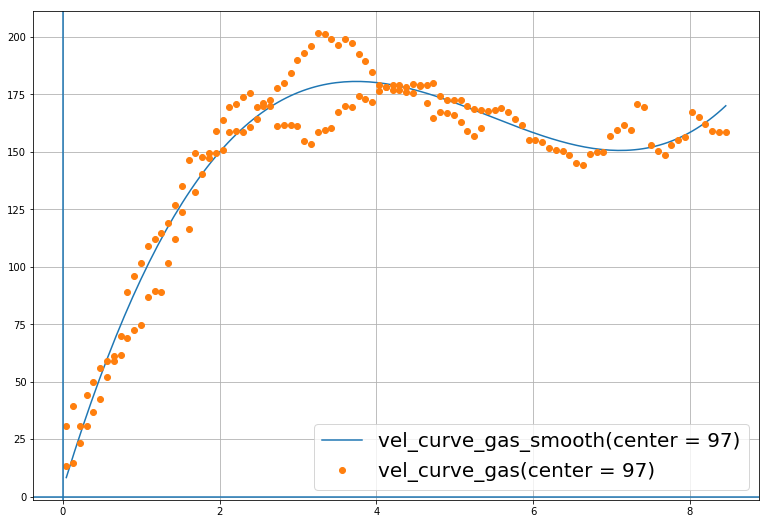

In [124]:
points1 = np.linspace(min(r_HI), max(r_HI), 160)
velocity_approx1 = poly1d(polyfit(r_HI, vel_HI, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points1, velocity_approx1(points1), label='vel_curve_gas_smooth(center = 97)')
line3 = ax.plot(r_HI,vel_HI,'o',label = 'vel_curve_gas(center = 97)')
plt.legend(loc='lower right',fontsize=20)
plt.grid()

plt.axhline(y =0.)
plt.axvline(x =0)

0.04508767234318684


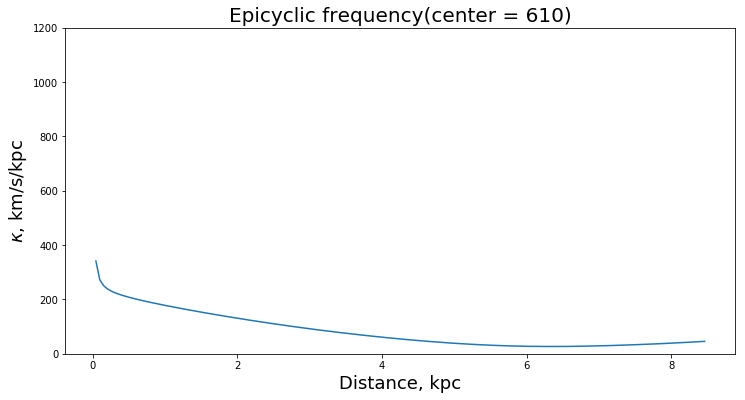

In [125]:
# dR =0.33#(Distance*1000*2*np.pi)/(360*60*60.)
dR =(Distance*1000*2*np.pi)/(360*60*60.)
print(dR)
kappa1 = [functions.epic_freq(velocity_approx1, r, dR) for r in points1]

fig = plt.figure(figsize = [12,6])
plt.plot(points1, kappa1) 
plt.title('Epicyclic frequency(center = 610)',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 1200.)
plt.show()



In [28]:
r_HI = np.concatenate([np.array([0.]), r_HI, np.zeros(5.7, 8.1, 50)])
vel_HI = np.concatenate([np.array([0.]), vel_HI, vel_HI_tail])

In [128]:
r_HI_new = np.concatenate([np.array([0.]), r_0810, r_2005])
vel_HI_new = np.concatenate([np.array([0.]), v_0810, v_2005])

In [130]:
r_HI_new = np.concatenate([np.array([0.]),r_HI_new, r_1609])
vel_HI_new = np.concatenate([np.array([0.]), vel_HI_new, v_1609])

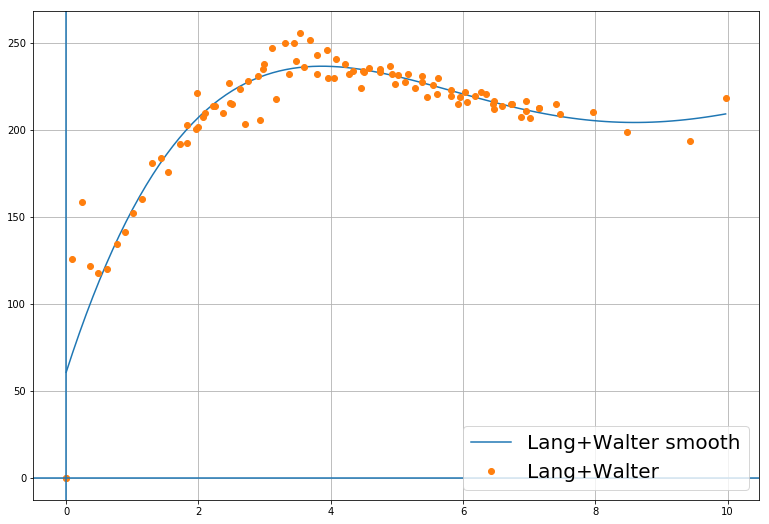

In [131]:
points1 = np.linspace(min(r_HI_new), max(r_HI_new), 100)
velocity_approx1 = poly1d(polyfit(r_HI_new, vel_HI_new, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points1, velocity_approx1(points1), label='Lang+Walter smooth')
line3 = ax.plot(r_HI_new,vel_HI_new,'o',label = 'Lang+Walter')
plt.legend(loc='lower right',fontsize=20)
plt.grid()

plt.axhline(y =0.)
plt.axvline(x =0)

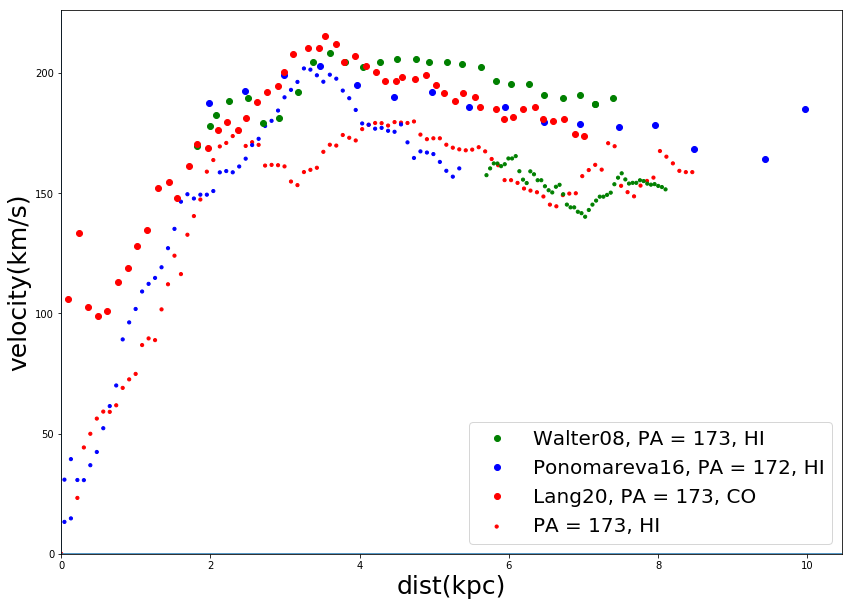

In [29]:
plt.figure(figsize=[14,10])
plt.plot(r_0810,v_0810 * np.sin(61.8*np.pi/180.),'o', color='green',label='Walter08, PA = 173, HI')
plt.plot(r_1609,v_1609 * np.sin(58. *np.pi/180.),'o', color='blue',label='Ponomareva16, PA = 172, HI')
plt.plot(r_2005,v_2005 * np.sin(57.3*np.pi/180.),'o', color='red',label='Lang20, PA = 173, CO')
plt.scatter(r_HI,vel_HI, 10., color=['r']*97 + ['b']*64 + ['g']*50,label='PA = 173, HI')
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('dist(kpc)',fontsize=25)
plt.ylabel('velocity(km/s)',fontsize=25)
plt.legend(loc='lower right',fontsize=20)

plt.axhline(y =0.)
plt.axvline(x =0)

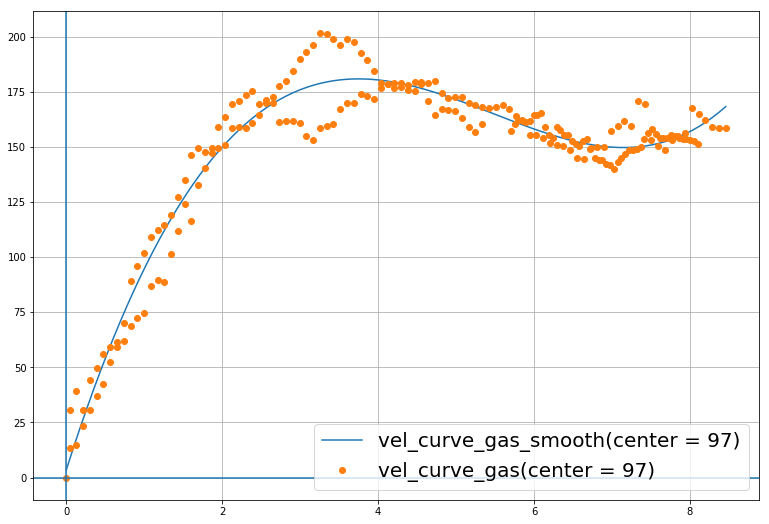

In [30]:
points1 = np.linspace(min(r_HI), max(r_HI), 100)
velocity_approx1 = poly1d(polyfit(r_HI, vel_HI, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points1, velocity_approx1(points1), label='vel_curve_gas_smooth(center = 97)')
line3 = ax.plot(r_HI,vel_HI,'o',label = 'vel_curve_gas(center = 97)')
plt.legend(loc='lower right',fontsize=20)
plt.grid()

plt.axhline(y =0.)
plt.axvline(x =0)

In [175]:
def epicyclicFreq_real(poly_gas, R, resolution):
    '''Честное вычисление эпициклической частоты на расстоянии R для сплайна или полинома'''
    '''resolution - kpc/arcsec на случай если R в arcsec'''
    try:
        return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.deriv()(R) / poly_gas(R)) / (R * resolution )
    except:
        return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.derivative()(R) / poly_gas(R)) / (R * resolution )

In [ ]:
def epic_freq(vel_poly, R, dR):
    return sqrt(2.) * vel_poly(R) / R * sqrt(1 + R * vel_poly.deriv()(R) / vel_poly(R) / dR)

$$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

In [31]:
def epic_freq(vel_poly, R, dR):
    return sqrt(2.) * vel_poly(R) / R * sqrt(1 + R * vel_poly.deriv()(R) / vel_poly(R))

0.04508767234318684


/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


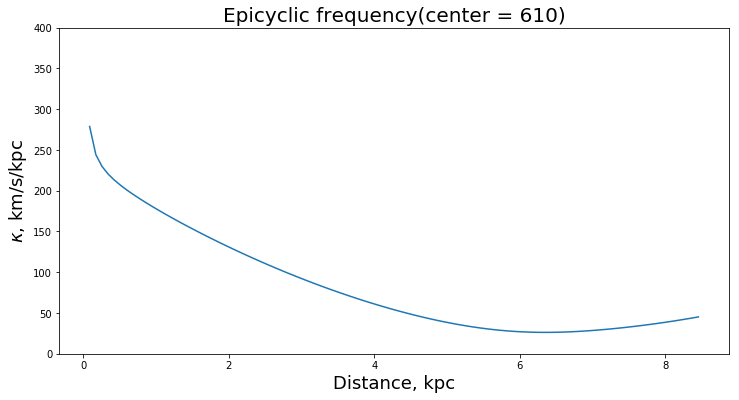

In [32]:
# dR =0.33#(Distance*1000*2*np.pi)/(360*60*60.)
dR =(Distance*1000*2*np.pi)/(360*60*60.)
print(dR)
kappa1 = [epic_freq(velocity_approx1, r, dR) for r in points1]

fig = plt.figure(figsize = [12,6])
plt.plot(points1, kappa1) 
plt.title('Epicyclic frequency(center = 610)',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 400.)
plt.show()

In [33]:
np.save('./data/r_HI.npy',r_HI)
np.save('./data/vel_HI.npy',vel_HI)

### Возникла небольшая проблема


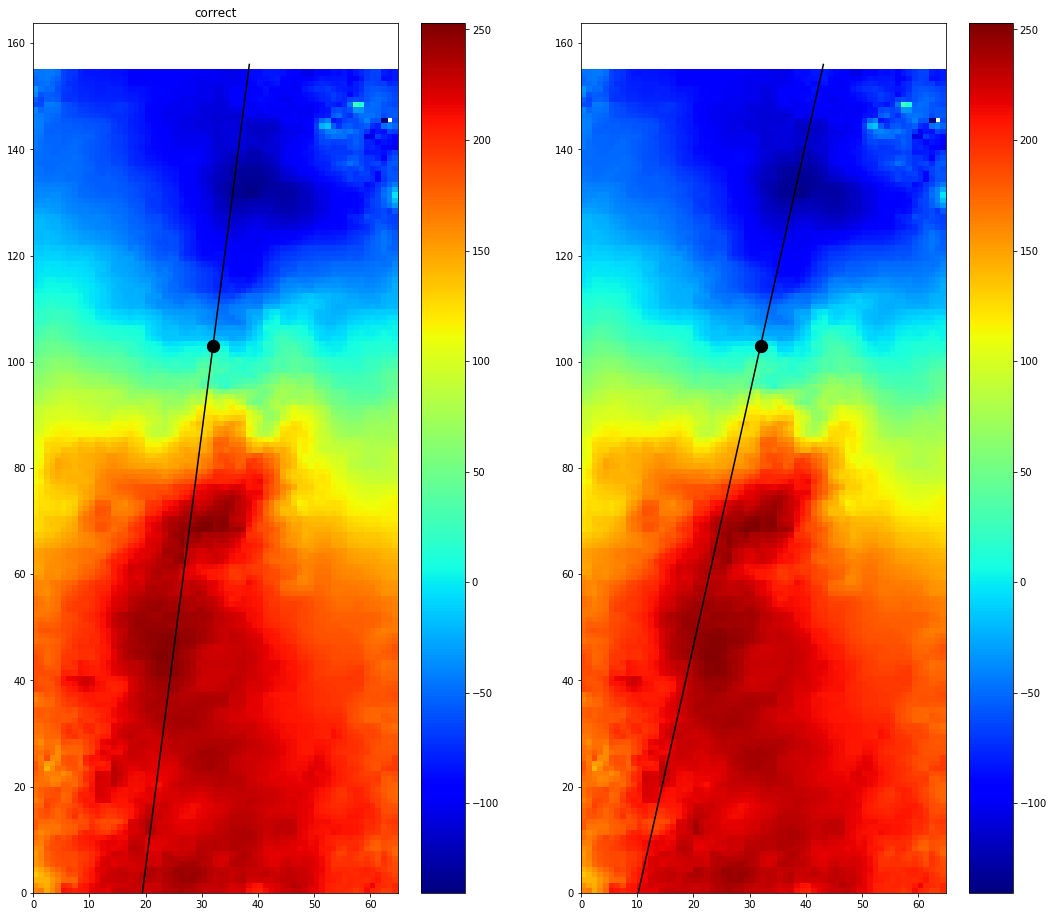

In [5]:
X,Y = np.meshgrid(np.arange(0.,len(velocity_HI[0]),1), np.arange(0.,len(velocity_HI),1))
plt.figure(figsize=[18,16])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([19.43,19.43 + 155. * np.tan(7.*np.pi/180)], [0., 156], color='black')
plt.title('correct')

plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([10.18,10.18 + 155. * np.tan(12.*np.pi/180)], [0., 156], color='black')

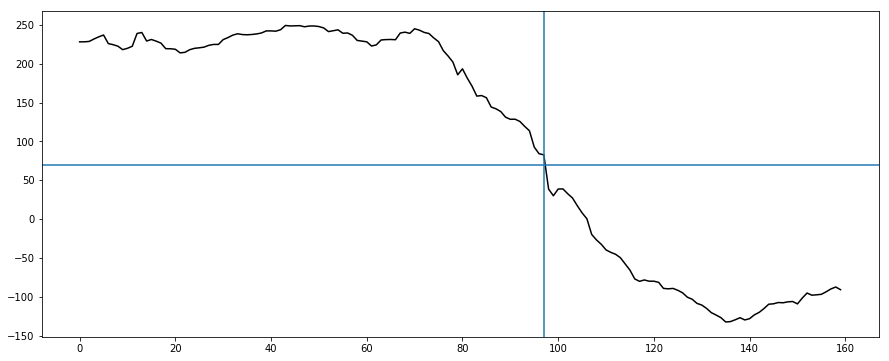

In [61]:
x0, y0 = 19.43, 0.  
x1, y1 = 19.43 + 155. * np.tan(7.*np.pi/180.),155.
num = 160
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
zi_cub = velocity_HI[y.astype(np.int), x.astype(np.int)]

fig = plt.figure(figsize = [15, 6])
line = plot(zi_cub,'black')
plt.axhline(y=70)
plt.axvline(x = 97)



In [62]:
#Определим длину нашего среза
r_vel = np.sqrt(155.**2 + (155. * np.tan(7.*np.pi/180))**2)
#Переведём в arcsec
r_vel = r_vel * 1.9
#Найдём центр галактики на срезе
c_r_vel = 103. / math.cos(7.*np.pi/180.)
c_r_vel = c_r_vel * 1.9

zi_cub[97]


82.77197

In [63]:
r = np.zeros(160)
r = np.arange(160)
new_center = 97
v_at_new_center = 65.
old_center = 106

step = (c_r_vel)/97.
print(c_r_vel)
r_HI = np.zeros(160)
vel_HI = np.zeros(160)
r_HI_ = np.abs([d-new_center for d in r]) 
vel_HI = np.abs([zi_cub[i]- v_at_new_center if i<old_center else -v_at_new_center-abs(zi_cub[i]) for i in range(160)])
r_HI = r_HI_ * step * np.pi / (180 *3600) * Distance * 10**3 
print(len(r_HI), len(vel_HI))



197.16967284229662
160 160


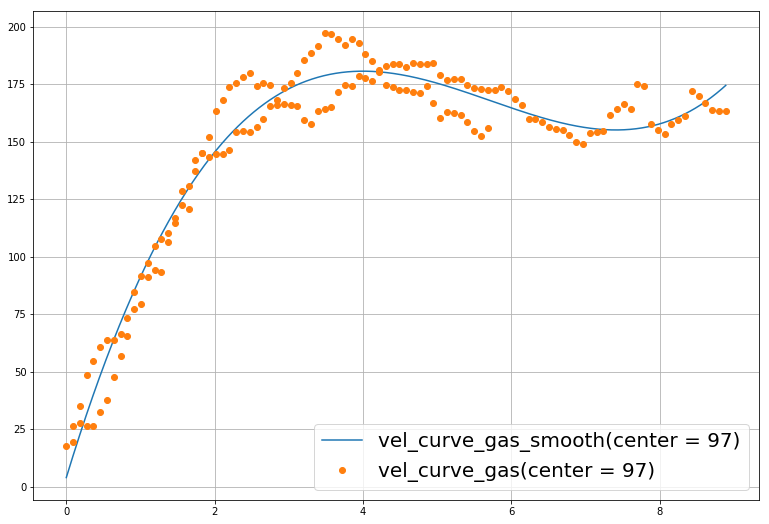

In [64]:

points1 = np.linspace(min(r_HI), max(r_HI), 1000)
velocity_approx1 = poly1d(polyfit(r_HI, vel_HI, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points1, velocity_approx1(points1), label='vel_curve_gas_smooth(center = 97)')
line3 = ax.plot(r_HI,vel_HI,'o',label = 'vel_curve_gas(center = 97)')
plt.legend(loc='lower right',fontsize=20)
plt.grid()

Найдём такое минимальное dR, при котором с эпициклической частотой будет все хорошо.

0.33


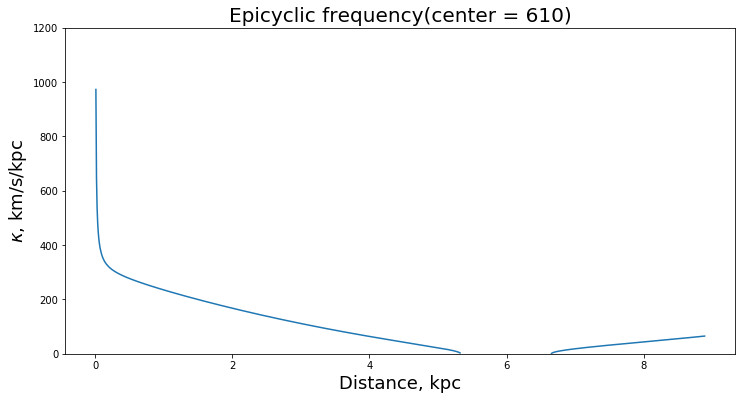

In [65]:
dR =0.33#(Distance*1000*2*np.pi)/(360*60*60.)
print(dR)
kappa1 = [functions.epic_freq(velocity_approx1, r, dR) for r in points1]

fig = plt.figure(figsize = [12,6])
plt.plot(points1, kappa1) 
plt.title('Epicyclic frequency(center = 610)',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 1200.)
plt.show()



In [127]:
v_2005 = np.load('./data/vel_Lang20.npy')
r_2005 = np.load('./data/r_Lang20.npy')
v_0810 = np.load('./data/vel_Walter20.npy')
r_0810 = np.load('./data/r_Walter20.npy')
v_1609 = np.load('./data/vel_Ponomareva20.npy')
r_1609 = np.load('./data/r_Ponomareva20.npy')

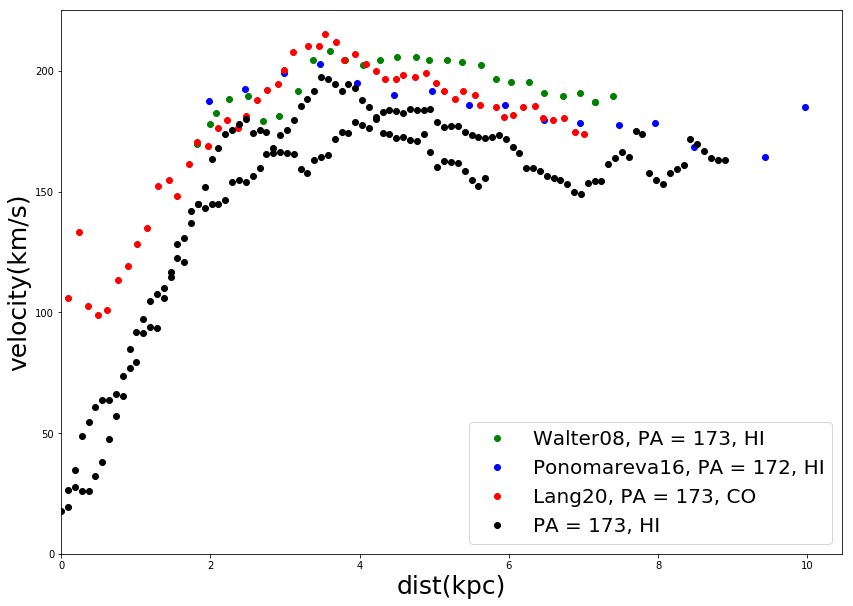

In [67]:
plt.figure(figsize=[14,10])
plt.plot(r_0810,v_0810 * np.sin(61.8*np.pi/180.),'o', color='green',label='Walter08, PA = 173, HI')
plt.plot(r_1609,v_1609 * np.sin(58. *np.pi/180.),'o', color='blue',label='Ponomareva16, PA = 172, HI')
plt.plot(r_2005,v_2005 * np.sin(57.3*np.pi/180.),'o', color='red',label='Lang20, PA = 173, CO')
plt.plot(r_HI,vel_HI,'o', color='black',label='PA = 173, HI')
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('dist(kpc)',fontsize=25)
plt.ylabel('velocity(km/s)',fontsize=25)
plt.legend(loc='lower right',fontsize=20)

Добавим к нашим скоростям точки из Walter

In [68]:
r_HI_Walter = np.zeros(188)
vel_HI_Walter = np.zeros(188)

r_HI_Walter[0:160] = r_HI
vel_HI_Walter[0:160] = vel_HI

r_HI_Walter[160:188] = r_0810
vel_HI_Walter[160:188] = v_0810 * np.sin(61.8*np.pi/180.)

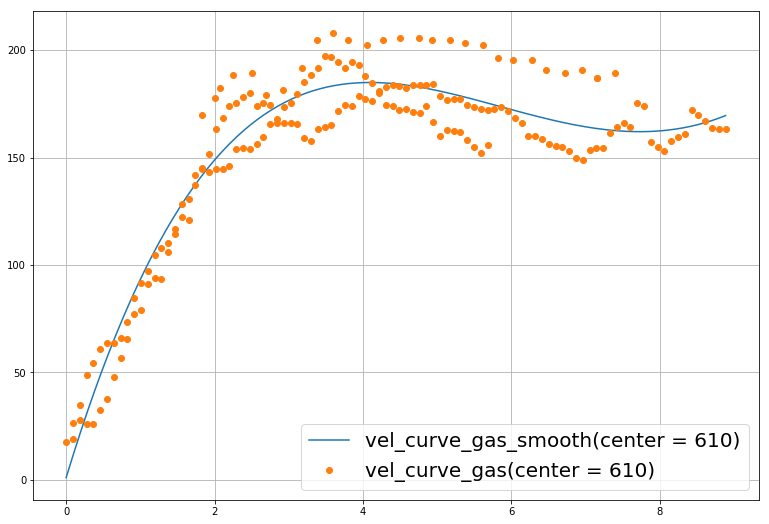

In [69]:
points_Walter = np.linspace(min(r_HI_Walter), max(r_HI_Walter), 188)
velocity_approx_Walter = poly1d(polyfit(r_HI_Walter, vel_HI_Walter, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points_Walter, velocity_approx_Walter(points_Walter), label='vel_curve_gas_smooth(center = 610)')
line3 = ax.plot(r_HI_Walter,vel_HI_Walter,'o',label = 'vel_curve_gas(center = 610)')
plt.legend(loc='lower right',fontsize=20)
plt.grid()

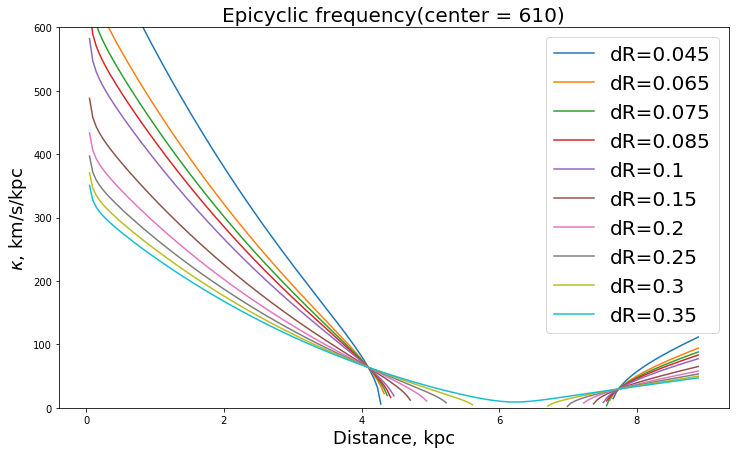

In [70]:
dR = [0.045,0.065,0.075,0.085,0.1,0.15,0.2,0.25,0.3,0.35] 
kappa_Walter = np.zeros((len(points_Walter),len(dR)))

kappa_Walter = [[functions.epic_freq(velocity_approx_Walter, r, dr) for r in points_Walter] for dr in dR]

fig = plt.figure(figsize = [12,7])
for i in range(10):
    plt.plot(points_Walter, kappa_Walter[:][i], label='dR='+str(dR[i])) 
plt.title('Epicyclic frequency(center = 610)',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 600.)
plt.legend(fontsize=20)
plt.show()


Попробуем исправить эпицикл с помощью добавления точек

In [71]:
r_HI_add = np.zeros(220)
vel_HI_add = np.zeros(220)

k = (np.max(r_HI)-np.min(r_HI))/610.

r_HI_add[60:220] = r_HI
r_HI_add[0:60] = [np.max(r_HI)+i*k for i in range(60)]
vel_HI_add[60:220] = vel_HI
vel_HI_add[0:60] = vel_HI[0]


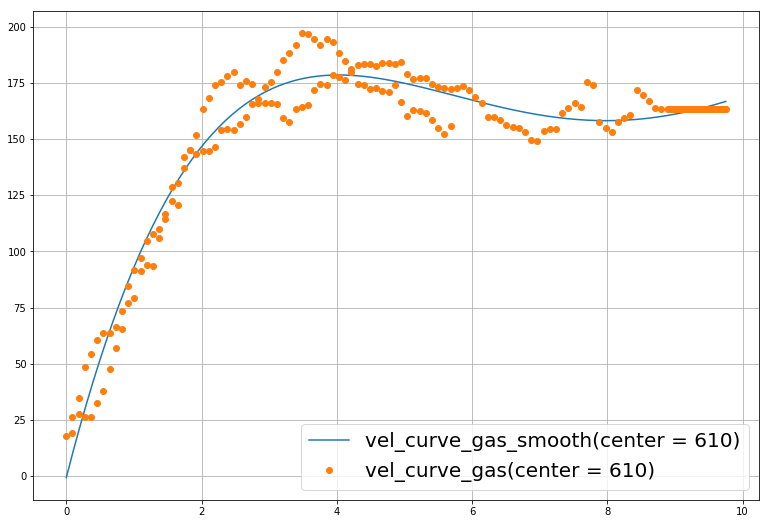

In [72]:
points2 = np.linspace(min(r_HI_add), max(r_HI_add), 200)
velocity_approx2 = poly1d(polyfit(r_HI_add, vel_HI_add, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points2, velocity_approx2(points2), label='vel_curve_gas_smooth(center = 610)')
line3 = ax.plot(r_HI_add,vel_HI_add,'o',label = 'vel_curve_gas(center = 610)')
plt.legend(loc='lower right',fontsize=20)
plt.grid()

0.28


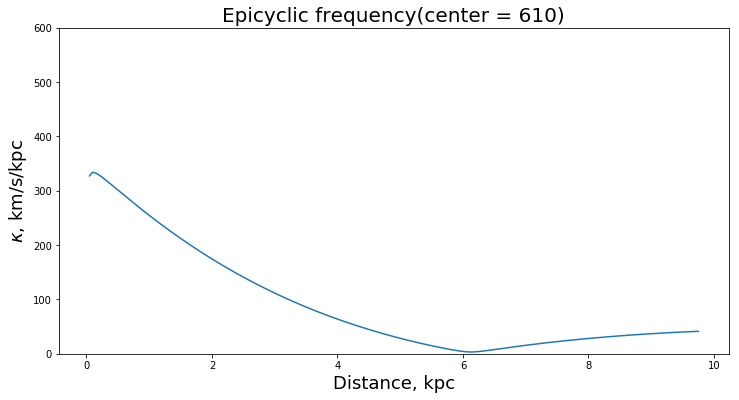

In [77]:
dR =0.28#(Distance*1000*2*np.pi)/(360*60*60.)
print(dR)
kappa1 = [functions.epic_freq(velocity_approx2, r, dR) for r in points2]

fig = plt.figure(figsize = [12,6])
plt.plot(points2, kappa1) 
plt.title('Epicyclic frequency(center = 610)',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 600.)
plt.show()

In [63]:
np.save('./data/r_HI.npy',r_HI_add)
np.save('./data/vel_HI.npy',vel_HI_add)

In [132]:
velocity_approx = poly1d(polyfit(r_HI_new, vel_HI_new, deg=4))

In [133]:
dR = 1
G = 4.32
Qeff_max = np.zeros(dist_kpc.shape)
Qeff_min = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
print('Errors:{}'.format(errors))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


Text(0.5, 1.0, '$Q_{gas}$')

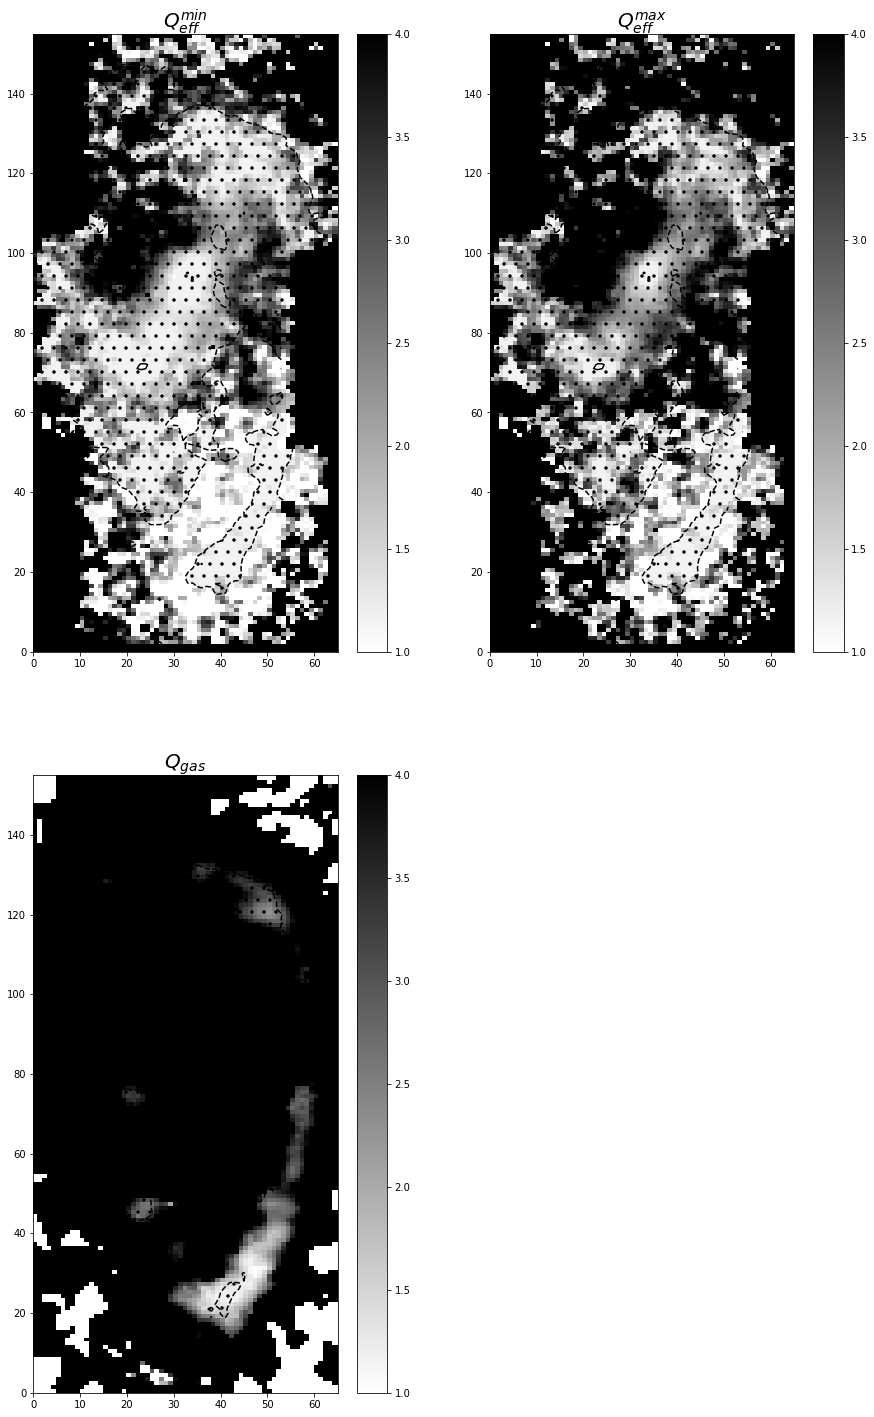

In [134]:
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[15, 25])
plt.subplot(2,2,1)
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], aspect='auto', alpha=1, colors='black')
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,2,2)
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.55,0.5], aspect='auto', alpha=1, colors='black')
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,2,3)
quadmesh = plt.pcolormesh(X, Y, Qg, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
CS = plt.contourf(X, Y, np.log10(Sigma_SFR), levels=[-0.5,0.5], colors=('none'), hatches=['.'], alpha=0.05)
CS1 = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-0.5,0.5], aspect='auto', alpha=1, colors='black')
plt.title(r'$Q_{gas}$', fontsize=20)

In [144]:
G = 4.32
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 0.4 * A * sigma_g / np.pi / G

In [145]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        if(Sigma_gas > Sigma_crit[i][j]):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0

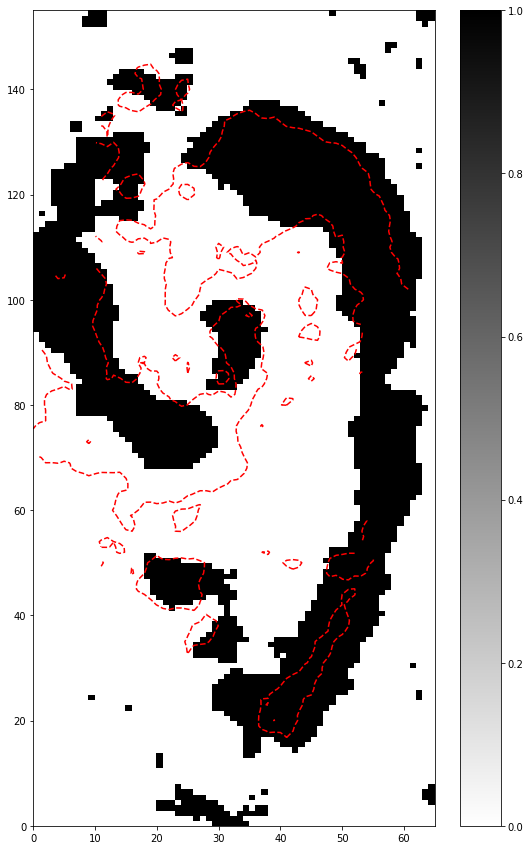

In [146]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.5,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [147]:
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 

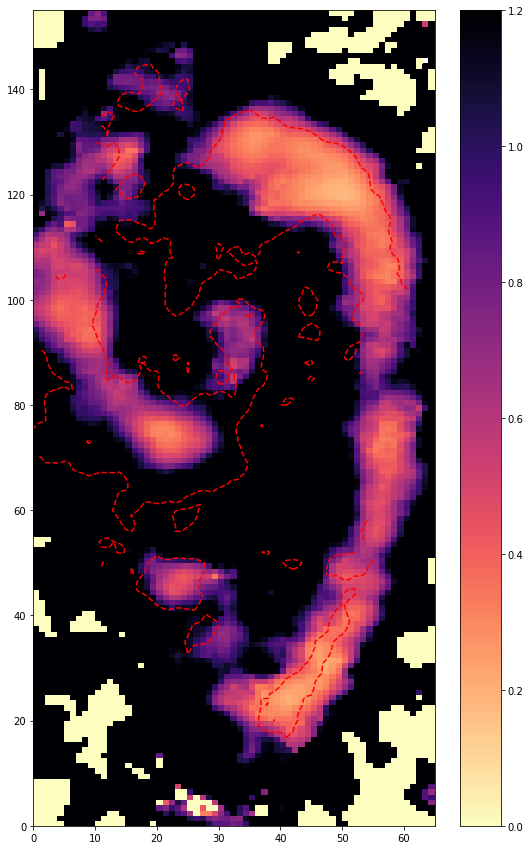

In [148]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.5,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, shear_method, cmap='magma_r')
quadmesh.set_clim(vmin = 0., vmax = 1.2)
plt.colorbar()